## Import your stuff

In [19]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
#import pydelfi.delfi as delfi
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [20]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [21]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [22]:
import simulators.mass_function_n_counts.simulator_trapz_3params as n_counts_simulator
#importlib.reload(n_counts_simulator)

In [5]:
importlib.reload(delfi)

<module 'pydelfi.delfi_edit' from '/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py'>

## Set up priors on params of interest (for now): {$\Omega_{m}h^{2} = \Omega_{cdm}h^{2} + \Omega_{b}h^{2}$, $\sigma_{8}$, $h$, $n_{s}$, $w_{0}$}

In [6]:
lower = np.array([0.1125, 0.020, 0.6])
upper = np.array([0.1275, 0.024, 1.1])
prior = priors.Uniform(lower, upper)

In [7]:
theta_fiducial = np.array([0.1197, 0.02222, 0.76])
n_params = len(theta_fiducial)

## Set up the simulator
This must have the signature `simulator(parameters, seed, args, batch)` -> `np.array([batch, ndata])`

In [8]:
importlib.reload(n_counts_simulator)

<module 'simulators.mass_function_n_counts.simulator_trapz_3params' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_3params.py'>

In [9]:
N_countsSimulator = n_counts_simulator.Model()

N_countsSimulator.N_counts

array([1.78485558e+04, 5.76970955e+04, 7.91959673e+04, 7.60280551e+04,
       5.88513395e+04, 2.53149917e+03, 6.50857065e+03, 6.79905624e+03,
       4.77690342e+03, 2.60821304e+03, 1.41326957e+02, 2.40973379e+02,
       1.54407659e+02, 6.19686706e+01, 1.80224732e+01, 1.15792928e+00,
       8.97137339e-01, 2.22002922e-01, 2.95445872e-02, 2.45078214e-03])

In [10]:
log10masses = np.linspace(14, 16, num = 5)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)

In [11]:
N_countsSimulator.n_counts_trapz(theta_fiducial, 0.1, 0.2, 14.0, 14.5)

computing cosmo: 0.00015268599999984644 s
computing halo mass function object: 0.1132951499999999 s
computing factors: 0.1127231670000004 s
loop over z_steps: 0.033129616000000084 s


17848.555764027973

In [12]:
N_countsSimulator.n_counts_trapz_all(theta_fiducial, z_min, z_max, log10masses)

array([1.78485558e+04, 5.76970955e+04, 7.91959673e+04, 7.60280551e+04,
       5.88513395e+04, 2.53149917e+03, 6.50857065e+03, 6.79905624e+03,
       4.77690342e+03, 2.60821304e+03, 1.41326957e+02, 2.40973379e+02,
       1.54407659e+02, 6.19686706e+01, 1.80224732e+01, 1.15792928e+00,
       8.97137339e-01, 2.22002922e-01, 2.95445872e-02, 2.45078214e-03])

In [13]:
N_countsSimulator.N_counts.shape

(20,)

In [14]:
def simulator(theta, seed, simulator_args, batch):
    return N_countsSimulator.simulation(theta, seed)

simulator_args = None

## Set up fake compressor for now

In [15]:
def compressor(data, compressor_args):
    return data
compressor_args=None

## Load data

In [16]:
N_counts_data = np.load('N_counts_random_data.npy')
N_counts_data

array([[17720, 57628, 78955, 75947, 58462],
       [ 2499,  6606,  6684,  4733,  2579],
       [  140,   228,   173,    55,    15],
       [    1,     0,     0,     1,     0]])

## Try to load data from previous runs

## Try to figure out why we get nans

In [28]:
from numpy import array as array
from numpy import nan

In [29]:
training_loss = [array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.48336182e+01,
        8.48336182e+01,  8.48336182e+01,  8.48336182e+01,  8.48336182e+01,
        8.48336182e+01,  8.48336182e+01,  8.48336182e+01,  8.48336182e+01,
        8.48336182e+01,  8.48336182e+01,  8.48336182e+01,  8.48336182e+01,
        8.48336182e+01,  8.48336182e+01,  8.48336182e+01,  8.48336182e+01,
        8.48336182e+01,  8.48336182e+01,  8.48336182e+01,  8.48336182e+01,
        8.49060287e+01,  8.49060287e+01,  8.49060287e+01,  8.49060287e+01,
        8.49060287e+01,  8.49060287e+01,  8.49060287e+01,  8.49060287e+01,
        8.49060287e+01,  8.49060287e+01,  8.49060287e+01,  8.49060287e+01,
        8.49060287e+01,  8.49060287e+01,  8.49060287e+01,  8.49060287e+01,
        8.49060287e+01,  8.49060287e+01,  8.49060287e+01,  8.49060287e+01,
        8.49060287e+01,  8.45717697e+01,  8.45717697e+01,  8.45717697e+01,
        8.45717697e+01,  8.45717697e+01,  8.45717697e+01,  8.45717697e+01,
        8.45717697e+01,  8.45717697e+01,  8.45717697e+01,  8.45717697e+01,
        8.45717697e+01,  8.45717697e+01,  8.45717697e+01,  8.45717697e+01,
        8.45717697e+01,  8.45717697e+01,  8.45717697e+01,  8.45717697e+01,
        8.45717697e+01,  8.45717697e+01,  8.49887695e+01,  8.49887695e+01,
        8.49887695e+01,  8.49887695e+01,  8.49887695e+01,  8.49887695e+01,
        8.49887695e+01,  8.49887695e+01,  8.49887695e+01,  8.49887695e+01,
        8.49887695e+01,  8.49887695e+01,  8.49887695e+01,  8.49887695e+01,
        8.49887695e+01,  8.49887695e+01,  8.49887695e+01,  8.49887695e+01,
        8.49887695e+01,  8.49887695e+01,  8.49887695e+01,  8.47277451e+01,
        8.47277451e+01,  8.47277451e+01,  8.47277451e+01,  8.47277451e+01,
        8.47277451e+01,  8.47277451e+01,  8.47277451e+01,  8.47277451e+01,
        8.47277451e+01,  8.47277451e+01,  8.47277451e+01,  8.47277451e+01,
        8.47277451e+01,  8.47277451e+01,  8.47277451e+01,  8.47277451e+01,
        8.47277451e+01,  8.47277451e+01,  8.47277451e+01,  8.47277451e+01,
        8.47797394e+01,  8.47797394e+01,  8.47797394e+01,  8.47797394e+01,
        8.47797394e+01,  8.47797394e+01,  8.47797394e+01,  8.47797394e+01,
        8.47797394e+01,  8.47797394e+01,  8.47797394e+01,  8.47797394e+01,
        8.47797394e+01,  8.47797394e+01,  8.47797394e+01,  8.47797394e+01,
        8.47797394e+01,  8.47797394e+01,  8.47797394e+01,  8.47797394e+01,
        8.47797394e+01,  8.46411667e+01,  8.46411667e+01,  8.46411667e+01,
        8.46411667e+01,  8.46411667e+01,  8.46411667e+01,  8.46411667e+01,
        8.46411667e+01,  8.46411667e+01,  8.46411667e+01,  8.46411667e+01,
        8.46411667e+01,  8.46411667e+01,  8.46411667e+01,  8.46411667e+01,
        8.46411667e+01,  8.46411667e+01,  8.46411667e+01,  8.46411667e+01,
        8.46411667e+01,  8.46411667e+01,  8.46915817e+01,  8.46915817e+01,
        8.46915817e+01,  8.46915817e+01,  8.46915817e+01,  8.46915817e+01,
        8.46915817e+01,  8.46915817e+01,  8.46915817e+01,  8.46915817e+01,
        8.46915817e+01,  8.46915817e+01,  8.46915817e+01,  8.46915817e+01,
        8.46915817e+01,  8.46915817e+01,  8.46915817e+01,  8.46915817e+01,
        8.46915817e+01,  8.46915817e+01,  8.46915817e+01,  8.44672394e+01,
        8.41164932e+01,  8.36284790e+01,  8.31445236e+01,  8.26095123e+01,
        8.20561981e+01,  8.15175858e+01,  8.09226532e+01,  8.01457672e+01,
        7.92642059e+01,  7.83297272e+01,  7.72690735e+01,  7.59742355e+01,
        7.45108109e+01,  7.29210587e+01,  7.12594147e+01,  6.94051819e+01,
        6.74054642e+01,  6.51905136e+01,  6.29058380e+01,  6.05761757e+01,
        5.81154785e+01,  5.55821686e+01,  5.31351242e+01,  5.08597260e+01,
        4.87434540e+01,  4.67181587e+01,  4.49026070e+01,  4.33397865e+01,
        4.19725876e+01,  4.07613792e+01,  3.96459694e+01,  3.86563911e+01,
        3.77601738e+01,  3.69191818e+01,  3.61135521e+01,  3.53381157e+01,
        3.45921173e+01,  3.38752251e+01,  3.31816978e+01,  3.25204353e+01,
        3.18671341e+01,  3.12180824e+01,  3.05842724e+01,  2.99377918e+01,
        2.92992992e+01,  2.86901894e+01,  2.81086788e+01,  2.75373573e+01,
        2.69745731e+01,  2.64253654e+01,  2.58865585e+01,  2.52988796e+01,
        2.46325951e+01,  2.39616699e+01,  2.32826710e+01,  2.26480789e+01,
        2.20618210e+01,  2.15005398e+01,  2.09603920e+01,  2.04340725e+01,
        1.99244595e+01,  1.94295826e+01,  1.89419079e+01,  1.84586487e+01,
        1.79800758e+01,  1.75105801e+01,  1.70583801e+01,  1.66234837e+01,
        1.62064552e+01,  1.58078318e+01,  1.54274054e+01,  1.50583267e+01,
        1.47018309e+01,  1.43532887e+01,  1.40103006e+01,  1.36668596e+01,
        1.33262377e+01,  1.29879837e+01,  1.26513777e+01,  1.23188801e+01,
        1.19908972e+01,  1.16659889e+01,  1.13454638e+01,  1.10343914e+01,
        1.07278748e+01,  1.04278650e+01,  1.01327219e+01,  9.84166813e+00,
        9.55519485e+00,  9.27603626e+00,  9.00278282e+00,  8.73489189e+00,
        8.47092628e+00,  8.21071815e+00,  7.95537472e+00,  7.70480108e+00,
        7.45683956e+00,  7.21334743e+00,  6.97465134e+00,  6.73972750e+00,
        6.50828314e+00,  6.27933884e+00,  6.05275822e+00,  5.82914352e+00,
        5.60678625e+00,  5.38759565e+00,  5.16970730e+00,  4.95249891e+00,
        4.73648787e+00,  4.51480770e+00,  4.28946877e+00,  4.06379938e+00,
        3.84091592e+00,  3.62011600e+00,  3.40287948e+00,  3.18805265e+00,
        2.97590089e+00,  2.76495314e+00,  2.55639100e+00,  2.35262227e+00,
        2.15164280e+00,  1.95316315e+00,  1.75576270e+00,  1.56376064e+00,
        1.37556243e+00,  1.18622422e+00,  1.00001621e+00,  8.17731619e-01,
        6.37343645e-01,  4.59466964e-01,  2.83661962e-01,  1.07682861e-01,
       -6.45724013e-02, -2.35470697e-01, -4.04736578e-01, -5.70777953e-01,
       -7.37286270e-01, -9.05622900e-01, -1.06907094e+00, -1.23003626e+00,
       -1.39008272e+00, -1.54532599e+00, -1.70119405e+00, -1.85809469e+00,
       -2.01234293e+00, -2.16593051e+00, -2.31941652e+00, -2.46520734e+00,
       -2.60874462e+00, -2.76403832e+00, -2.90590334e+00, -3.04792523e+00,
       -3.19312429e+00, -3.34017777e+00, -3.48210812e+00, -3.61726856e+00,
       -3.75193429e+00, -3.89439034e+00, -4.02592134e+00, -4.15779400e+00,
       -4.29054070e+00, -4.42620564e+00, -4.56031609e+00, -4.68967581e+00,
       -4.80825424e+00, -4.94146156e+00, -5.07079744e+00, -5.19209003e+00,
       -5.31503391e+00, -5.43686914e+00, -5.56390095e+00, -5.69123125e+00,
       -5.81375408e+00, -5.93008184e+00, -6.05183411e+00, -6.16724205e+00,
       -6.28181219e+00, -6.40070868e+00, -6.51919746e+00, -6.63831472e+00,
       -6.75019026e+00, -6.86264753e+00, -6.97616148e+00, -7.09150314e+00,
       -7.18765545e+00, -7.30934048e+00, -7.41468382e+00, -7.52610874e+00,
       -7.63519335e+00, -7.75307846e+00, -7.86052942e+00, -7.95718575e+00,
       -8.04784966e+00, -8.16895676e+00, -8.26910305e+00, -8.37364388e+00,
       -8.49594021e+00, -8.59528923e+00, -8.69663906e+00, -8.80218983e+00,
       -8.91219330e+00, -9.00466156e+00, -9.10835552e+00, -9.21070957e+00,
       -9.32206821e+00, -9.41645336e+00, -9.52475452e+00, -9.62249088e+00,
       -9.71521854e+00, -9.81968975e+00, -9.91830444e+00, -1.00204935e+01,
       -1.01190672e+01, -1.02231760e+01, -1.03206005e+01, -1.04157715e+01,
       -1.05170832e+01, -1.06127329e+01, -1.07076283e+01, -1.08088703e+01,
       -1.08985109e+01, -1.10015087e+01, -1.10890303e+01, -1.11938190e+01,
       -1.12888441e+01, -1.13775206e+01, -1.14797478e+01, -1.15679893e+01,
       -1.16689720e+01, -1.17506294e+01, -1.18529215e+01, -1.19172564e+01,
       -1.20058126e+01, -1.20760450e+01, -1.21959639e+01, -1.22890120e+01,
       -1.23710594e+01, -1.24603863e+01, -1.25441370e+01, -1.26548376e+01,
       -1.27450256e+01, -1.28237524e+01, -1.29003944e+01, -1.30043640e+01,
       -1.30869741e+01, -1.31735458e+01, -1.32548132e+01, -1.33273735e+01,
       -1.34253855e+01, -1.35082169e+01, -1.35913744e+01, -1.36617928e+01,
       -1.37529469e+01, -1.38248405e+01, -1.39070253e+01, -1.39769344e+01,
       -1.40668783e+01, -1.41131973e+01, -1.42072554e+01, -1.42798376e+01,
       -1.43632364e+01, -1.44311771e+01, -1.45097370e+01, -1.45999794e+01,
       -1.46763344e+01, -1.47466593e+01, -1.48204298e+01, -1.49041615e+01,
       -1.49714718e+01, -1.50364122e+01, -1.51125402e+01, -1.52015619e+01,
       -1.52514029e+01, -1.53239326e+01, -1.54069223e+01, -1.54770737e+01,
       -1.55395327e+01, -1.56193581e+01, -1.56813116e+01, -1.57534561e+01,
       -1.58193951e+01, -1.58815069e+01, -1.59525690e+01, -1.59974508e+01,
       -1.60672779e+01, -1.61312828e+01, -1.61759129e+01, -1.62755108e+01,
       -1.62848530e+01, -1.63622742e+01, -1.64475307e+01, -1.65106850e+01,
       -1.65778294e+01, -1.66202316e+01, -1.66975231e+01, -1.67498417e+01,
       -1.68176804e+01, -1.68709278e+01, -1.69364281e+01]), array([ 8.51725769e+01,  8.51725769e+01,  8.51725769e+01,  8.51725769e+01,
        8.51725769e+01,  8.51725769e+01,  8.51725769e+01,  8.51725769e+01,
        8.51725769e+01,  8.51725769e+01,  8.51725769e+01,  8.51725769e+01,
        8.51725769e+01,  8.51725769e+01,  8.51725769e+01,  8.51725769e+01,
        8.51725769e+01,  8.51725769e+01,  8.51725769e+01,  8.51725769e+01,
        8.51725769e+01,  8.51841125e+01,  8.51841125e+01,  8.51841125e+01,
        8.51841125e+01,  8.51841125e+01,  8.51841125e+01,  8.51841125e+01,
        8.51841125e+01,  8.51841125e+01,  8.51841125e+01,  8.51841125e+01,
        8.51841125e+01,  8.51841125e+01,  8.51841125e+01,  8.51841125e+01,
        8.51841125e+01,  8.51841125e+01,  8.51841125e+01,  8.51841125e+01,
        8.51841125e+01,  8.51841125e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.47400055e+01,
        8.47400055e+01,  8.47400055e+01,  8.47400055e+01,  8.47400055e+01,
        8.47400055e+01,  8.47400055e+01,  8.47400055e+01,  8.47400055e+01,
        8.47400055e+01,  8.47400055e+01,  8.47400055e+01,  8.47400055e+01,
        8.47400055e+01,  8.47400055e+01,  8.47400055e+01,  8.47400055e+01,
        8.47400055e+01,  8.47400055e+01,  8.47400055e+01,  8.47400055e+01,
        8.44523697e+01,  8.44523697e+01,  8.44523697e+01,  8.44523697e+01,
        8.44523697e+01,  8.44523697e+01,  8.44523697e+01,  8.44523697e+01,
        8.44523697e+01,  8.44523697e+01,  8.44523697e+01,  8.44523697e+01,
        8.44523697e+01,  8.44523697e+01,  8.44523697e+01,  8.44523697e+01,
        8.44523697e+01,  8.44523697e+01,  8.44523697e+01,  8.44523697e+01,
        8.44523697e+01,  8.45762405e+01,  8.45762405e+01,  8.45762405e+01,
        8.45762405e+01,  8.45762405e+01,  8.45762405e+01,  8.45762405e+01,
        8.45762405e+01,  8.45762405e+01,  8.45762405e+01,  8.45762405e+01,
        8.45762405e+01,  8.45762405e+01,  8.45762405e+01,  8.45762405e+01,
        8.45762405e+01,  8.45762405e+01,  8.45762405e+01,  8.45762405e+01,
        8.45762405e+01,  8.45762405e+01,  8.41787415e+01,  8.41787415e+01,
        8.41787415e+01,  8.41787415e+01,  8.41787415e+01,  8.41787415e+01,
        8.41787415e+01,  8.41787415e+01,  8.41787415e+01,  8.41787415e+01,
        8.41787415e+01,  8.41787415e+01,  8.41787415e+01,  8.41787415e+01,
        8.41787415e+01,  8.41787415e+01,  8.41787415e+01,  8.41787415e+01,
        8.41787415e+01,  8.41787415e+01,  8.41787415e+01,  8.47536087e+01,
        8.47536087e+01,  8.47536087e+01,  8.47536087e+01,  8.47536087e+01,
        8.47536087e+01,  8.47536087e+01,  8.47536087e+01,  8.47536087e+01,
        8.47536087e+01,  8.47536087e+01,  8.47536087e+01,  8.47536087e+01,
        8.47536087e+01,  8.47536087e+01,  8.47536087e+01,  8.47536087e+01,
        8.47536087e+01,  8.47536087e+01,  8.47536087e+01,  8.47536087e+01,
        8.43907242e+01,  8.43907242e+01,  8.43907242e+01,  8.43907242e+01,
        8.43907242e+01,  8.43907242e+01,  8.43907242e+01,  8.43907242e+01,
        8.43907242e+01,  8.43907242e+01,  8.43907242e+01,  8.43907242e+01,
        8.43907242e+01,  8.43907242e+01,  8.43907242e+01,  8.43907242e+01,
        8.43907242e+01,  8.43907242e+01,  8.43907242e+01,  8.43907242e+01,
        8.43907242e+01,  8.41539536e+01,  8.41539536e+01,  8.41539536e+01,
        8.41539536e+01,  8.41539536e+01,  8.41539536e+01,  8.41539536e+01,
        8.41539536e+01,  8.41539536e+01,  8.41539536e+01,  8.41539536e+01,
        8.41539536e+01,  8.41539536e+01,  8.41539536e+01,  8.41539536e+01,
        8.41539536e+01,  8.41539536e+01,  8.41539536e+01,  8.41539536e+01,
        8.41539536e+01,  8.41539536e+01,  8.42486572e+01,  8.42486572e+01,
        8.42486572e+01,  8.42486572e+01,  8.42486572e+01,  8.42486572e+01,
        8.42486572e+01,  8.42486572e+01,  8.42486572e+01,  8.42486572e+01,
        8.42486572e+01,  8.42486572e+01,  8.42486572e+01,  8.42486572e+01,
        8.42486572e+01,  8.42486572e+01,  8.42486572e+01,  8.42486572e+01,
        8.42486572e+01,  8.42486572e+01,  8.42486572e+01,  8.37504425e+01,
        8.31512070e+01,  8.24360657e+01,  8.16701584e+01,  8.07352676e+01,
        7.97577057e+01,  7.86661606e+01,  7.75220718e+01,  7.64319839e+01,
        7.54538803e+01,  7.44975662e+01,  7.35637512e+01,  7.24805832e+01,
        7.13945465e+01,  7.02820740e+01,  6.93075256e+01,  6.83875809e+01,
        6.74845581e+01,  6.65727768e+01,  6.56074600e+01,  6.44228210e+01,
        6.29922104e+01,  6.14993439e+01,  5.98290977e+01,  5.79958992e+01,
        5.61851082e+01,  5.43228798e+01,  5.23692284e+01,  5.04546623e+01,
        4.85507050e+01,  4.67336693e+01,  4.49173508e+01,  4.32903595e+01,
        4.18471413e+01,  4.04876366e+01,  3.92646446e+01,  3.80941315e+01,
        3.70373955e+01,  3.60483551e+01,  3.51200829e+01,  3.42389984e+01,
        3.33968201e+01,  3.26149597e+01,  3.18744774e+01,  3.11672516e+01,
        3.04578037e+01,  2.97009983e+01,  2.89229012e+01,  2.81216640e+01,
        2.72686749e+01,  2.64305191e+01,  2.56876602e+01,  2.50393314e+01,
        2.44862576e+01,  2.40007324e+01,  2.35539303e+01,  2.31250343e+01,
        2.26856976e+01,  2.21822166e+01,  2.16653309e+01,  2.11369781e+01,
        2.06117516e+01,  2.00542393e+01,  1.95191479e+01,  1.90117455e+01,
        1.85331936e+01,  1.80845928e+01,  1.76545010e+01,  1.72411594e+01,
        1.68397331e+01,  1.64503708e+01,  1.60728474e+01,  1.57080879e+01,
        1.53574362e+01,  1.50204039e+01,  1.46955128e+01,  1.43814001e+01,
        1.40766535e+01,  1.37787457e+01,  1.34864683e+01,  1.32008801e+01,
        1.29201479e+01,  1.26429358e+01,  1.23705912e+01,  1.21019936e+01,
        1.18354511e+01,  1.15718117e+01,  1.13122330e+01,  1.10550032e+01,
        1.08000488e+01,  1.05479593e+01,  1.02994490e+01,  1.00532780e+01,
        9.81218052e+00,  9.57542896e+00,  9.34067059e+00,  9.10994625e+00,
        8.88232803e+00,  8.65369511e+00,  8.42366409e+00,  8.19619656e+00,
        7.97220659e+00,  7.74985838e+00,  7.52958727e+00,  7.31266451e+00,
        7.09822130e+00,  6.88561487e+00,  6.67687559e+00,  6.47099018e+00,
        6.26595688e+00,  6.06336689e+00,  5.86448908e+00,  5.66812563e+00,
        5.47293997e+00,  5.28137636e+00,  5.09620619e+00,  4.90622044e+00,
        4.72107792e+00,  4.53881407e+00,  4.35278702e+00,  4.16695070e+00,
        3.98675132e+00,  3.80584311e+00,  3.62443113e+00,  3.44783664e+00,
        3.27177739e+00,  3.09537053e+00,  2.92453456e+00,  2.75593710e+00,
        2.58730412e+00,  2.42121100e+00,  2.25311637e+00,  2.08422828e+00,
        1.91693771e+00,  1.75213420e+00,  1.59118831e+00,  1.43219590e+00,
        1.26782691e+00,  1.10793257e+00,  9.47885990e-01,  7.91984200e-01,
        6.45239115e-01,  4.91426855e-01,  3.48356366e-01,  1.99528724e-01,
        3.67520638e-02, -1.17467947e-01, -2.69401610e-01, -4.20231134e-01,
       -5.60941875e-01, -7.11692393e-01, -8.58646512e-01, -9.99345124e-01,
       -1.14487219e+00, -1.28622520e+00, -1.42338991e+00, -1.56434464e+00,
       -1.70785129e+00, -1.84423089e+00, -1.97944808e+00, -2.11354685e+00,
       -2.25153708e+00, -2.38787699e+00, -2.52177596e+00, -2.64966106e+00,
       -2.77832532e+00, -2.90733171e+00, -3.03667498e+00, -3.16385555e+00,
       -3.28580499e+00, -3.41660333e+00, -3.54050422e+00, -3.66187501e+00,
       -3.78547192e+00, -3.90684986e+00, -4.02863693e+00, -4.14763546e+00,
       -4.26662588e+00, -4.38341522e+00, -4.50306749e+00, -4.61786175e+00,
       -4.73143673e+00, -4.84481573e+00, -4.95836973e+00, -5.07395649e+00,
       -5.17888689e+00, -5.29343891e+00, -5.40009785e+00, -5.51209641e+00,
       -5.61872530e+00, -5.72140598e+00, -5.83208942e+00, -5.93776369e+00,
       -6.03586626e+00, -6.15224409e+00, -6.25978422e+00, -6.35917950e+00,
       -6.47178078e+00, -6.56292772e+00, -6.67058468e+00, -6.77016068e+00,
       -6.87488413e+00, -6.98159361e+00, -7.07407904e+00, -7.17899370e+00,
       -7.26496792e+00, -7.36161184e+00, -7.47019339e+00, -7.54576063e+00,
       -7.65443659e+00, -7.76184893e+00, -7.85117912e+00, -7.95690584e+00,
       -8.07266903e+00, -8.19737434e+00, -8.33157635e+00, -8.46902657e+00,
       -8.59563732e+00, -8.71820927e+00, -8.84161758e+00, -8.94453526e+00,
       -9.07269096e+00, -9.18787766e+00, -9.29615211e+00, -9.41457558e+00,
       -9.53959465e+00, -9.63834381e+00, -9.76043129e+00, -9.87752247e+00,
       -1.00036945e+01, -1.01306143e+01, -1.02357855e+01, -1.03599119e+01,
       -1.04744511e+01, -1.05799456e+01, -1.06815128e+01, -1.08058519e+01,
       -1.08933678e+01, -1.10018845e+01, -1.11169901e+01, -1.12152348e+01,
       -1.13176641e+01, -1.14251471e+01, -1.15214596e+01, -1.16076012e+01,
       -1.17107363e+01, -1.18223591e+01, -1.19031458e+01, -1.19998121e+01,
       -1.20974817e+01, -1.21816816e+01, -1.22776985e+01, -1.23598022e+01,
       -1.24316339e+01, -1.25438223e+01, -1.26242018e+01, -1.27042379e+01,
       -1.28055229e+01, -1.28796206e+01, -1.29497414e+01, -1.30535011e+01,
       -1.31245384e+01, -1.32049990e+01, -1.32879639e+01, -1.33635931e+01,
       -1.34332275e+01, -1.35212288e+01, -1.36138697e+01, -1.36884212e+01,
       -1.37589102e+01, -1.38478508e+01, -1.39381170e+01, -1.39986753e+01,
       -1.40910692e+01, -1.41567831e+01, -1.42412100e+01, -1.43163939e+01,
       -1.43988152e+01, -1.44694414e+01, -1.45258722e+01, -1.46474180e+01,
       -1.46735497e+01, -1.47609596e+01, -1.48273544e+01, -1.49056749e+01,
       -1.49736872e+01, -1.50508499e+01, -1.50871906e+01, -1.51842422e+01,
       -1.52535658e+01, -1.53320332e+01, -1.53915567e+01, -1.54699421e+01,
       -1.55445700e+01, -1.56167746e+01, -1.56916504e+01, -1.57466688e+01,
       -1.58379431e+01, -1.58638954e+01, -1.59882727e+01]), array([ 7.60231400e+01,  7.60231400e+01,  7.60231400e+01,  7.60231400e+01,
        7.60231400e+01,  7.60231400e+01,  7.60231400e+01,  7.60231400e+01,
        7.60231400e+01,  7.60231400e+01,  7.60231400e+01,  7.60231400e+01,
        7.60231400e+01,  7.60231400e+01,  7.60231400e+01,  7.60231400e+01,
        7.60231400e+01,  7.60231400e+01,  7.60231400e+01,  7.60231400e+01,
        7.60231400e+01,  7.87858047e+01,  7.87858047e+01,  7.87858047e+01,
        7.87858047e+01,  7.87858047e+01,  7.87858047e+01,  7.87858047e+01,
        7.87858047e+01,  7.87858047e+01,  7.87858047e+01,  7.87858047e+01,
        7.87858047e+01,  7.87858047e+01,  7.87858047e+01,  7.87858047e+01,
        7.87858047e+01,  7.87858047e+01,  7.87858047e+01,  7.87858047e+01,
        7.87858047e+01,  7.87858047e+01,  8.05990906e+01,  8.05990906e+01,
        8.05990906e+01,  8.05990906e+01,  8.05990906e+01,  8.05990906e+01,
        8.05990906e+01,  8.05990906e+01,  8.05990906e+01,  8.05990906e+01,
        8.05990906e+01,  8.05990906e+01,  8.05990906e+01,  8.05990906e+01,
        8.05990906e+01,  8.05990906e+01,  8.05990906e+01,  8.05990906e+01,
        8.05990906e+01,  8.05990906e+01,  8.05990906e+01,  8.17482376e+01,
        8.17482376e+01,  8.17482376e+01,  8.17482376e+01,  8.17482376e+01,
        8.17482376e+01,  8.17482376e+01,  8.17482376e+01,  8.17482376e+01,
        8.17482376e+01,  8.17482376e+01,  8.17482376e+01,  8.17482376e+01,
        8.17482376e+01,  8.17482376e+01,  8.17482376e+01,  8.17482376e+01,
        8.17482376e+01,  8.17482376e+01,  8.17482376e+01,  8.17482376e+01,
        8.24328537e+01,  8.24328537e+01,  8.24328537e+01,  8.24328537e+01,
        8.24328537e+01,  8.24328537e+01,  8.24328537e+01,  8.24328537e+01,
        8.24328537e+01,  8.24328537e+01,  8.24328537e+01,  8.24328537e+01,
        8.24328537e+01,  8.24328537e+01,  8.24328537e+01,  8.24328537e+01,
        8.24328537e+01,  8.24328537e+01,  8.24328537e+01,  8.24328537e+01,
        8.24328537e+01,  8.28933182e+01,  8.28933182e+01,  8.28933182e+01,
        8.28933182e+01,  8.28933182e+01,  8.28933182e+01,  8.28933182e+01,
        8.28933182e+01,  8.28933182e+01,  8.28933182e+01,  8.28933182e+01,
        8.28933182e+01,  8.28933182e+01,  8.28933182e+01,  8.28933182e+01,
        8.28933182e+01,  8.28933182e+01,  8.28933182e+01,  8.28933182e+01,
        8.28933182e+01,  8.28933182e+01,  8.33607941e+01,  8.33607941e+01,
        8.33607941e+01,  8.33607941e+01,  8.33607941e+01,  8.33607941e+01,
        8.33607941e+01,  8.33607941e+01,  8.33607941e+01,  8.33607941e+01,
        8.33607941e+01,  8.33607941e+01,  8.33607941e+01,  8.33607941e+01,
        8.33607941e+01,  8.33607941e+01,  8.33607941e+01,  8.33607941e+01,
        8.33607941e+01,  8.33607941e+01,  8.33607941e+01,  8.34689026e+01,
        8.34689026e+01,  8.34689026e+01,  8.34689026e+01,  8.34689026e+01,
        8.34689026e+01,  8.34689026e+01,  8.34689026e+01,  8.34689026e+01,
        8.34689026e+01,  8.34689026e+01,  8.34689026e+01,  8.34689026e+01,
        8.34689026e+01,  8.34689026e+01,  8.34689026e+01,  8.34689026e+01,
        8.34689026e+01,  8.34689026e+01,  8.34689026e+01,  8.34689026e+01,
        8.39634781e+01,  8.39634781e+01,  8.39634781e+01,  8.39634781e+01,
        8.39634781e+01,  8.39634781e+01,  8.39634781e+01,  8.39634781e+01,
        8.39634781e+01,  8.39634781e+01,  8.39634781e+01,  8.39634781e+01,
        8.39634781e+01,  8.39634781e+01,  8.39634781e+01,  8.39634781e+01,
        8.39634781e+01,  8.39634781e+01,  8.39634781e+01,  8.39634781e+01,
        8.39634781e+01,  8.41940308e+01,  8.41940308e+01,  8.41940308e+01,
        8.41940308e+01,  8.41940308e+01,  8.41940308e+01,  8.41940308e+01,
        8.41940308e+01,  8.41940308e+01,  8.41940308e+01,  8.41940308e+01,
        8.41940308e+01,  8.41940308e+01,  8.41940308e+01,  8.41940308e+01,
        8.41940308e+01,  8.41940308e+01,  8.41940308e+01,  8.41940308e+01,
        8.41940308e+01,  8.41940308e+01,  8.40280151e+01,  8.40280151e+01,
        8.40280151e+01,  8.40280151e+01,  8.40280151e+01,  8.40280151e+01,
        8.40280151e+01,  8.40280151e+01,  8.40280151e+01,  8.40280151e+01,
        8.40280151e+01,  8.40280151e+01,  8.40280151e+01,  8.40280151e+01,
        8.40280151e+01,  8.40280151e+01,  8.40280151e+01,  8.40280151e+01,
        8.40280151e+01,  8.40280151e+01,  8.40280151e+01,  8.40683441e+01,
        8.37275467e+01,  8.33038712e+01,  8.27059174e+01,  8.18559265e+01,
        8.07788696e+01,  7.95988083e+01,  7.83136139e+01,  7.70573196e+01,
        7.58839493e+01,  7.47521591e+01,  7.36076736e+01,  7.24307632e+01,
        7.11594009e+01,  6.98279114e+01,  6.84173050e+01,  6.70509720e+01,
        6.56890717e+01,  6.42204666e+01,  6.26631584e+01,  6.10889244e+01,
        5.95614014e+01,  5.80562897e+01,  5.65999031e+01,  5.51374016e+01,
        5.36601028e+01,  5.21602249e+01,  5.06914940e+01,  4.92175598e+01,
        4.77913170e+01,  4.63920479e+01,  4.49604797e+01,  4.36063271e+01,
        4.23886375e+01,  4.13151436e+01,  4.03446045e+01,  3.94335480e+01,
        3.85330009e+01,  3.76987762e+01,  3.68785248e+01,  3.60274925e+01,
        3.52053528e+01,  3.44328690e+01,  3.36760216e+01,  3.29546700e+01,
        3.22304840e+01,  3.15436974e+01,  3.08889408e+01,  3.02596874e+01,
        2.96480751e+01,  2.90108891e+01,  2.83838463e+01,  2.77424488e+01,
        2.70969200e+01,  2.64802856e+01,  2.58970909e+01,  2.53581028e+01,
        2.48009434e+01,  2.41293488e+01,  2.34759865e+01,  2.28763504e+01,
        2.23253632e+01,  2.18137474e+01,  2.13263416e+01,  2.08530407e+01,
        2.03880329e+01,  1.99312019e+01,  1.94857044e+01,  1.90513840e+01,
        1.86296692e+01,  1.82226906e+01,  1.78306293e+01,  1.74531784e+01,
        1.70911007e+01,  1.67403526e+01,  1.63981781e+01,  1.60613976e+01,
        1.57268639e+01,  1.53955183e+01,  1.50714865e+01,  1.47549076e+01,
        1.44465294e+01,  1.41463737e+01,  1.38553858e+01,  1.35729990e+01,
        1.32975416e+01,  1.30283995e+01,  1.27633801e+01,  1.25037851e+01,
        1.22512407e+01,  1.20032053e+01,  1.17564592e+01,  1.15092974e+01,
        1.12636547e+01,  1.10183372e+01,  1.07762194e+01,  1.05384197e+01,
        1.03046217e+01,  1.00739756e+01,  9.84624863e+00,  9.62079334e+00,
        9.39654922e+00,  9.17316818e+00,  8.95177174e+00,  8.73108292e+00,
        8.51238537e+00,  8.29632759e+00,  8.08197689e+00,  7.86949825e+00,
        7.65928411e+00,  7.45155764e+00,  7.24776125e+00,  7.04684162e+00,
        6.85068560e+00,  6.65650225e+00,  6.46148014e+00,  6.26777411e+00,
        6.07920885e+00,  5.89495277e+00,  5.71187115e+00,  5.52958441e+00,
        5.34987497e+00,  5.17196131e+00,  4.99307060e+00,  4.81749916e+00,
        4.64797544e+00,  4.47864771e+00,  4.31024599e+00,  4.14317274e+00,
        3.97521305e+00,  3.80824995e+00,  3.64463258e+00,  3.48200202e+00,
        3.32161117e+00,  3.16266155e+00,  3.00450683e+00,  2.84785318e+00,
        2.69158483e+00,  2.53671479e+00,  2.38262796e+00,  2.22937107e+00,
        2.07921052e+00,  1.92480779e+00,  1.77432418e+00,  1.62951505e+00,
        1.48036897e+00,  1.33100832e+00,  1.18825901e+00,  1.04538560e+00,
        9.00319695e-01,  7.56490469e-01,  6.15335763e-01,  4.74585325e-01,
        3.33811253e-01,  1.94503605e-01,  6.26679137e-02, -7.07376599e-02,
       -2.08929241e-01, -3.47180814e-01, -4.78410691e-01, -6.11047804e-01,
       -7.42672265e-01, -8.73309374e-01, -1.00290763e+00, -1.13166964e+00,
       -1.25536323e+00, -1.37521505e+00, -1.50858855e+00, -1.63925624e+00,
       -1.75548601e+00, -1.87913299e+00, -2.00511599e+00, -2.12324643e+00,
       -2.24491715e+00, -2.36761761e+00, -2.48395061e+00, -2.60235763e+00,
       -2.71611643e+00, -2.82402325e+00, -2.94093680e+00, -3.05745268e+00,
       -3.17051125e+00, -3.28304100e+00, -3.40218830e+00, -3.50619793e+00,
       -3.61512089e+00, -3.72031283e+00, -3.83175540e+00, -3.94430208e+00,
       -4.04928160e+00, -4.15744543e+00, -4.26013231e+00, -4.36165714e+00,
       -4.46738768e+00, -4.56276894e+00, -4.66839981e+00, -4.77349758e+00,
       -4.87894344e+00, -4.97951841e+00, -5.08096075e+00, -5.17109156e+00,
       -5.27913618e+00, -5.39016771e+00, -5.49339581e+00, -5.58627033e+00,
       -5.69401264e+00, -5.79374361e+00, -5.88684320e+00, -5.99722052e+00,
       -6.10120344e+00, -6.19722176e+00, -6.29816580e+00, -6.39197779e+00,
       -6.48581600e+00, -6.58031368e+00, -6.66422606e+00, -6.77044010e+00,
       -6.87154579e+00, -6.95411301e+00, -7.04884052e+00, -7.14022779e+00,
       -7.23537064e+00, -7.32526350e+00, -7.42302465e+00, -7.50777578e+00,
       -7.59932661e+00, -7.68329382e+00, -7.77957869e+00, -7.86955500e+00,
       -7.96424150e+00, -8.05080509e+00, -8.14782810e+00, -8.23553371e+00,
       -8.33620453e+00, -8.42924309e+00, -8.51873684e+00, -8.61385155e+00,
       -8.70774651e+00, -8.79269791e+00, -8.88249588e+00, -8.97669029e+00,
       -9.04199314e+00, -9.14462185e+00, -9.24167442e+00, -9.32335949e+00,
       -9.41273212e+00, -9.50672150e+00, -9.59065056e+00, -9.67487144e+00,
       -9.76043892e+00, -9.83809280e+00, -9.92761421e+00, -1.00216208e+01,
       -1.00990620e+01, -1.01836739e+01, -1.02700891e+01, -1.03525314e+01,
       -1.04327822e+01, -1.05129108e+01, -1.05976954e+01, -1.06754141e+01,
       -1.07545023e+01, -1.08427544e+01, -1.09198589e+01, -1.09963512e+01,
       -1.10860825e+01, -1.11653185e+01, -1.12418947e+01, -1.13254452e+01,
       -1.13946285e+01, -1.14874134e+01, -1.15665846e+01, -1.16406012e+01,
       -1.17302694e+01, -1.17928810e+01, -1.18568115e+01, -1.19599810e+01,
       -1.20143442e+01, -1.21164589e+01, -1.21895456e+01, -1.22558041e+01,
       -1.23524780e+01, -1.24344769e+01, -1.25114765e+01, -1.25893984e+01,
       -1.26529312e+01, -1.27124109e+01, -1.27897587e+01, -1.28729420e+01,
       -1.29563227e+01, -1.30267296e+01, -1.31041622e+01, -1.31750603e+01,
       -1.32511034e+01, -1.33483257e+01, -1.34021044e+01, -1.34817829e+01,
       -1.35651331e+01, -1.36449566e+01, -1.37199507e+01]), array([ 8.20799255e+01,  8.20799255e+01,  8.20799255e+01,  8.20799255e+01,
        8.20799255e+01,  8.20799255e+01,  8.20799255e+01,  8.20799255e+01,
        8.20799255e+01,  8.20799255e+01,  8.20799255e+01,  8.20799255e+01,
        8.20799255e+01,  8.20799255e+01,  8.20799255e+01,  8.20799255e+01,
        8.20799255e+01,  8.20799255e+01,  8.20799255e+01,  8.20799255e+01,
        8.20799255e+01,  8.34356842e+01,  8.34356842e+01,  8.34356842e+01,
        8.34356842e+01,  8.34356842e+01,  8.34356842e+01,  8.34356842e+01,
        8.34356842e+01,  8.34356842e+01,  8.34356842e+01,  8.34356842e+01,
        8.34356842e+01,  8.34356842e+01,  8.34356842e+01,  8.34356842e+01,
        8.34356842e+01,  8.34356842e+01,  8.34356842e+01,  8.34356842e+01,
        8.34356842e+01,  8.34356842e+01,  8.20730667e+01,  8.20730667e+01,
        8.20730667e+01,  8.20730667e+01,  8.20730667e+01,  8.20730667e+01,
        8.20730667e+01,  8.20730667e+01,  8.20730667e+01,  8.20730667e+01,
        8.20730667e+01,  8.20730667e+01,  8.20730667e+01,  8.20730667e+01,
        8.20730667e+01,  8.20730667e+01,  8.20730667e+01,  8.20730667e+01,
        8.20730667e+01,  8.20730667e+01,  8.20730667e+01,  8.03523102e+01,
        8.03523102e+01,  8.03523102e+01,  8.03523102e+01,  8.03523102e+01,
        8.03523102e+01,  8.03523102e+01,  8.03523102e+01,  8.03523102e+01,
        8.03523102e+01,  8.03523102e+01,  8.03523102e+01,  8.03523102e+01,
        8.03523102e+01,  8.03523102e+01,  8.03523102e+01,  8.03523102e+01,
        8.03523102e+01,  8.03523102e+01,  8.03523102e+01,  8.03523102e+01,
        8.05903702e+01,  8.05903702e+01,  8.05903702e+01,  8.05903702e+01,
        8.05903702e+01,  8.05903702e+01,  8.05903702e+01,  8.05903702e+01,
        8.05903702e+01,  8.05903702e+01,  8.05903702e+01,  8.05903702e+01,
        8.05903702e+01,  8.05903702e+01,  8.05903702e+01,  8.05903702e+01,
        8.05903702e+01,  8.05903702e+01,  8.05903702e+01,  8.05903702e+01,
        8.05903702e+01,  8.13286438e+01,  8.13286438e+01,  8.13286438e+01,
        8.13286438e+01,  8.13286438e+01,  8.13286438e+01,  8.13286438e+01,
        8.13286438e+01,  8.13286438e+01,  8.13286438e+01,  8.13286438e+01,
        8.13286438e+01,  8.13286438e+01,  8.13286438e+01,  8.13286438e+01,
        8.13286438e+01,  8.13286438e+01,  8.13286438e+01,  8.13286438e+01,
        8.13286438e+01,  8.13286438e+01,  8.12737732e+01,  8.12737732e+01,
        8.12737732e+01,  8.12737732e+01,  8.12737732e+01,  8.12737732e+01,
        8.12737732e+01,  8.12737732e+01,  8.12737732e+01,  8.12737732e+01,
        8.12737732e+01,  8.12737732e+01,  8.12737732e+01,  8.12737732e+01,
        8.12737732e+01,  8.12737732e+01,  8.12737732e+01,  8.12737732e+01,
        8.12737732e+01,  8.12737732e+01,  8.12737732e+01,  8.09530182e+01,
        8.09530182e+01,  8.09530182e+01,  8.09530182e+01,  8.09530182e+01,
        8.09530182e+01,  8.09530182e+01,  8.09530182e+01,  8.09530182e+01,
        8.09530182e+01,  8.09530182e+01,  8.09530182e+01,  8.09530182e+01,
        8.09530182e+01,  8.09530182e+01,  8.09530182e+01,  8.09530182e+01,
        8.09530182e+01,  8.09530182e+01,  8.09530182e+01,  8.09530182e+01,
        8.09046249e+01,  8.09046249e+01,  8.09046249e+01,  8.09046249e+01,
        8.09046249e+01,  8.09046249e+01,  8.09046249e+01,  8.09046249e+01,
        8.09046249e+01,  8.09046249e+01,  8.09046249e+01,  8.09046249e+01,
        8.09046249e+01,  8.09046249e+01,  8.09046249e+01,  8.09046249e+01,
        8.09046249e+01,  8.09046249e+01,  8.09046249e+01,  8.09046249e+01,
        8.09046249e+01,  8.17359390e+01,  8.17359390e+01,  8.17359390e+01,
        8.17359390e+01,  8.17359390e+01,  8.17359390e+01,  8.17359390e+01,
        8.17359390e+01,  8.17359390e+01,  8.17359390e+01,  8.17359390e+01,
        8.17359390e+01,  8.17359390e+01,  8.17359390e+01,  8.17359390e+01,
        8.17359390e+01,  8.17359390e+01,  8.17359390e+01,  8.17359390e+01,
        8.17359390e+01,  8.17359390e+01,  8.13445587e+01,  8.13445587e+01,
        8.13445587e+01,  8.13445587e+01,  8.13445587e+01,  8.13445587e+01,
        8.13445587e+01,  8.13445587e+01,  8.13445587e+01,  8.13445587e+01,
        8.13445587e+01,  8.13445587e+01,  8.13445587e+01,  8.13445587e+01,
        8.13445587e+01,  8.13445587e+01,  8.13445587e+01,  8.13445587e+01,
        8.13445587e+01,  8.13445587e+01,  8.13445587e+01,  8.00059128e+01,
        7.89176407e+01,  7.77462387e+01,  7.63289032e+01,  7.46273880e+01,
        7.29030838e+01,  7.12303314e+01,  6.96385498e+01,  6.80404739e+01,
        6.63513107e+01,  6.45910568e+01,  6.27945061e+01,  6.09115791e+01,
        5.91067352e+01,  5.73609352e+01,  5.56618614e+01,  5.38410988e+01,
        5.20699387e+01,  5.00243607e+01,  4.78764572e+01,  4.57892151e+01,
        4.37705803e+01,  4.19916992e+01,  4.05010529e+01,  3.92481842e+01,
        3.81728859e+01,  3.72613602e+01,  3.64283295e+01,  3.56426926e+01,
        3.48887367e+01,  3.41569786e+01,  3.34411926e+01,  3.27204247e+01,
        3.19594688e+01,  3.12019558e+01,  3.04353752e+01,  2.96960239e+01,
        2.89675064e+01,  2.82326050e+01,  2.75292072e+01,  2.68449821e+01,
        2.61488762e+01,  2.54583778e+01,  2.47544384e+01,  2.39926033e+01,
        2.32469254e+01,  2.25261497e+01,  2.18278942e+01,  2.11398201e+01,
        2.04723911e+01,  1.98007374e+01,  1.91148834e+01,  1.84646378e+01,
        1.78639164e+01,  1.73193703e+01,  1.68321381e+01,  1.63887978e+01,
        1.59772501e+01,  1.55869579e+01,  1.52124748e+01,  1.48493433e+01,
        1.44924250e+01,  1.41368790e+01,  1.37750654e+01,  1.33914194e+01,
        1.29934158e+01,  1.25958061e+01,  1.22038307e+01,  1.18210707e+01,
        1.14527426e+01,  1.11007977e+01,  1.07646122e+01,  1.04397421e+01,
        1.01220446e+01,  9.81001377e+00,  9.50319386e+00,  9.20091057e+00,
        8.90345573e+00,  8.60750961e+00,  8.31520939e+00,  8.02883530e+00,
        7.74560022e+00,  7.46636724e+00,  7.19017601e+00,  6.91698122e+00,
        6.64806461e+00,  6.38396215e+00,  6.12293720e+00,  5.86562014e+00,
        5.61265850e+00,  5.36382866e+00,  5.11885595e+00,  4.87581682e+00,
        4.63707161e+00,  4.39797735e+00,  4.16109371e+00,  3.92868900e+00,
        3.69918776e+00,  3.47094131e+00,  3.24510598e+00,  3.01998758e+00,
        2.79801440e+00,  2.57748723e+00,  2.35992360e+00,  2.14423394e+00,
        1.92788541e+00,  1.71451437e+00,  1.50263608e+00,  1.29616475e+00,
        1.08891857e+00,  8.80459130e-01,  6.75759375e-01,  4.71180111e-01,
        2.73274183e-01,  7.40664527e-02, -1.28081486e-01, -3.23441654e-01,
       -5.27697325e-01, -7.27041304e-01, -9.29728806e-01, -1.12818170e+00,
       -1.32236052e+00, -1.52643526e+00, -1.71893001e+00, -1.90323198e+00,
       -2.10879350e+00, -2.29417300e+00, -2.47808433e+00, -2.67877340e+00,
       -2.85874295e+00, -3.05111718e+00, -3.25217342e+00, -3.42683744e+00,
       -3.61616039e+00, -3.80713463e+00, -3.98590946e+00, -4.17642641e+00,
       -4.36266470e+00, -4.54337502e+00, -4.73207808e+00, -4.91281414e+00,
       -5.09995079e+00, -5.28556108e+00, -5.45841599e+00, -5.64033556e+00,
       -5.82403898e+00, -5.98983812e+00, -6.16907406e+00, -6.33935547e+00,
       -6.50274324e+00, -6.67532587e+00, -6.84144831e+00, -6.99960136e+00,
       -7.15954542e+00, -7.32163477e+00, -7.48175049e+00, -7.63084841e+00,
       -7.80332136e+00, -7.95433903e+00, -8.09108639e+00, -8.26207066e+00,
       -8.41076756e+00, -8.55509472e+00, -8.70711517e+00, -8.85791397e+00,
       -9.00311852e+00, -9.14366531e+00, -9.29076958e+00, -9.42582226e+00,
       -9.56615829e+00, -9.71139622e+00, -9.82127190e+00, -9.97992516e+00,
       -1.01084967e+01, -1.02496328e+01, -1.03553896e+01, -1.04960670e+01,
       -1.05997677e+01, -1.07405443e+01, -1.08697205e+01, -1.09937363e+01,
       -1.11217718e+01, -1.12509260e+01, -1.13710489e+01, -1.14938231e+01,
       -1.16263103e+01, -1.17356739e+01, -1.18627405e+01, -1.19834299e+01,
       -1.20969257e+01, -1.21959314e+01, -1.23228693e+01, -1.24457340e+01,
       -1.25467749e+01, -1.26671410e+01, -1.27598085e+01, -1.28857794e+01,
       -1.30030251e+01, -1.31094360e+01, -1.32194376e+01, -1.33342304e+01,
       -1.34299936e+01, -1.35547924e+01, -1.36592999e+01, -1.37652407e+01,
       -1.38746681e+01, -1.39693108e+01, -1.40845289e+01, -1.41765690e+01,
       -1.42787428e+01, -1.43841486e+01, -1.44938412e+01, -1.45797243e+01,
       -1.47040606e+01, -1.47459793e+01, -1.48916998e+01, -1.49789972e+01,
       -1.50580244e+01, -1.51793737e+01, -1.52574482e+01, -1.53791876e+01,
       -1.54715528e+01, -1.55587845e+01, -1.56843920e+01, -1.57604198e+01,
       -1.58752432e+01, -1.59687490e+01, -1.60520115e+01, -1.61567402e+01,
       -1.62255840e+01, -1.63470955e+01, -1.64144440e+01, -1.65138416e+01,
       -1.66175747e+01, -1.66874466e+01, -1.67957420e+01, -1.68796062e+01,
       -1.69635906e+01, -1.70391598e+01, -1.71401920e+01, -1.72270241e+01,
       -1.73174725e+01, -1.73862782e+01, -1.75091381e+01, -1.75635262e+01,
       -1.76722069e+01, -1.77475605e+01, -1.78295879e+01, -1.79267750e+01,
       -1.80015240e+01, -1.80924244e+01, -1.81683998e+01, -1.82426414e+01,
       -1.83588181e+01, -1.84034920e+01, -1.85054111e+01, -1.85910778e+01,
       -1.86571064e+01, -1.87557983e+01, -1.88256760e+01, -1.89306011e+01,
       -1.90108986e+01, -1.90818615e+01, -1.91684799e+01, -1.92507000e+01,
       -1.93183098e+01, -1.93991108e+01, -1.94948959e+01, -1.95612221e+01,
       -1.96216640e+01, -1.97195339e+01, -1.97783852e+01, -1.98781090e+01,
       -1.99337559e+01, -2.00318718e+01, -2.00827103e+01, -2.01607399e+01,
       -2.02443314e+01, -2.03233757e+01, -2.03948936e+01, -2.04655876e+01,
       -2.05322132e+01, -2.05931225e+01, -2.06925812e+01, -2.07382374e+01,
       -2.08437138e+01, -2.08542919e+01, -2.09631023e+01, -2.10590839e+01,
       -2.11042252e+01, -2.12069302e+01, -2.12451630e+01, -2.12889633e+01,
       -2.14210815e+01, -2.13796043e+01, -2.15355930e+01, -2.15766678e+01,
       -2.15830421e+01, -2.17199345e+01, -2.17483807e+01]), array([ 7.72168732e+01,  7.72168732e+01,  7.72168732e+01,  7.72168732e+01,
        7.72168732e+01,  7.72168732e+01,  7.72168732e+01,  7.72168732e+01,
        7.72168732e+01,  7.72168732e+01,  7.72168732e+01,  7.72168732e+01,
        7.72168732e+01,  7.72168732e+01,  7.72168732e+01,  7.72168732e+01,
        7.72168732e+01,  7.72168732e+01,  7.72168732e+01,  7.72168732e+01,
        7.72168732e+01,  7.92365036e+01,  7.92365036e+01,  7.92365036e+01,
        7.92365036e+01,  7.92365036e+01,  7.92365036e+01,  7.92365036e+01,
        7.92365036e+01,  7.92365036e+01,  7.92365036e+01,  7.92365036e+01,
        7.92365036e+01,  7.92365036e+01,  7.92365036e+01,  7.92365036e+01,
        7.92365036e+01,  7.92365036e+01,  7.92365036e+01,  7.92365036e+01,
        7.92365036e+01,  7.92365036e+01,  7.98110962e+01,  7.98110962e+01,
        7.98110962e+01,  7.98110962e+01,  7.98110962e+01,  7.98110962e+01,
        7.98110962e+01,  7.98110962e+01,  7.98110962e+01,  7.98110962e+01,
        7.98110962e+01,  7.98110962e+01,  7.98110962e+01,  7.98110962e+01,
        7.98110962e+01,  7.98110962e+01,  7.98110962e+01,  7.98110962e+01,
        7.98110962e+01,  7.98110962e+01,  7.98110962e+01,  8.11167831e+01,
        8.11167831e+01,  8.11167831e+01,  8.11167831e+01,  8.11167831e+01,
        8.11167831e+01,  8.11167831e+01,  8.11167831e+01,  8.11167831e+01,
        8.11167831e+01,  8.11167831e+01,  8.11167831e+01,  8.11167831e+01,
        8.11167831e+01,  8.11167831e+01,  8.11167831e+01,  8.11167831e+01,
        8.11167831e+01,  8.11167831e+01,  8.11167831e+01,  8.11167831e+01,
        8.18632202e+01,  8.18632202e+01,  8.18632202e+01,  8.18632202e+01,
        8.18632202e+01,  8.18632202e+01,  8.18632202e+01,  8.18632202e+01,
        8.18632202e+01,  8.18632202e+01,  8.18632202e+01,  8.18632202e+01,
        8.18632202e+01,  8.18632202e+01,  8.18632202e+01,  8.18632202e+01,
        8.18632202e+01,  8.18632202e+01,  8.18632202e+01,  8.18632202e+01,
        8.18632202e+01,  8.22160263e+01,  8.22160263e+01,  8.22160263e+01,
        8.22160263e+01,  8.22160263e+01,  8.22160263e+01,  8.22160263e+01,
        8.22160263e+01,  8.22160263e+01,  8.22160263e+01,  8.22160263e+01,
        8.22160263e+01,  8.22160263e+01,  8.22160263e+01,  8.22160263e+01,
        8.22160263e+01,  8.22160263e+01,  8.22160263e+01,  8.22160263e+01,
        8.22160263e+01,  8.22160263e+01,  8.37815170e+01,  8.37815170e+01,
        8.37815170e+01,  8.37815170e+01,  8.37815170e+01,  8.37815170e+01,
        8.37815170e+01,  8.37815170e+01,  8.37815170e+01,  8.37815170e+01,
        8.37815170e+01,  8.37815170e+01,  8.37815170e+01,  8.37815170e+01,
        8.37815170e+01,  8.37815170e+01,  8.37815170e+01,  8.37815170e+01,
        8.37815170e+01,  8.37815170e+01,  8.37815170e+01,  8.35027771e+01,
        8.35027771e+01,  8.35027771e+01,  8.35027771e+01,  8.35027771e+01,
        8.35027771e+01,  8.35027771e+01,  8.35027771e+01,  8.35027771e+01,
        8.35027771e+01,  8.35027771e+01,  8.35027771e+01,  8.35027771e+01,
        8.35027771e+01,  8.35027771e+01,  8.35027771e+01,  8.35027771e+01,
        8.35027771e+01,  8.35027771e+01,  8.35027771e+01,  8.35027771e+01,
        8.32184525e+01,  8.32184525e+01,  8.32184525e+01,  8.32184525e+01,
        8.32184525e+01,  8.32184525e+01,  8.32184525e+01,  8.32184525e+01,
        8.32184525e+01,  8.32184525e+01,  8.32184525e+01,  8.32184525e+01,
        8.32184525e+01,  8.32184525e+01,  8.32184525e+01,  8.32184525e+01,
        8.32184525e+01,  8.32184525e+01,  8.32184525e+01,  8.32184525e+01,
        8.32184525e+01,  8.33893280e+01,  8.33893280e+01,  8.33893280e+01,
        8.33893280e+01,  8.33893280e+01,  8.33893280e+01,  8.33893280e+01,
        8.33893280e+01,  8.33893280e+01,  8.33893280e+01,  8.33893280e+01,
        8.33893280e+01,  8.33893280e+01,  8.33893280e+01,  8.33893280e+01,
        8.33893280e+01,  8.33893280e+01,  8.33893280e+01,  8.33893280e+01,
        8.33893280e+01,  8.33893280e+01,  8.33557129e+01,  8.33557129e+01,
        8.33557129e+01,  8.33557129e+01,  8.33557129e+01,  8.33557129e+01,
        8.33557129e+01,  8.33557129e+01,  8.33557129e+01,  8.33557129e+01,
        8.33557129e+01,  8.33557129e+01,  8.33557129e+01,  8.33557129e+01,
        8.33557129e+01,  8.33557129e+01,  8.33557129e+01,  8.33557129e+01,
        8.33557129e+01,  8.33557129e+01,  8.33557129e+01,  8.29538956e+01,
        8.23972549e+01,  8.15982971e+01,  8.04844742e+01,  7.89911652e+01,
        7.73968811e+01,  7.54874191e+01,  7.36094666e+01,  7.18052521e+01,
        7.00106812e+01,  6.82316360e+01,  6.64830933e+01,  6.47364807e+01,
        6.30890350e+01,  6.15398674e+01,  5.98885040e+01,  5.81088829e+01,
        5.62787094e+01,  5.44100494e+01,  5.23111610e+01,  5.01722450e+01,
        4.81443443e+01,  4.62093849e+01,  4.45632553e+01,  4.31889992e+01,
        4.19956360e+01,  4.08719711e+01,  3.97180023e+01,  3.85842628e+01,
        3.74496155e+01,  3.63662682e+01,  3.53748589e+01,  3.44895363e+01,
        3.36719398e+01,  3.28593063e+01,  3.20462952e+01,  3.12682762e+01,
        3.05143681e+01,  2.97828999e+01,  2.90691433e+01,  2.83904552e+01,
        2.77436695e+01,  2.71369743e+01,  2.65737820e+01,  2.60568562e+01,
        2.55786228e+01,  2.51343021e+01,  2.47090855e+01,  2.42991924e+01,
        2.38965569e+01,  2.34932632e+01,  2.30891495e+01,  2.26832638e+01,
        2.22722988e+01,  2.18596764e+01,  2.14506798e+01,  2.10506554e+01,
        2.06627445e+01,  2.02864723e+01,  1.99214649e+01,  1.95642567e+01,
        1.92184124e+01,  1.88835716e+01,  1.85585289e+01,  1.82406864e+01,
        1.79308205e+01,  1.76251011e+01,  1.73205948e+01,  1.70168972e+01,
        1.67114487e+01,  1.64072971e+01,  1.61080170e+01,  1.58149347e+01,
        1.55291052e+01,  1.52510309e+01,  1.49777336e+01,  1.47083292e+01,
        1.44424019e+01,  1.41804876e+01,  1.39189148e+01,  1.36552601e+01,
        1.33853512e+01,  1.31105461e+01,  1.28347511e+01,  1.25644836e+01,
        1.22934752e+01,  1.20232000e+01,  1.17555342e+01,  1.14920464e+01,
        1.12336388e+01,  1.09796524e+01,  1.07297888e+01,  1.04840040e+01,
        1.02422104e+01,  1.00044680e+01,  9.76953316e+00,  9.53713512e+00,
        9.30830288e+00,  9.08312321e+00,  8.86129761e+00,  8.64241505e+00,
        8.42576504e+00,  8.21135998e+00,  7.99897957e+00,  7.78851032e+00,
        7.57912683e+00,  7.37129307e+00,  7.16481304e+00,  6.96014071e+00,
        6.75736666e+00,  6.55581474e+00,  6.35588598e+00,  6.15752172e+00,
        5.96074486e+00,  5.76562786e+00,  5.56774616e+00,  5.37246275e+00,
        5.18085384e+00,  4.98875856e+00,  4.79892159e+00,  4.61399698e+00,
        4.42632675e+00,  4.24029827e+00,  4.05743027e+00,  3.87531948e+00,
        3.69295216e+00,  3.51117301e+00,  3.33086729e+00,  3.15632892e+00,
        2.97775626e+00,  2.80290484e+00,  2.62650347e+00,  2.45461535e+00,
        2.28273797e+00,  2.11326265e+00,  1.94686484e+00,  1.77550614e+00,
        1.60725677e+00,  1.44418764e+00,  1.27993536e+00,  1.11701834e+00,
        9.61606920e-01,  7.96813130e-01,  6.35746539e-01,  4.74432617e-01,
        3.20358336e-01,  1.61149085e-01,  9.87621583e-03, -1.47537366e-01,
       -3.06282878e-01, -4.55355138e-01, -6.07305288e-01, -7.68763959e-01,
       -9.10799444e-01, -1.05746746e+00, -1.20971537e+00, -1.34359539e+00,
       -1.49714947e+00, -1.65091228e+00, -1.78111804e+00, -1.91848385e+00,
       -2.07488537e+00, -2.20709276e+00, -2.34912467e+00, -2.49585533e+00,
       -2.63715243e+00, -2.77866364e+00, -2.92594242e+00, -3.04827261e+00,
       -3.19615674e+00, -3.32987690e+00, -3.46725297e+00, -3.60143065e+00,
       -3.74722624e+00, -3.89086580e+00, -4.01732969e+00, -4.14385653e+00,
       -4.27880764e+00, -4.40811062e+00, -4.54005671e+00, -4.67814016e+00,
       -4.79881334e+00, -4.92171097e+00, -5.04977131e+00, -5.18132210e+00,
       -5.31061697e+00, -5.43449736e+00, -5.56249905e+00, -5.68286324e+00,
       -5.80077505e+00, -5.92626095e+00, -6.04920912e+00, -6.16174936e+00,
       -6.28936768e+00, -6.41077328e+00, -6.52579641e+00, -6.64049196e+00,
       -6.75801945e+00, -6.86994076e+00, -6.99776936e+00, -7.10755014e+00,
       -7.22474670e+00, -7.34295750e+00, -7.44206047e+00, -7.55951548e+00,
       -7.68121624e+00, -7.78503180e+00, -7.89576626e+00, -8.01956463e+00,
       -8.12346268e+00, -8.23643208e+00, -8.34968376e+00, -8.45426273e+00,
       -8.54746246e+00, -8.67063808e+00, -8.76405525e+00, -8.88025951e+00,
       -8.98968315e+00, -9.10679722e+00, -9.20241928e+00, -9.30727577e+00,
       -9.42658806e+00, -9.52018356e+00, -9.62438869e+00, -9.71267605e+00,
       -9.82666588e+00, -9.94502544e+00, -1.00233450e+01, -1.01504459e+01,
       -1.02473183e+01, -1.03316269e+01, -1.04548664e+01, -1.05272474e+01,
       -1.06414995e+01, -1.07394352e+01, -1.08300409e+01, -1.09647827e+01,
       -1.10530052e+01, -1.11696215e+01, -1.12801161e+01, -1.13810997e+01,
       -1.14973593e+01, -1.16068277e+01, -1.16982775e+01, -1.18670759e+01,
       -1.19938545e+01, -1.21527224e+01, -1.22721090e+01, -1.23716040e+01,
       -1.25095072e+01, -1.26229563e+01, -1.27141314e+01, -1.28350611e+01,
       -1.29415569e+01, -1.30027885e+01, -1.31494837e+01, -1.32351704e+01,
       -1.33430901e+01, -1.34311361e+01, -1.35331287e+01, -1.36339808e+01,
       -1.37154484e+01, -1.38105268e+01, -1.39246998e+01, -1.40071278e+01,
       -1.40785294e+01, -1.41865530e+01, -1.42594681e+01, -1.43763790e+01,
       -1.44669504e+01, -1.45430870e+01, -1.46677713e+01, -1.47055416e+01,
       -1.48626175e+01, -1.49809942e+01, -1.51492443e+01, -1.52493553e+01,
       -1.53252726e+01, -1.54384279e+01, -1.54901953e+01, -1.56172218e+01,
       -1.56243057e+01, -1.58179626e+01, -1.58047199e+01, -1.59342890e+01,
       -1.60396500e+01, -1.61223850e+01, -1.62238998e+01, -1.63289337e+01,
       -1.63452454e+01, -1.64923916e+01, -1.64858170e+01, -1.66267376e+01,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan]), array([ 33.86437988,  33.86437988,  33.86437988,  33.86437988,
        33.86437988,  33.86437988,  33.86437988,  33.86437988,
        33.86437988,  33.86437988,  33.86437988,  33.86437988,
        33.86437988,  33.86437988,  33.86437988,  33.86437988,
        33.86437988,  33.86437988,  33.86437988,  33.86437988,
        33.86437988,  32.66831589,  32.66831589,  32.66831589,
        32.66831589,  32.66831589,  32.66831589,  32.66831589,
        32.66831589,  32.66831589,  32.66831589,  32.66831589,
        32.66831589,  32.66831589,  32.66831589,  32.66831589,
        32.66831589,  32.66831589,  32.66831589,  32.66831589,
        32.66831589,  32.66831589,  32.50507736,  32.50507736,
        32.50507736,  32.50507736,  32.50507736,  32.50507736,
        32.50507736,  32.50507736,  32.50507736,  32.50507736,
        32.50507736,  32.50507736,  32.50507736,  32.50507736,
        32.50507736,  32.50507736,  32.50507736,  32.50507736,
        32.50507736,  32.50507736,  32.50507736,  32.19710159,
        32.19710159,  32.19710159,  32.19710159,  32.19710159,
        32.19710159,  32.19710159,  32.19710159,  32.19710159,
        32.19710159,  32.19710159,  32.19710159,  32.19710159,
        32.19710159,  32.19710159,  32.19710159,  32.19710159,
        32.19710159,  32.19710159,  32.19710159,  32.19710159,
        32.1031723 ,  32.1031723 ,  32.1031723 ,  32.1031723 ,
        32.1031723 ,  32.1031723 ,  32.1031723 ,  32.1031723 ,
        32.1031723 ,  32.1031723 ,  32.1031723 ,  32.1031723 ,
        32.1031723 ,  32.1031723 ,  32.1031723 ,  32.1031723 ,
        32.1031723 ,  32.1031723 ,  32.1031723 ,  32.1031723 ,
        32.1031723 ,  32.75006485,  32.75006485,  32.75006485,
        32.75006485,  32.75006485,  32.75006485,  32.75006485,
        32.75006485,  32.75006485,  32.75006485,  32.75006485,
        32.75006485,  32.75006485,  32.75006485,  32.75006485,
        32.75006485,  32.75006485,  32.75006485,  32.75006485,
        32.75006485,  32.75006485,  32.31570435,  32.31570435,
        32.31570435,  32.31570435,  32.31570435,  32.31570435,
        32.31570435,  32.31570435,  32.31570435,  32.31570435,
        32.31570435,  32.31570435,  32.31570435,  32.31570435,
        32.31570435,  32.31570435,  32.31570435,  32.31570435,
        32.31570435,  32.31570435,  32.31570435,  32.04430389,
        32.04430389,  32.04430389,  32.04430389,  32.04430389,
        32.04430389,  32.04430389,  32.04430389,  32.04430389,
        32.04430389,  32.04430389,  32.04430389,  32.04430389,
        32.04430389,  32.04430389,  32.04430389,  32.04430389,
        32.04430389,  32.04430389,  32.04430389,  32.04430389,
        32.11060715,  32.11060715,  32.11060715,  32.11060715,
        32.11060715,  32.11060715,  32.11060715,  32.11060715,
        32.11060715,  32.11060715,  32.11060715,  32.11060715,
        32.11060715,  32.11060715,  32.11060715,  32.11060715,
        32.11060715,  32.11060715,  32.11060715,  32.11060715,
        32.11060715,  32.48554611,  32.48554611,  32.48554611,
        32.48554611,  32.48554611,  32.48554611,  32.48554611,
        32.48554611,  32.48554611,  32.48554611,  32.48554611,
        32.48554611,  32.48554611,  32.48554611,  32.48554611,
        32.48554611,  32.48554611,  32.48554611,  32.48554611,
        32.48554611,  32.48554611,  32.87995529,  32.87995529,
        32.87995529,  32.87995529,  32.87995529,  32.87995529,
        32.87995529,  32.87995529,  32.87995529,  32.87995529,
        32.87995529,  32.87995529,  32.87995529,  32.87995529,
        32.87995529,  32.87995529,  32.87995529,  32.87995529,
        32.87995529,  32.87995529,  32.87995529,  30.75684738,
        29.23904228,  27.95319557,  26.83915901,  25.85519981,
        24.97001457,  24.15732193,  23.39983177,  22.68570709,
        22.00494766,  21.34981728,  20.71291733,  20.08943176,
        19.47356796,  18.86099434,  18.24877548,  17.63402939,
        17.01648903,  16.39500237,  15.77021027,  15.14283562,
        14.51285839,  13.88057041,  13.24594593,  12.6070118 ,
        11.96518517,  11.31925869,  10.67003536,  10.01741219,
         9.35844231,   8.69108391,   8.01167011,   7.32550335,
         6.63887405,   5.94939327,   5.25522375,   4.5546813 ,
         3.84559488,   3.12993002,   2.40790892,   1.67667711,
         0.93733799,   0.1915589 ,  -0.55200642,  -1.29045045,
        -2.04777646,  -2.80554366,  -3.56040525,  -4.31510067,
        -5.06978369,  -5.81073236,  -6.56606054,  -7.31149578,
        -8.04243279,  -8.77150154,  -9.47013378, -10.15166855,
       -10.89623928, -11.61098766, -12.26577759, -12.92526722,
       -13.62999153, -14.23624134, -14.91027927, -15.52093697,
       -16.06854248, -16.6101532 , -16.82474899, -17.43654442,
       -18.20473099, -18.53566551, -19.06079292, -19.60600853,
       -20.14982796, -20.53840065, -21.15695572, -21.42295265,
       -22.05199814, -22.45505524, -22.90802002, -23.40255547,
       -23.66012192, -24.21717072, -24.51429749, -24.96496391,
       -25.2737999 , -25.4432888 , -25.29442978, -24.91632271,
       -26.00251198, -26.64818954, -26.59029198, -26.9089222 ,
       -27.4623394 , -27.25275421, -27.9697876 , -28.05379868,
       -28.33974838, -28.86548996, -28.87849236, -29.46538925,
       -29.44276428, -29.76924706, -30.01074409, -30.12906837,
       -30.45275116, -30.57271385, -30.87683296, -30.81196404,
       -30.56591606, -28.59214783, -30.66156387, -31.83507538,
       -30.93881035, -31.18029976, -31.98098564, -31.92717743,
       -32.13534164, -32.60923767, -32.20374298, -32.65310669,
       -33.25741196, -32.96110153, -33.4238472 , -33.30913162,
       -32.8588829 , -33.64341354, -33.64948654, -34.07944489,
       -34.38350296, -34.25243759, -34.17286682, -33.73264694,
       -33.60329819, -33.95521927, -34.67657089, -35.25418091,
       -35.06945038, -35.06336212, -35.4279747 , -35.6748848 ,
       -35.81684494, -35.94425964, -36.00268173, -35.91128159,
       -36.0356102 , -36.16267395, -36.72319031, -36.69851685,
       -36.68670273, -36.68611908, -36.19423676, -35.65343475,
       -34.69057083, -30.42662048, -34.93954849, -33.04305649,
       -33.95685577, -33.94219589, -35.64690781, -34.39784241,
       -35.9317894 , -35.11435699, -36.66059494, -35.77801895,
       -36.48757935, -36.64270401, -36.55957031])]

In [31]:
validation_loss = [array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.22447357e+01,  8.22447357e+01,
        8.22447357e+01,  8.22447357e+01,  8.22447357e+01,  8.22447357e+01,
        8.22447357e+01,  8.22447357e+01,  8.22447357e+01,  8.22447357e+01,
        8.22447357e+01,  8.22447357e+01,  8.22447357e+01,  8.22447357e+01,
        8.22447357e+01,  8.22447357e+01,  8.22447357e+01,  8.22447357e+01,
        8.22447357e+01,  8.22447357e+01,  8.22447357e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51679459e+01,  8.47118301e+01,  8.42055283e+01,  8.37679062e+01,
        8.33843536e+01,  8.27694931e+01,  8.19009628e+01,  8.06406326e+01,
        7.93497696e+01,  7.75898132e+01,  7.57958374e+01,  7.41551132e+01,
        7.23497543e+01,  6.92789841e+01,  6.54758835e+01,  6.18939667e+01,
        5.82968636e+01,  5.49518585e+01,  5.19888306e+01,  4.87669563e+01,
        4.59085083e+01,  4.34202843e+01,  4.12736244e+01,  3.94664688e+01,
        3.79656639e+01,  3.67321663e+01,  3.56987000e+01,  3.47951241e+01,
        3.37040672e+01,  3.24935036e+01,  3.13613377e+01,  3.02810268e+01,
        2.92440033e+01,  2.82509060e+01,  2.72812901e+01,  2.63534184e+01,
        2.54710236e+01,  2.46375446e+01,  2.38661194e+01,  2.31682968e+01,
        2.25650177e+01,  2.20319767e+01,  2.15133514e+01,  2.10127926e+01,
        2.05195637e+01,  2.00370235e+01,  1.95619946e+01,  1.91377659e+01,
        1.88137913e+01,  1.86005058e+01,  1.84950848e+01,  1.84302673e+01,
        1.83604565e+01,  1.82093658e+01,  1.79551487e+01,  1.75846157e+01,
        1.71785240e+01,  1.67197056e+01,  1.62203827e+01,  1.57429323e+01,
        1.53214998e+01,  1.49825487e+01,  1.46760664e+01,  1.43811884e+01,
        1.40924788e+01,  1.37982903e+01,  1.34494553e+01,  1.30652390e+01,
        1.26923170e+01,  1.23274031e+01,  1.19711037e+01,  1.16308212e+01,
        1.13038321e+01,  1.09886541e+01,  1.06820707e+01,  1.03940020e+01,
        1.01014261e+01,  9.79843712e+00,  9.49299717e+00,  9.18439007e+00,
        8.89500141e+00,  8.61585712e+00,  8.34660435e+00,  8.10021114e+00,
        7.87987089e+00,  7.67076635e+00,  7.44586420e+00,  7.20722342e+00,
        6.95999002e+00,  6.70398521e+00,  6.44926786e+00,  6.20552778e+00,
        5.95269632e+00,  5.70078421e+00,  5.44498682e+00,  5.17325926e+00,
        4.90615797e+00,  4.65651655e+00,  4.42551947e+00,  4.22038174e+00,
        4.01549864e+00,  3.80570793e+00,  3.58578610e+00,  3.37788844e+00,
        3.17232013e+00,  2.97488308e+00,  2.78730512e+00,  2.61576223e+00,
        2.46833229e+00,  2.30910397e+00,  2.12391114e+00,  1.93073606e+00,
        1.74499071e+00,  1.56026876e+00,  1.36632860e+00,  1.17722738e+00,
        9.83382702e-01,  7.83367455e-01,  5.92499912e-01,  4.20596272e-01,
        2.54765511e-01,  7.23687783e-02, -1.08775772e-01, -2.80932754e-01,
       -4.61764961e-01, -6.43588364e-01, -8.05629432e-01, -9.28208649e-01,
       -1.04755437e+00, -1.19239748e+00, -1.33991206e+00, -1.48811686e+00,
       -1.63875484e+00, -1.79492962e+00, -1.97754419e+00, -2.20331287e+00,
       -2.42091107e+00, -2.61034131e+00, -2.75148392e+00, -2.88236833e+00,
       -3.01780820e+00, -3.18626046e+00, -3.35575390e+00, -3.47359538e+00,
       -3.58312154e+00, -3.72941279e+00, -3.85712719e+00, -3.98406148e+00,
       -4.10759926e+00, -4.23644781e+00, -4.36228228e+00, -4.50472355e+00,
       -4.61481810e+00, -4.69243622e+00, -4.80330896e+00, -4.95582914e+00,
       -5.11062860e+00, -5.27094650e+00, -5.42122507e+00, -5.58487082e+00,
       -5.78297949e+00, -5.94901037e+00, -6.06292486e+00, -6.19127464e+00,
       -6.32205629e+00, -6.41422844e+00, -6.49045515e+00, -6.59837866e+00,
       -6.75094080e+00, -6.88558197e+00, -6.99186945e+00, -7.06980753e+00,
       -7.19967031e+00, -7.35038328e+00, -7.47871542e+00, -7.58275032e+00,
       -7.69511557e+00, -7.84666586e+00, -7.97205210e+00, -8.11627579e+00,
       -8.20928192e+00, -8.40382290e+00, -8.57040119e+00, -8.65288925e+00,
       -8.71225452e+00, -8.81247330e+00, -8.93173313e+00, -9.06295395e+00,
       -9.12503052e+00, -9.27937317e+00, -9.44661999e+00, -9.58261108e+00,
       -9.66427135e+00, -9.74510288e+00, -9.89825439e+00, -1.00427656e+01,
       -1.01054535e+01, -1.01761055e+01, -1.02812872e+01, -1.04136057e+01,
       -1.04978342e+01, -1.05728312e+01, -1.07084923e+01, -1.08133230e+01,
       -1.08658133e+01, -1.08946791e+01, -1.09945297e+01, -1.11410856e+01,
       -1.12861443e+01, -1.13677378e+01, -1.14971199e+01, -1.17269058e+01,
       -1.18895607e+01, -1.19544830e+01, -1.20151100e+01, -1.21657400e+01,
       -1.23096619e+01, -1.24038897e+01, -1.24454565e+01, -1.25394564e+01,
       -1.26858597e+01, -1.27784910e+01, -1.28268280e+01, -1.28998213e+01,
       -1.30516129e+01, -1.32063446e+01, -1.32734251e+01, -1.32907972e+01,
       -1.34694223e+01, -1.36817522e+01, -1.38359175e+01, -1.38378325e+01,
       -1.38739519e+01, -1.39909182e+01, -1.40793982e+01, -1.41712112e+01,
       -1.42528105e+01, -1.44140978e+01, -1.45460129e+01, -1.45930405e+01,
       -1.46010466e+01, -1.47388315e+01, -1.49540911e+01, -1.50704622e+01,
       -1.50941229e+01, -1.51687746e+01, -1.53066711e+01, -1.53942099e+01,
       -1.54309587e+01, -1.54701490e+01, -1.56135216e+01, -1.57370939e+01,
       -1.57789907e+01, -1.57639036e+01, -1.59441328e+01, -1.61886673e+01,
       -1.62995052e+01, -1.63079014e+01, -1.63673496e+01, -1.64754086e+01,
       -1.65290527e+01, -1.65875225e+01, -1.66598186e+01, -1.67772903e+01,
       -1.68708344e+01, -1.68775158e+01, -1.69077282e+01, -1.70344181e+01,
       -1.71189060e+01, -1.71647854e+01, -1.72275696e+01, -1.73260479e+01,
       -1.74366016e+01, -1.75120296e+01, -1.75642910e+01, -1.76955357e+01,
       -1.78052158e+01, -1.78358707e+01, -1.78345890e+01, -1.78888569e+01,
       -1.80371075e+01, -1.81476250e+01, -1.81388683e+01, -1.81556797e+01,
       -1.81646576e+01, -1.83016281e+01, -1.84134903e+01, -1.85076847e+01,
       -1.85934734e+01, -1.86196365e+01, -1.86835060e+01, -1.87191486e+01,
       -1.87455215e+01, -1.87804394e+01, -1.89502506e+01]), array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51264420e+01,  8.51264420e+01,
        8.51264420e+01,  8.51264420e+01,  8.51264420e+01,  8.51264420e+01,
        8.51264420e+01,  8.51264420e+01,  8.51264420e+01,  8.51264420e+01,
        8.51264420e+01,  8.51264420e+01,  8.51264420e+01,  8.51264420e+01,
        8.51264420e+01,  8.51264420e+01,  8.51264420e+01,  8.51264420e+01,
        8.51264420e+01,  8.51264420e+01,  8.51264420e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956406e+01,  8.51956406e+01,
        8.51956406e+01,  8.51956406e+01,  8.51956406e+01,  8.51956406e+01,
        8.51956406e+01,  8.51956406e+01,  8.51956406e+01,  8.51956406e+01,
        8.51956406e+01,  8.51956406e+01,  8.51956406e+01,  8.51956406e+01,
        8.51956406e+01,  8.51956406e+01,  8.51956406e+01,  8.51956406e+01,
        8.51956406e+01,  8.51956406e+01,  8.51956406e+01,  8.11659622e+01,
        8.11659622e+01,  8.11659622e+01,  8.11659622e+01,  8.11659622e+01,
        8.11659622e+01,  8.11659622e+01,  8.11659622e+01,  8.11659622e+01,
        8.11659622e+01,  8.11659622e+01,  8.11659622e+01,  8.11659622e+01,
        8.11659622e+01,  8.11659622e+01,  8.11659622e+01,  8.11659622e+01,
        8.11659622e+01,  8.11659622e+01,  8.11659622e+01,  8.11659622e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.46029587e+01,  8.36407700e+01,  8.21320877e+01,
        8.06398621e+01,  7.91335297e+01,  7.76845703e+01,  7.63160934e+01,
        7.51290054e+01,  7.41221619e+01,  7.29466553e+01,  7.16962967e+01,
        7.06987152e+01,  6.99162445e+01,  6.93005753e+01,  6.87470551e+01,
        6.80559464e+01,  6.73092880e+01,  6.65414658e+01,  6.58063354e+01,
        6.50317612e+01,  6.38570671e+01,  6.27340851e+01,  6.17040100e+01,
        6.04903374e+01,  5.88122063e+01,  5.62729530e+01,  5.35298882e+01,
        5.06995735e+01,  4.81467171e+01,  4.58602104e+01,  4.36205292e+01,
        4.09858208e+01,  3.81331177e+01,  3.52732735e+01,  3.27806702e+01,
        3.06508083e+01,  2.88135223e+01,  2.72436142e+01,  2.58855515e+01,
        2.46752415e+01,  2.36338959e+01,  2.26802368e+01,  2.17967472e+01,
        2.09819183e+01,  2.02152386e+01,  1.95204411e+01,  1.89117832e+01,
        1.84027767e+01,  1.80198002e+01,  1.77630615e+01,  1.76008892e+01,
        1.75030918e+01,  1.73808002e+01,  1.71944675e+01,  1.69119892e+01,
        1.65488033e+01,  1.61048603e+01,  1.56176682e+01,  1.50952883e+01,
        1.45803223e+01,  1.40907784e+01,  1.36320219e+01,  1.32083273e+01,
        1.28125954e+01,  1.24332876e+01,  1.20767260e+01,  1.17343054e+01,
        1.14203453e+01,  1.11291580e+01,  1.08525009e+01,  1.05899296e+01,
        1.03380613e+01,  1.00960789e+01,  9.84270763e+00,  9.59078121e+00,
        9.33884144e+00,  9.08245182e+00,  8.82342625e+00,  8.56225491e+00,
        8.30189800e+00,  8.03291607e+00,  7.76017380e+00,  7.49365854e+00,
        7.23616600e+00,  6.98466349e+00,  6.73944330e+00,  6.50299597e+00,
        6.26833582e+00,  6.02885771e+00,  5.79516983e+00,  5.56957817e+00,
        5.33633566e+00,  5.11317205e+00,  4.89255285e+00,  4.66864347e+00,
        4.44525623e+00,  4.23315096e+00,  4.01857376e+00,  3.81704640e+00,
        3.62137771e+00,  3.41682935e+00,  3.21475863e+00,  3.01295280e+00,
        2.81398559e+00,  2.61338139e+00,  2.41371512e+00,  2.22240925e+00,
        2.00850892e+00,  1.78818882e+00,  1.56554568e+00,  1.34541702e+00,
        1.13449800e+00,  9.24133122e-01,  7.15529144e-01,  4.99954730e-01,
        3.01955968e-01,  1.11230135e-01, -7.74244890e-02, -2.63571620e-01,
       -4.51691151e-01, -6.28553629e-01, -8.06831658e-01, -9.79254425e-01,
       -1.14272201e+00, -1.30601454e+00, -1.47659504e+00, -1.66438448e+00,
       -1.83643878e+00, -1.98453093e+00, -2.13831258e+00, -2.29551148e+00,
       -2.45918369e+00, -2.62210536e+00, -2.77514362e+00, -2.93572998e+00,
       -3.10478950e+00, -3.28326106e+00, -3.43483520e+00, -3.57544065e+00,
       -3.73823953e+00, -3.95691943e+00, -4.18289804e+00, -4.37474680e+00,
       -4.53023100e+00, -4.66264725e+00, -4.76752281e+00, -4.86633921e+00,
       -4.96788788e+00, -5.06145716e+00, -5.15977812e+00, -5.26698160e+00,
       -5.38575363e+00, -5.52398109e+00, -5.66993284e+00, -5.82800722e+00,
       -5.99751902e+00, -6.16389322e+00, -6.35100794e+00, -6.52076530e+00,
       -6.64846420e+00, -6.73304367e+00, -6.79192781e+00, -6.87338591e+00,
       -6.98579359e+00, -7.14720297e+00, -7.28858566e+00, -7.39623785e+00,
       -7.47382593e+00, -7.59382868e+00, -7.71935034e+00, -7.85376358e+00,
       -7.97860527e+00, -8.11137295e+00, -8.24563217e+00, -8.36363125e+00,
       -8.48410892e+00, -8.57209873e+00, -8.65668106e+00, -8.77226543e+00,
       -8.86539936e+00, -8.99231434e+00, -9.10458946e+00, -9.19778919e+00,
       -9.26625156e+00, -9.37679005e+00, -9.48762035e+00, -9.60775566e+00,
       -9.71889400e+00, -9.86997986e+00, -1.00444489e+01, -1.01877832e+01,
       -1.02936354e+01, -1.03571577e+01, -1.03388767e+01, -1.03300409e+01,
       -1.04239635e+01, -1.04998636e+01, -1.05984106e+01, -1.06186676e+01,
       -1.06937208e+01, -1.08187189e+01, -1.09475021e+01, -1.10866575e+01,
       -1.12244482e+01, -1.13915405e+01, -1.15215120e+01, -1.15594864e+01,
       -1.15776024e+01, -1.16202497e+01, -1.16994476e+01, -1.17277555e+01,
       -1.17440996e+01, -1.17728224e+01, -1.19082680e+01, -1.21227789e+01,
       -1.23156595e+01, -1.24610186e+01, -1.25599899e+01, -1.25730829e+01,
       -1.26140738e+01, -1.27022734e+01, -1.27913208e+01, -1.28390913e+01,
       -1.28397875e+01, -1.28191423e+01, -1.29053526e+01, -1.30585184e+01,
       -1.31913862e+01, -1.32317581e+01, -1.32422533e+01, -1.33677397e+01,
       -1.35269165e+01, -1.36079607e+01, -1.37041807e+01, -1.37955751e+01,
       -1.38682098e+01, -1.39510345e+01, -1.40207567e+01, -1.40547209e+01,
       -1.41401625e+01, -1.42073545e+01, -1.42601242e+01, -1.43703203e+01,
       -1.44697495e+01, -1.45823107e+01, -1.46690569e+01, -1.47410173e+01,
       -1.47327852e+01, -1.47348909e+01, -1.48260574e+01, -1.49090605e+01,
       -1.49664841e+01, -1.50788393e+01, -1.51220398e+01, -1.52118874e+01,
       -1.52990885e+01, -1.52829008e+01, -1.52322397e+01, -1.52878733e+01,
       -1.53758621e+01, -1.55377455e+01, -1.57229567e+01, -1.57324095e+01,
       -1.56797838e+01, -1.57137785e+01, -1.58497887e+01, -1.59960070e+01,
       -1.60887947e+01, -1.61247482e+01, -1.61416664e+01, -1.61700497e+01,
       -1.62940788e+01, -1.64216995e+01, -1.64735699e+01, -1.65209198e+01,
       -1.66064301e+01, -1.65922909e+01, -1.64929676e+01, -1.65986729e+01,
       -1.67160473e+01, -1.68790092e+01, -1.69156246e+01, -1.69611149e+01,
       -1.71122684e+01, -1.72083797e+01, -1.71441402e+01, -1.71527023e+01,
       -1.71613712e+01, -1.71475048e+01, -1.71521072e+01, -1.72358913e+01,
       -1.73180103e+01, -1.73299160e+01, -1.73489113e+01, -1.74340954e+01,
       -1.76668091e+01, -1.77398396e+01, -1.77416821e+01]), array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.08308105e+01,  8.08308105e+01,  8.08308105e+01,
        8.08308105e+01,  8.08308105e+01,  8.08308105e+01,  8.08308105e+01,
        8.08308105e+01,  8.08308105e+01,  8.08308105e+01,  8.08308105e+01,
        8.08308105e+01,  8.08308105e+01,  8.08308105e+01,  8.08308105e+01,
        8.08308105e+01,  8.08308105e+01,  8.08308105e+01,  8.08308105e+01,
        8.08308105e+01,  8.08308105e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.39485550e+01,  8.39485550e+01,
        8.39485550e+01,  8.39485550e+01,  8.39485550e+01,  8.39485550e+01,
        8.39485550e+01,  8.39485550e+01,  8.39485550e+01,  8.39485550e+01,
        8.39485550e+01,  8.39485550e+01,  8.39485550e+01,  8.39485550e+01,
        8.39485550e+01,  8.39485550e+01,  8.39485550e+01,  8.39485550e+01,
        8.39485550e+01,  8.39485550e+01,  8.39485550e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.24712677e+01,  8.24712677e+01,  8.24712677e+01,  8.24712677e+01,
        8.24712677e+01,  8.24712677e+01,  8.24712677e+01,  8.24712677e+01,
        8.24712677e+01,  8.24712677e+01,  8.24712677e+01,  8.24712677e+01,
        8.24712677e+01,  8.24712677e+01,  8.24712677e+01,  8.24712677e+01,
        8.24712677e+01,  8.24712677e+01,  8.24712677e+01,  8.24712677e+01,
        8.24712677e+01,  8.17776489e+01,  8.17776489e+01,  8.17776489e+01,
        8.17776489e+01,  8.17776489e+01,  8.17776489e+01,  8.17776489e+01,
        8.17776489e+01,  8.17776489e+01,  8.17776489e+01,  8.17776489e+01,
        8.17776489e+01,  8.17776489e+01,  8.17776489e+01,  8.17776489e+01,
        8.17776489e+01,  8.17776489e+01,  8.17776489e+01,  8.17776489e+01,
        8.17776489e+01,  8.17776489e+01,  8.44020462e+01,  8.44020462e+01,
        8.44020462e+01,  8.44020462e+01,  8.44020462e+01,  8.44020462e+01,
        8.44020462e+01,  8.44020462e+01,  8.44020462e+01,  8.44020462e+01,
        8.44020462e+01,  8.44020462e+01,  8.44020462e+01,  8.44020462e+01,
        8.44020462e+01,  8.44020462e+01,  8.44020462e+01,  8.44020462e+01,
        8.44020462e+01,  8.44020462e+01,  8.44020462e+01,  8.22241440e+01,
        8.17945480e+01,  8.11370544e+01,  8.03690720e+01,  7.91978912e+01,
        7.81116333e+01,  7.69588699e+01,  7.57068253e+01,  7.45026627e+01,
        7.34030609e+01,  7.23753357e+01,  7.11404800e+01,  6.99644547e+01,
        6.89300613e+01,  6.80448380e+01,  6.72618942e+01,  6.65577774e+01,
        6.59045868e+01,  6.52292252e+01,  6.41356430e+01,  6.30548515e+01,
        6.20648537e+01,  6.10966034e+01,  6.00375862e+01,  5.89307747e+01,
        5.76176949e+01,  5.63570747e+01,  5.51383629e+01,  5.39699097e+01,
        5.28539848e+01,  5.18146667e+01,  5.08760376e+01,  4.99348717e+01,
        4.89048729e+01,  4.79535408e+01,  4.67892151e+01,  4.55806389e+01,
        4.44109001e+01,  4.32531586e+01,  4.20510521e+01,  4.08195763e+01,
        3.96425056e+01,  3.84552422e+01,  3.72547951e+01,  3.61295738e+01,
        3.49994698e+01,  3.39286118e+01,  3.29185257e+01,  3.19915104e+01,
        3.11473827e+01,  3.03726807e+01,  2.96330891e+01,  2.89516602e+01,
        2.83286514e+01,  2.77735081e+01,  2.72647190e+01,  2.67802887e+01,
        2.63222065e+01,  2.59298801e+01,  2.56230488e+01,  2.53833714e+01,
        2.51562443e+01,  2.44389629e+01,  2.33405781e+01,  2.24268417e+01,
        2.16406498e+01,  2.09374447e+01,  2.03189487e+01,  1.97625790e+01,
        1.92555447e+01,  1.87929459e+01,  1.83700695e+01,  1.79720440e+01,
        1.76062756e+01,  1.72551899e+01,  1.68715115e+01,  1.64948597e+01,
        1.61355209e+01,  1.57927141e+01,  1.54699249e+01,  1.51575117e+01,
        1.48354797e+01,  1.45168505e+01,  1.42735100e+01,  1.40111208e+01,
        1.37325287e+01,  1.34752235e+01,  1.31798449e+01,  1.28745718e+01,
        1.25634003e+01,  1.22486115e+01,  1.19473524e+01,  1.16870346e+01,
        1.14540606e+01,  1.12494659e+01,  1.10135994e+01,  1.07974520e+01,
        1.05643682e+01,  1.03416891e+01,  1.01382713e+01,  9.94842625e+00,
        9.78557205e+00,  9.59516907e+00,  9.40719318e+00,  9.20136738e+00,
        9.00175953e+00,  8.79801846e+00,  8.58227158e+00,  8.35759258e+00,
        8.12934780e+00,  7.90240622e+00,  7.67281103e+00,  7.45227289e+00,
        7.24346685e+00,  7.07001734e+00,  6.91470718e+00,  6.80409479e+00,
        6.70282984e+00,  6.59718943e+00,  6.45672083e+00,  6.27198982e+00,
        6.07404566e+00,  5.90951157e+00,  5.73056173e+00,  5.56466675e+00,
        5.39770651e+00,  5.20958853e+00,  5.03801298e+00,  4.87214136e+00,
        4.69206190e+00,  4.54481649e+00,  4.38897419e+00,  4.20790625e+00,
        4.02633476e+00,  3.86160374e+00,  3.70924497e+00,  3.55989146e+00,
        3.40878987e+00,  3.28264880e+00,  3.16422081e+00,  3.02324104e+00,
        2.87655568e+00,  2.72139239e+00,  2.57993937e+00,  2.43056941e+00,
        2.25902152e+00,  2.07272625e+00,  1.89260292e+00,  1.73884308e+00,
        1.60697329e+00,  1.48549557e+00,  1.37722147e+00,  1.26480901e+00,
        1.13054514e+00,  9.99065876e-01,  8.49078178e-01,  7.08790302e-01,
        5.95839262e-01,  4.78610128e-01,  3.47828865e-01,  2.16420487e-01,
        8.00582543e-02, -5.53092957e-02, -1.60535499e-01, -2.36533642e-01,
       -2.98978478e-01, -3.93368095e-01, -4.95172352e-01, -5.73849142e-01,
       -6.44919336e-01, -7.56600142e-01, -8.48786652e-01, -9.42841709e-01,
       -1.07919168e+00, -1.24258876e+00, -1.40990460e+00, -1.58283997e+00,
       -1.76313818e+00, -1.92095411e+00, -2.06384397e+00, -2.14222145e+00,
       -2.16976094e+00, -2.19254136e+00, -2.20607495e+00, -2.21739936e+00,
       -2.23760533e+00, -2.31288791e+00, -2.43900943e+00, -2.57893825e+00,
       -2.70846629e+00, -2.85847926e+00, -2.98395157e+00, -3.11143374e+00,
       -3.24032903e+00, -3.32013535e+00, -3.36941791e+00, -3.40568423e+00,
       -3.45971966e+00, -3.52424073e+00, -3.59651923e+00, -3.72593999e+00,
       -3.90220714e+00, -4.06844521e+00, -4.20876312e+00, -4.34020758e+00,
       -4.45935678e+00, -4.57212591e+00, -4.66733408e+00, -4.73410368e+00,
       -4.73701525e+00, -4.77548409e+00, -4.82489586e+00, -4.90307570e+00,
       -5.00683308e+00, -5.11616945e+00, -5.20609903e+00, -5.30458069e+00,
       -5.39457846e+00, -5.42754984e+00, -5.49726629e+00, -5.65184736e+00,
       -5.85167694e+00, -5.99717140e+00, -6.06216574e+00, -6.05039597e+00,
       -6.06381941e+00, -6.13224030e+00, -6.17999697e+00, -6.25586462e+00,
       -6.37675905e+00, -6.59529877e+00, -6.76867914e+00, -6.87888670e+00,
       -6.93658495e+00, -6.95857096e+00, -6.99590492e+00, -7.03914404e+00,
       -7.08448362e+00, -7.13707781e+00, -7.18794441e+00, -7.21869135e+00,
       -7.23955202e+00, -7.34806633e+00, -7.45415354e+00, -7.56313181e+00,
       -7.65052748e+00, -7.73782492e+00, -7.82325935e+00, -7.86473513e+00,
       -7.86594439e+00, -7.87491226e+00, -7.97827387e+00, -8.15447521e+00,
       -8.31319141e+00, -8.43411160e+00, -8.54575253e+00, -8.61689377e+00,
       -8.66032028e+00, -8.68430996e+00, -8.67750168e+00, -8.70842457e+00,
       -8.80089283e+00, -8.95561981e+00, -9.04162216e+00, -9.12091541e+00,
       -9.22469521e+00, -9.31981277e+00, -9.40132427e+00, -9.47427273e+00,
       -9.47280502e+00, -9.43937874e+00, -9.44990635e+00, -9.49182034e+00,
       -9.59316540e+00, -9.69213867e+00, -9.77591610e+00, -9.82327461e+00,
       -9.89497852e+00, -1.00638914e+01, -1.02039633e+01, -1.03109741e+01,
       -1.03974390e+01, -1.04682837e+01, -1.04770050e+01, -1.04713364e+01,
       -1.04844294e+01, -1.05597982e+01, -1.06763792e+01, -1.07739944e+01,
       -1.08129473e+01, -1.08313370e+01, -1.09069872e+01, -1.09868927e+01,
       -1.10615301e+01, -1.11189690e+01, -1.11363297e+01, -1.12028780e+01,
       -1.12613726e+01, -1.12736855e+01, -1.13041239e+01]), array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  7.46073380e+01,  7.46073380e+01,
        7.46073380e+01,  7.46073380e+01,  7.46073380e+01,  7.46073380e+01,
        7.46073380e+01,  7.46073380e+01,  7.46073380e+01,  7.46073380e+01,
        7.46073380e+01,  7.46073380e+01,  7.46073380e+01,  7.46073380e+01,
        7.46073380e+01,  7.46073380e+01,  7.46073380e+01,  7.46073380e+01,
        7.46073380e+01,  7.46073380e+01,  7.46073380e+01,  7.69763336e+01,
        7.69763336e+01,  7.69763336e+01,  7.69763336e+01,  7.69763336e+01,
        7.69763336e+01,  7.69763336e+01,  7.69763336e+01,  7.69763336e+01,
        7.69763336e+01,  7.69763336e+01,  7.69763336e+01,  7.69763336e+01,
        7.69763336e+01,  7.69763336e+01,  7.69763336e+01,  7.69763336e+01,
        7.69763336e+01,  7.69763336e+01,  7.69763336e+01,  7.69763336e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  7.63872604e+01,  7.63872604e+01,  7.63872604e+01,
        7.63872604e+01,  7.63872604e+01,  7.63872604e+01,  7.63872604e+01,
        7.63872604e+01,  7.63872604e+01,  7.63872604e+01,  7.63872604e+01,
        7.63872604e+01,  7.63872604e+01,  7.63872604e+01,  7.63872604e+01,
        7.63872604e+01,  7.63872604e+01,  7.63872604e+01,  7.63872604e+01,
        7.63872604e+01,  7.63872604e+01,  7.71543198e+01,  7.71543198e+01,
        7.71543198e+01,  7.71543198e+01,  7.71543198e+01,  7.71543198e+01,
        7.71543198e+01,  7.71543198e+01,  7.71543198e+01,  7.71543198e+01,
        7.71543198e+01,  7.71543198e+01,  7.71543198e+01,  7.71543198e+01,
        7.71543198e+01,  7.71543198e+01,  7.71543198e+01,  7.71543198e+01,
        7.71543198e+01,  7.71543198e+01,  7.71543198e+01,  8.16910400e+01,
        8.16910400e+01,  8.16910400e+01,  8.16910400e+01,  8.16910400e+01,
        8.16910400e+01,  8.16910400e+01,  8.16910400e+01,  8.16910400e+01,
        8.16910400e+01,  8.16910400e+01,  8.16910400e+01,  8.16910400e+01,
        8.16910400e+01,  8.16910400e+01,  8.16910400e+01,  8.16910400e+01,
        8.16910400e+01,  8.16910400e+01,  8.16910400e+01,  8.16910400e+01,
        7.89915543e+01,  7.89915543e+01,  7.89915543e+01,  7.89915543e+01,
        7.89915543e+01,  7.89915543e+01,  7.89915543e+01,  7.89915543e+01,
        7.89915543e+01,  7.89915543e+01,  7.89915543e+01,  7.89915543e+01,
        7.89915543e+01,  7.89915543e+01,  7.89915543e+01,  7.89915543e+01,
        7.89915543e+01,  7.89915543e+01,  7.89915543e+01,  7.89915543e+01,
        7.89915543e+01,  7.59920883e+01,  7.59920883e+01,  7.59920883e+01,
        7.59920883e+01,  7.59920883e+01,  7.59920883e+01,  7.59920883e+01,
        7.59920883e+01,  7.59920883e+01,  7.59920883e+01,  7.59920883e+01,
        7.59920883e+01,  7.59920883e+01,  7.59920883e+01,  7.59920883e+01,
        7.59920883e+01,  7.59920883e+01,  7.59920883e+01,  7.59920883e+01,
        7.59920883e+01,  7.59920883e+01,  8.15430679e+01,  8.15430679e+01,
        8.15430679e+01,  8.15430679e+01,  8.15430679e+01,  8.15430679e+01,
        8.15430679e+01,  8.15430679e+01,  8.15430679e+01,  8.15430679e+01,
        8.15430679e+01,  8.15430679e+01,  8.15430679e+01,  8.15430679e+01,
        8.15430679e+01,  8.15430679e+01,  8.15430679e+01,  8.15430679e+01,
        8.15430679e+01,  8.15430679e+01,  8.15430679e+01,  8.22769394e+01,
        8.15814896e+01,  8.06976547e+01,  7.97551270e+01,  7.88198318e+01,
        7.80058670e+01,  7.72929688e+01,  7.66403885e+01,  7.60389481e+01,
        7.54836273e+01,  7.49864883e+01,  7.45625992e+01,  7.38428421e+01,
        7.27567444e+01,  7.17295761e+01,  7.07914047e+01,  6.99607468e+01,
        6.92470703e+01,  6.86535416e+01,  6.76956329e+01,  6.43478012e+01,
        6.11390076e+01,  5.82142830e+01,  5.56759148e+01,  5.35082207e+01,
        5.17069588e+01,  5.02090302e+01,  4.89512367e+01,  4.78314667e+01,
        4.66042671e+01,  4.54114571e+01,  4.42649078e+01,  4.31834412e+01,
        4.21281013e+01,  4.11079330e+01,  4.01384697e+01,  3.92162018e+01,
        3.83365440e+01,  3.75073814e+01,  3.67176399e+01,  3.59766159e+01,
        3.52887726e+01,  3.46476097e+01,  3.40596886e+01,  3.35096321e+01,
        3.29356842e+01,  3.21028709e+01,  3.12545929e+01,  3.04170628e+01,
        2.95722218e+01,  2.87490025e+01,  2.79443264e+01,  2.71924076e+01,
        2.65148773e+01,  2.59237118e+01,  2.54241772e+01,  2.50042019e+01,
        2.46461182e+01,  2.43336887e+01,  2.40553150e+01,  2.37987003e+01,
        2.35590363e+01,  2.33198948e+01,  2.30777760e+01,  2.28402004e+01,
        2.26080074e+01,  2.23873348e+01,  2.21791630e+01,  2.19727268e+01,
        2.17788544e+01,  2.15788040e+01,  2.13817043e+01,  2.11673031e+01,
        2.09334240e+01,  2.06952877e+01,  2.04347305e+01,  2.01614590e+01,
        1.98756504e+01,  1.95931416e+01,  1.93019733e+01,  1.90342312e+01,
        1.87542610e+01,  1.84843235e+01,  1.82269459e+01,  1.79884453e+01,
        1.77725506e+01,  1.75687523e+01,  1.73883209e+01,  1.72068100e+01,
        1.70245342e+01,  1.68380260e+01,  1.66491146e+01,  1.64958134e+01,
        1.63358555e+01,  1.61708088e+01,  1.60028095e+01,  1.58443689e+01,
        1.56973257e+01,  1.55499573e+01,  1.54055834e+01,  1.52704315e+01,
        1.51302729e+01,  1.49992342e+01,  1.48825026e+01,  1.47374086e+01,
        1.45678177e+01,  1.43841696e+01,  1.41972437e+01,  1.40247421e+01,
        1.38830872e+01,  1.37713556e+01,  1.36656027e+01,  1.35569353e+01,
        1.34523888e+01,  1.33501368e+01,  1.32368822e+01,  1.31294746e+01,
        1.29958420e+01,  1.28624125e+01,  1.27260180e+01,  1.25902529e+01,
        1.24500895e+01,  1.22784424e+01,  1.21142015e+01,  1.19538269e+01,
        1.17858591e+01,  1.16478605e+01,  1.14780149e+01,  1.12864141e+01,
        1.11458054e+01,  1.10231256e+01,  1.09063654e+01,  1.08238554e+01,
        1.06984549e+01,  1.05388536e+01,  1.04055748e+01,  1.02780867e+01,
        1.01491785e+01,  1.00071306e+01,  9.86939335e+00,  9.74980259e+00,
        9.62895489e+00,  9.51441669e+00,  9.40810680e+00,  9.24939728e+00,
        9.05944920e+00,  8.89202213e+00,  8.76108932e+00,  8.65459538e+00,
        8.54860210e+00,  8.42050457e+00,  8.29987144e+00,  8.17649174e+00,
        8.03692150e+00,  7.90538979e+00,  7.77575541e+00,  7.68003511e+00,
        7.57453394e+00,  7.47005033e+00,  7.36231804e+00,  7.25217199e+00,
        7.11630011e+00,  6.99665594e+00,  6.92129517e+00,  6.84055471e+00,
        6.72919273e+00,  6.63559389e+00,  6.51045227e+00,  6.41470671e+00,
        6.32429504e+00,  6.21729612e+00,  6.07829714e+00,  5.98048544e+00,
        5.86123657e+00,  5.73466492e+00,  5.66207886e+00,  5.58288717e+00,
        5.54553270e+00,  5.36264849e+00,  5.22098398e+00,  5.14306498e+00,
        5.11004400e+00,  5.00746346e+00,  4.87292051e+00,  4.75558901e+00,
        4.63389397e+00,  4.54499197e+00,  4.43132353e+00,  4.34755707e+00,
        4.32098722e+00,  4.31334448e+00,  4.16719198e+00,  4.00560951e+00,
        3.92288470e+00,  3.87964082e+00,  3.84120846e+00,  3.73450017e+00,
        3.62478375e+00,  3.50962448e+00,  3.42155719e+00,  3.38036799e+00,
        3.35307789e+00,  3.22688389e+00,  3.10461617e+00,  3.04625487e+00,
        2.97169042e+00,  2.93334460e+00,  2.84737182e+00,  2.74719238e+00,
        2.64362264e+00,  2.57569599e+00,  2.54334092e+00,  2.47046113e+00,
        2.35628319e+00,  2.32934737e+00,  2.22113299e+00,  2.18254471e+00,
        2.11647344e+00,  2.05471158e+00,  2.01616693e+00,  1.89771557e+00,
        1.82008898e+00,  1.79217815e+00,  1.75351965e+00,  1.65378892e+00,
        1.58875597e+00,  1.60341072e+00,  1.57013738e+00,  1.43660355e+00,
        1.35160697e+00,  1.38050497e+00,  1.33944035e+00,  1.27413559e+00,
        1.15983260e+00,  1.12246072e+00,  1.12865388e+00,  1.09292734e+00,
        9.65745270e-01,  8.57214928e-01,  8.87706459e-01,  8.55645180e-01,
        7.94662178e-01,  6.97068512e-01,  7.73746192e-01,  8.12733948e-01,
        6.56320870e-01,  6.16646469e-01,  6.94412887e-01,  7.04636872e-01,
        6.17280960e-01,  5.32864571e-01,  4.01312500e-01,  3.66174698e-01,
        3.90556335e-01,  3.94899696e-01,  3.18836838e-01,  1.93086624e-01,
        1.96262360e-01,  1.21469498e-01,  1.34060547e-01,  1.24547958e-01,
        1.41757011e-01,  1.07898392e-01,  4.77943420e-02, -1.60505608e-01,
       -1.90837860e-01, -5.43715172e-02, -7.68079758e-02, -2.19193146e-01,
       -2.27686241e-01, -2.36415863e-01, -2.17362717e-01, -2.78397888e-01,
       -3.08377594e-01, -3.39813232e-01, -3.76534462e-01, -2.69190460e-01,
       -3.65367889e-01, -5.30703247e-01, -5.41312516e-01, -4.73642975e-01,
       -5.16551316e-01, -6.15381241e-01, -6.81550980e-01, -6.45767212e-01,
       -7.06559837e-01, -7.43245780e-01, -7.49865234e-01, -8.08912277e-01,
       -8.65233123e-01, -8.36160958e-01, -7.61383057e-01, -8.88833344e-01,
       -1.02695048e+00, -9.68841553e-01, -1.02596056e+00, -9.41219985e-01,
       -8.64790916e-01, -9.89674270e-01, -1.10630131e+00]), array([ 8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  6.61366272e+01,  6.61366272e+01,  6.61366272e+01,
        6.61366272e+01,  6.61366272e+01,  6.61366272e+01,  6.61366272e+01,
        6.61366272e+01,  6.61366272e+01,  6.61366272e+01,  6.61366272e+01,
        6.61366272e+01,  6.61366272e+01,  6.61366272e+01,  6.61366272e+01,
        6.61366272e+01,  6.61366272e+01,  6.61366272e+01,  6.61366272e+01,
        6.61366272e+01,  6.61366272e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.48400269e+01,
        8.48400269e+01,  8.48400269e+01,  8.48400269e+01,  8.48400269e+01,
        8.48400269e+01,  8.48400269e+01,  8.48400269e+01,  8.48400269e+01,
        8.48400269e+01,  8.48400269e+01,  8.48400269e+01,  8.48400269e+01,
        8.48400269e+01,  8.48400269e+01,  8.48400269e+01,  8.48400269e+01,
        8.48400269e+01,  8.48400269e+01,  8.48400269e+01,  8.48400269e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  8.51956482e+01,  8.51956482e+01,
        8.51956482e+01,  8.51956482e+01,  7.49372177e+01,  7.49372177e+01,
        7.49372177e+01,  7.49372177e+01,  7.49372177e+01,  7.49372177e+01,
        7.49372177e+01,  7.49372177e+01,  7.49372177e+01,  7.49372177e+01,
        7.49372177e+01,  7.49372177e+01,  7.49372177e+01,  7.49372177e+01,
        7.49372177e+01,  7.49372177e+01,  7.49372177e+01,  7.49372177e+01,
        7.49372177e+01,  7.49372177e+01,  7.49372177e+01,  8.02303314e+01,
        8.02303314e+01,  8.02303314e+01,  8.02303314e+01,  8.02303314e+01,
        8.02303314e+01,  8.02303314e+01,  8.02303314e+01,  8.02303314e+01,
        8.02303314e+01,  8.02303314e+01,  8.02303314e+01,  8.02303314e+01,
        8.02303314e+01,  8.02303314e+01,  8.02303314e+01,  8.02303314e+01,
        8.02303314e+01,  8.02303314e+01,  8.02303314e+01,  8.02303314e+01,
        8.50337982e+01,  8.50337982e+01,  8.50337982e+01,  8.50337982e+01,
        8.50337982e+01,  8.50337982e+01,  8.50337982e+01,  8.50337982e+01,
        8.50337982e+01,  8.50337982e+01,  8.50337982e+01,  8.50337982e+01,
        8.50337982e+01,  8.50337982e+01,  8.50337982e+01,  8.50337982e+01,
        8.50337982e+01,  8.50337982e+01,  8.50337982e+01,  8.50337982e+01,
        8.50337982e+01,  8.50533981e+01,  8.50533981e+01,  8.50533981e+01,
        8.50533981e+01,  8.50533981e+01,  8.50533981e+01,  8.50533981e+01,
        8.50533981e+01,  8.50533981e+01,  8.50533981e+01,  8.50533981e+01,
        8.50533981e+01,  8.50533981e+01,  8.50533981e+01,  8.50533981e+01,
        8.50533981e+01,  8.50533981e+01,  8.50533981e+01,  8.50533981e+01,
        8.50533981e+01,  8.50533981e+01,  8.50413589e+01,  8.50413589e+01,
        8.50413589e+01,  8.50413589e+01,  8.50413589e+01,  8.50413589e+01,
        8.50413589e+01,  8.50413589e+01,  8.50413589e+01,  8.50413589e+01,
        8.50413589e+01,  8.50413589e+01,  8.50413589e+01,  8.50413589e+01,
        8.50413589e+01,  8.50413589e+01,  8.50413589e+01,  8.50413589e+01,
        8.50413589e+01,  8.50413589e+01,  8.50413589e+01,  8.36874008e+01,
        8.26322708e+01,  8.15314713e+01,  8.02956543e+01,  7.86907120e+01,
        7.70788956e+01,  7.55813675e+01,  7.42431335e+01,  7.26525726e+01,
        7.05087051e+01,  6.78850861e+01,  6.46645126e+01,  6.14876213e+01,
        5.85232239e+01,  5.53051643e+01,  5.20457306e+01,  4.89662285e+01,
        4.61464348e+01,  4.36191254e+01,  4.14713745e+01,  3.93197021e+01,
        3.71137505e+01,  3.53353729e+01,  3.37243843e+01,  3.16922855e+01,
        3.00236664e+01,  2.86697693e+01,  2.75876179e+01,  2.66857853e+01,
        2.59444370e+01,  2.53471451e+01,  2.48827877e+01,  2.45204163e+01,
        2.42074032e+01,  2.39201717e+01,  2.36278095e+01,  2.33255615e+01,
        2.29790497e+01,  2.26175327e+01,  2.22160244e+01,  2.17880573e+01,
        2.13240185e+01,  2.08486862e+01,  2.03704662e+01,  1.99097290e+01,
        1.94636860e+01,  1.90374241e+01,  1.86254807e+01,  1.82245541e+01,
        1.78396320e+01,  1.74731693e+01,  1.71071453e+01,  1.67485027e+01,
        1.63925915e+01,  1.60321445e+01,  1.56718760e+01,  1.53079500e+01,
        1.49527626e+01,  1.45986624e+01,  1.42565012e+01,  1.39374075e+01,
        1.36369171e+01,  1.33581648e+01,  1.30869017e+01,  1.28323450e+01,
        1.25779772e+01,  1.23219872e+01,  1.20592871e+01,  1.18018837e+01,
        1.15461702e+01,  1.12973375e+01,  1.10589476e+01,  1.08275785e+01,
        1.06045580e+01,  1.03805895e+01,  1.01579084e+01,  9.93682194e+00,
        9.71044254e+00,  9.48563385e+00,  9.25370884e+00,  9.02054596e+00,
        8.78321457e+00,  8.54050541e+00,  8.29602623e+00,  8.05038357e+00,
        7.81540871e+00,  7.59243584e+00,  7.38190269e+00,  7.17898369e+00,
        6.98844194e+00,  6.80446768e+00,  6.62240934e+00,  6.44433165e+00,
        6.26928377e+00,  6.09007454e+00,  5.90851545e+00,  5.72090197e+00,
        5.53828621e+00,  5.34569407e+00,  5.15170813e+00,  4.95778799e+00,
        4.76132965e+00,  4.56057358e+00,  4.36289930e+00,  4.16683435e+00,
        3.97384429e+00,  3.78037238e+00,  3.58671212e+00,  3.40067410e+00,
        3.21179295e+00,  3.01070476e+00,  2.80767035e+00,  2.61485457e+00,
        2.42596722e+00,  2.24285340e+00,  2.05063939e+00,  1.84675658e+00,
        1.66800451e+00,  1.48200369e+00,  1.28686225e+00,  1.09373820e+00,
        8.89799535e-01,  6.96810246e-01,  5.02099097e-01,  3.32925200e-01,
        1.49286792e-01, -3.75194214e-02, -1.98332772e-01, -3.40266556e-01,
       -5.18032014e-01, -7.12748826e-01, -9.55472171e-01, -1.22369671e+00,
       -1.44985163e+00, -1.66115797e+00, -1.87610435e+00, -2.10071397e+00,
       -2.31827712e+00, -2.50716305e+00, -2.67497993e+00, -2.81164336e+00,
       -2.93177605e+00, -3.10903931e+00, -3.30185580e+00, -3.47814274e+00,
       -3.67052150e+00, -3.85313630e+00, -4.03279734e+00, -4.16679096e+00,
       -4.29849815e+00, -4.41852617e+00, -4.60360479e+00, -4.81158018e+00,
       -4.99726534e+00, -5.18472719e+00, -5.40017319e+00, -5.53862953e+00,
       -5.63237619e+00, -5.71074820e+00, -5.85544586e+00, -6.00003290e+00,
       -6.19666147e+00, -6.37415266e+00, -6.55085230e+00, -6.70280457e+00,
       -6.80422020e+00, -6.93217611e+00, -7.10010576e+00, -7.25491333e+00,
       -7.40294456e+00, -7.56370211e+00, -7.70933294e+00, -7.87470198e+00,
       -8.05882931e+00, -8.21513367e+00, -8.34572220e+00, -8.47758198e+00,
       -8.67312527e+00, -8.82603836e+00, -8.95937824e+00, -9.10920620e+00,
       -9.24141407e+00, -9.39466000e+00, -9.53678036e+00, -9.73036957e+00,
       -9.87121773e+00, -9.94938278e+00, -1.00183725e+01, -1.01211329e+01,
       -1.02866936e+01, -1.04590044e+01, -1.05503521e+01, -1.06160440e+01,
       -1.07265730e+01, -1.08814392e+01, -1.09827118e+01, -1.10996017e+01,
       -1.12417440e+01, -1.14329214e+01, -1.16469193e+01, -1.17844734e+01,
       -1.18571472e+01, -1.19308519e+01, -1.20654478e+01, -1.22035179e+01,
       -1.23216095e+01, -1.24270563e+01, -1.25793304e+01, -1.26639471e+01,
       -1.27596922e+01, -1.28515368e+01, -1.29774361e+01, -1.31464052e+01,
       -1.32410011e+01, -1.33808947e+01, -1.34510546e+01, -1.35390978e+01,
       -1.36060476e+01, -1.37273340e+01, -1.39086609e+01, -1.40378351e+01,
       -1.41041956e+01, -1.41594477e+01, -1.42423468e+01, -1.43993301e+01,
       -1.44629898e+01, -1.45542297e+01, -1.46134768e+01, -1.47840538e+01,
       -1.49492903e+01, -1.50419397e+01, -1.51308136e+01, -1.50691605e+01,
       -1.52410736e+01, -1.55267267e+01, -1.56023407e+01, -1.55724516e+01,
       -1.55713854e+01, -1.57413912e+01, -1.58853912e+01, -1.59067450e+01,
       -1.60924473e+01, -1.62943211e+01, -1.63651104e+01, -1.63345089e+01,
       -1.64365940e+01, -1.64992867e+01, -1.65470142e+01, -1.65419235e+01,
       -1.65467339e+01, -1.67134342e+01, -1.69565754e+01, -1.67938766e+01,
       -1.69102707e+01, -1.72159634e+01, -1.72970104e+01, -1.73990898e+01,
       -1.73523006e+01, -1.74377480e+01, -1.76061840e+01, -1.77913246e+01,
       -1.78715115e+01, -1.79923630e+01, -1.81663055e+01, -1.82078381e+01,
       -1.82072735e+01, -1.83936825e+01, -1.85294895e+01, -1.85139523e+01,
       -1.85392818e+01, -1.85557137e+01, -1.88176422e+01, -1.88856106e+01,
       -1.89682789e+01, -1.90601788e+01, -1.90507145e+01, -1.92647305e+01,
       -1.96612625e+01, -1.94529018e+01, -1.92387714e+01, -1.96662922e+01,
       -1.97124786e+01, -1.98275623e+01, -1.95828991e+01, -1.95073299e+01,
       -1.99341335e+01, -2.00149384e+01, -1.97520485e+01, -1.98966656e+01,
       -2.00952034e+01, -2.01913586e+01, -2.01683483e+01, -2.06364861e+01,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan]), array([ 27.25078201,  27.25078201,  27.25078201,  27.25078201,
        27.25078201,  27.25078201,  27.25078201,  27.25078201,
        27.25078201,  27.25078201,  27.25078201,  27.25078201,
        27.25078201,  27.25078201,  27.25078201,  27.25078201,
        27.25078201,  27.25078201,  27.25078201,  27.25078201,
        27.25078201,  41.38404465,  41.38404465,  41.38404465,
        41.38404465,  41.38404465,  41.38404465,  41.38404465,
        41.38404465,  41.38404465,  41.38404465,  41.38404465,
        41.38404465,  41.38404465,  41.38404465,  41.38404465,
        41.38404465,  41.38404465,  41.38404465,  41.38404465,
        41.38404465,  41.38404465,  29.16908073,  29.16908073,
        29.16908073,  29.16908073,  29.16908073,  29.16908073,
        29.16908073,  29.16908073,  29.16908073,  29.16908073,
        29.16908073,  29.16908073,  29.16908073,  29.16908073,
        29.16908073,  29.16908073,  29.16908073,  29.16908073,
        29.16908073,  29.16908073,  29.16908073,  26.30187607,
        26.30187607,  26.30187607,  26.30187607,  26.30187607,
        26.30187607,  26.30187607,  26.30187607,  26.30187607,
        26.30187607,  26.30187607,  26.30187607,  26.30187607,
        26.30187607,  26.30187607,  26.30187607,  26.30187607,
        26.30187607,  26.30187607,  26.30187607,  26.30187607,
        30.09758377,  30.09758377,  30.09758377,  30.09758377,
        30.09758377,  30.09758377,  30.09758377,  30.09758377,
        30.09758377,  30.09758377,  30.09758377,  30.09758377,
        30.09758377,  30.09758377,  30.09758377,  30.09758377,
        30.09758377,  30.09758377,  30.09758377,  30.09758377,
        30.09758377,  30.78400421,  30.78400421,  30.78400421,
        30.78400421,  30.78400421,  30.78400421,  30.78400421,
        30.78400421,  30.78400421,  30.78400421,  30.78400421,
        30.78400421,  30.78400421,  30.78400421,  30.78400421,
        30.78400421,  30.78400421,  30.78400421,  30.78400421,
        30.78400421,  30.78400421,  33.18504715,  33.18504715,
        33.18504715,  33.18504715,  33.18504715,  33.18504715,
        33.18504715,  33.18504715,  33.18504715,  33.18504715,
        33.18504715,  33.18504715,  33.18504715,  33.18504715,
        33.18504715,  33.18504715,  33.18504715,  33.18504715,
        33.18504715,  33.18504715,  33.18504715,  32.30084229,
        32.30084229,  32.30084229,  32.30084229,  32.30084229,
        32.30084229,  32.30084229,  32.30084229,  32.30084229,
        32.30084229,  32.30084229,  32.30084229,  32.30084229,
        32.30084229,  32.30084229,  32.30084229,  32.30084229,
        32.30084229,  32.30084229,  32.30084229,  32.30084229,
        32.95772934,  32.95772934,  32.95772934,  32.95772934,
        32.95772934,  32.95772934,  32.95772934,  32.95772934,
        32.95772934,  32.95772934,  32.95772934,  32.95772934,
        32.95772934,  32.95772934,  32.95772934,  32.95772934,
        32.95772934,  32.95772934,  32.95772934,  32.95772934,
        32.95772934,  32.54125214,  32.54125214,  32.54125214,
        32.54125214,  32.54125214,  32.54125214,  32.54125214,
        32.54125214,  32.54125214,  32.54125214,  32.54125214,
        32.54125214,  32.54125214,  32.54125214,  32.54125214,
        32.54125214,  32.54125214,  32.54125214,  32.54125214,
        32.54125214,  32.54125214,  30.87027168,  30.87027168,
        30.87027168,  30.87027168,  30.87027168,  30.87027168,
        30.87027168,  30.87027168,  30.87027168,  30.87027168,
        30.87027168,  30.87027168,  30.87027168,  30.87027168,
        30.87027168,  30.87027168,  30.87027168,  30.87027168,
        30.87027168,  30.87027168,  30.87027168,  30.94340515,
        29.24945259,  27.84346771,  26.64908791,  25.61898804,
        24.71428108,  23.90283966,  23.16290283,  22.47965431,
        21.84218407,  21.2394886 ,  20.6617794 ,  20.10217476,
        19.55136299,  19.00269508,  18.45572472,  17.90474892,
        17.3504734 ,  16.79086304,  16.22691345,  15.66318512,
        15.0990181 ,  14.53539562,  13.97352314,  13.4099617 ,
        12.84534168,  12.27596283,  11.70467854,  11.12689495,
        10.53977966,   9.9439621 ,   9.33592892,   8.72424221,
         8.11544418,   7.50712204,   6.89945173,   6.28976583,
         5.67447042,   5.05468178,   4.42711115,   3.79802513,
         3.15267253,   2.49086547,   1.81667459,   1.15134096,
         0.49867377,  -0.16349585,  -0.8204748 ,  -1.50054228,
        -2.18002915,  -2.88906932,  -3.59854436,  -4.24894285,
        -4.87949657,  -5.7018075 ,  -6.38111115,  -6.84107351,
        -7.62799788,  -8.40065765,  -8.93132401,  -9.42035866,
       -10.22629929, -10.94709396, -11.41410065, -11.89301205,
       -12.62369537, -13.24124241, -13.16604614, -13.53788471,
       -14.7293129 , -15.18341446, -15.18647289, -15.60332966,
       -16.43649101, -16.97003555, -17.21467972, -17.38450813,
       -18.1032238 , -18.63903236, -18.80696869, -19.30192757,
       -19.51242638, -20.14328003, -20.37620354, -20.74464607,
       -21.03971291, -20.83114624, -21.1067009 , -20.46782875,
       -22.06819725, -22.18924522, -22.07564545, -22.61668968,
       -22.7922821 , -23.16700172, -24.30851746, -23.91681671,
       -23.20340157, -24.75234985, -24.93055916, -24.96910667,
       -24.68449593, -25.20638847, -26.06020546, -25.69915581,
       -25.71881104, -25.69784355, -26.44301796, -26.00074196,
       -26.83654976, -22.608078  , -26.5429287 , -27.30667686,
       -25.96935463, -27.22879028, -26.72325325, -26.23615456,
       -28.38326073, -28.02464294, -26.77380371, -28.34438896,
       -28.93195534, -27.6501255 , -29.22536469, -29.29656029,
       -26.91727257, -29.01896858, -29.37914085, -29.09185028,
       -29.65259552, -29.44941711, -29.35159492, -27.98169136,
       -29.98023415, -28.6339283 , -29.87965393, -30.94129372,
       -30.05950356, -30.49545097, -30.73089027, -31.39442635,
       -30.8022747 , -31.01568031, -32.01577377, -30.46203804,
       -31.73148918, -30.92946434, -32.18983841, -31.92751312,
       -31.79733276, -32.17473984, -31.01467323, -30.14555931,
       -31.1590023 , -22.9601593 , -31.42937469, -28.80287743,
       -27.67769432, -28.48726845, -31.21261024, -29.64041328,
       -30.96304321, -29.57683563, -31.84348488, -31.36569214,
       -32.04480362, -31.62184715, -31.33294487])]

In [34]:
stacking_weights = np.exp(-np.array([training_loss[i][-1] for i in range(len(training_loss))]))
stacking_weights

array([2.26671682e+07, 8.78250911e+06, 9.08863957e+05, 2.78741561e+09,
                  nan, 7.54431210e+15])

In [36]:
stacking_weights = stacking_weights/sum(stacking_weights)
stacking_weights

array([nan, nan, nan, nan, nan, nan])

## Define ensemble of NDEs

In [37]:
NDEs1 = [ndes.ConditionalMaskedAutoregressiveFlow(n_parameters=n_params, n_data=20, 
                                                  n_hiddens=[50,50], n_mades=5, act_fun=tf.tanh, index=5)]

## Create DELFI object

In [38]:
DelfiEnsemble = delfi.Delfi(N_counts_data.reshape(20), prior, NDEs1, 
                            theta_fiducial = theta_fiducial, 
                            param_limits = [lower, upper],
                            param_names = ['\\Omega_{cdm}h^{2}', '\\Omega_{b}h^{2}', '\\sigma_{8}'],
                            results_dir = "simulators/mass_function_n_counts/results_3params_print_statements_CMAF_500sims/")

## Sequential Neural Likelihood

In [39]:
n_initial = 10 #200
n_batch = 10 #200
n_populations = 50 #20

training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923])]
validation_loss: [array([23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167])]
stacking_weights: [1.]
Sampling approximate posterior...
Done.
Removed no burn in


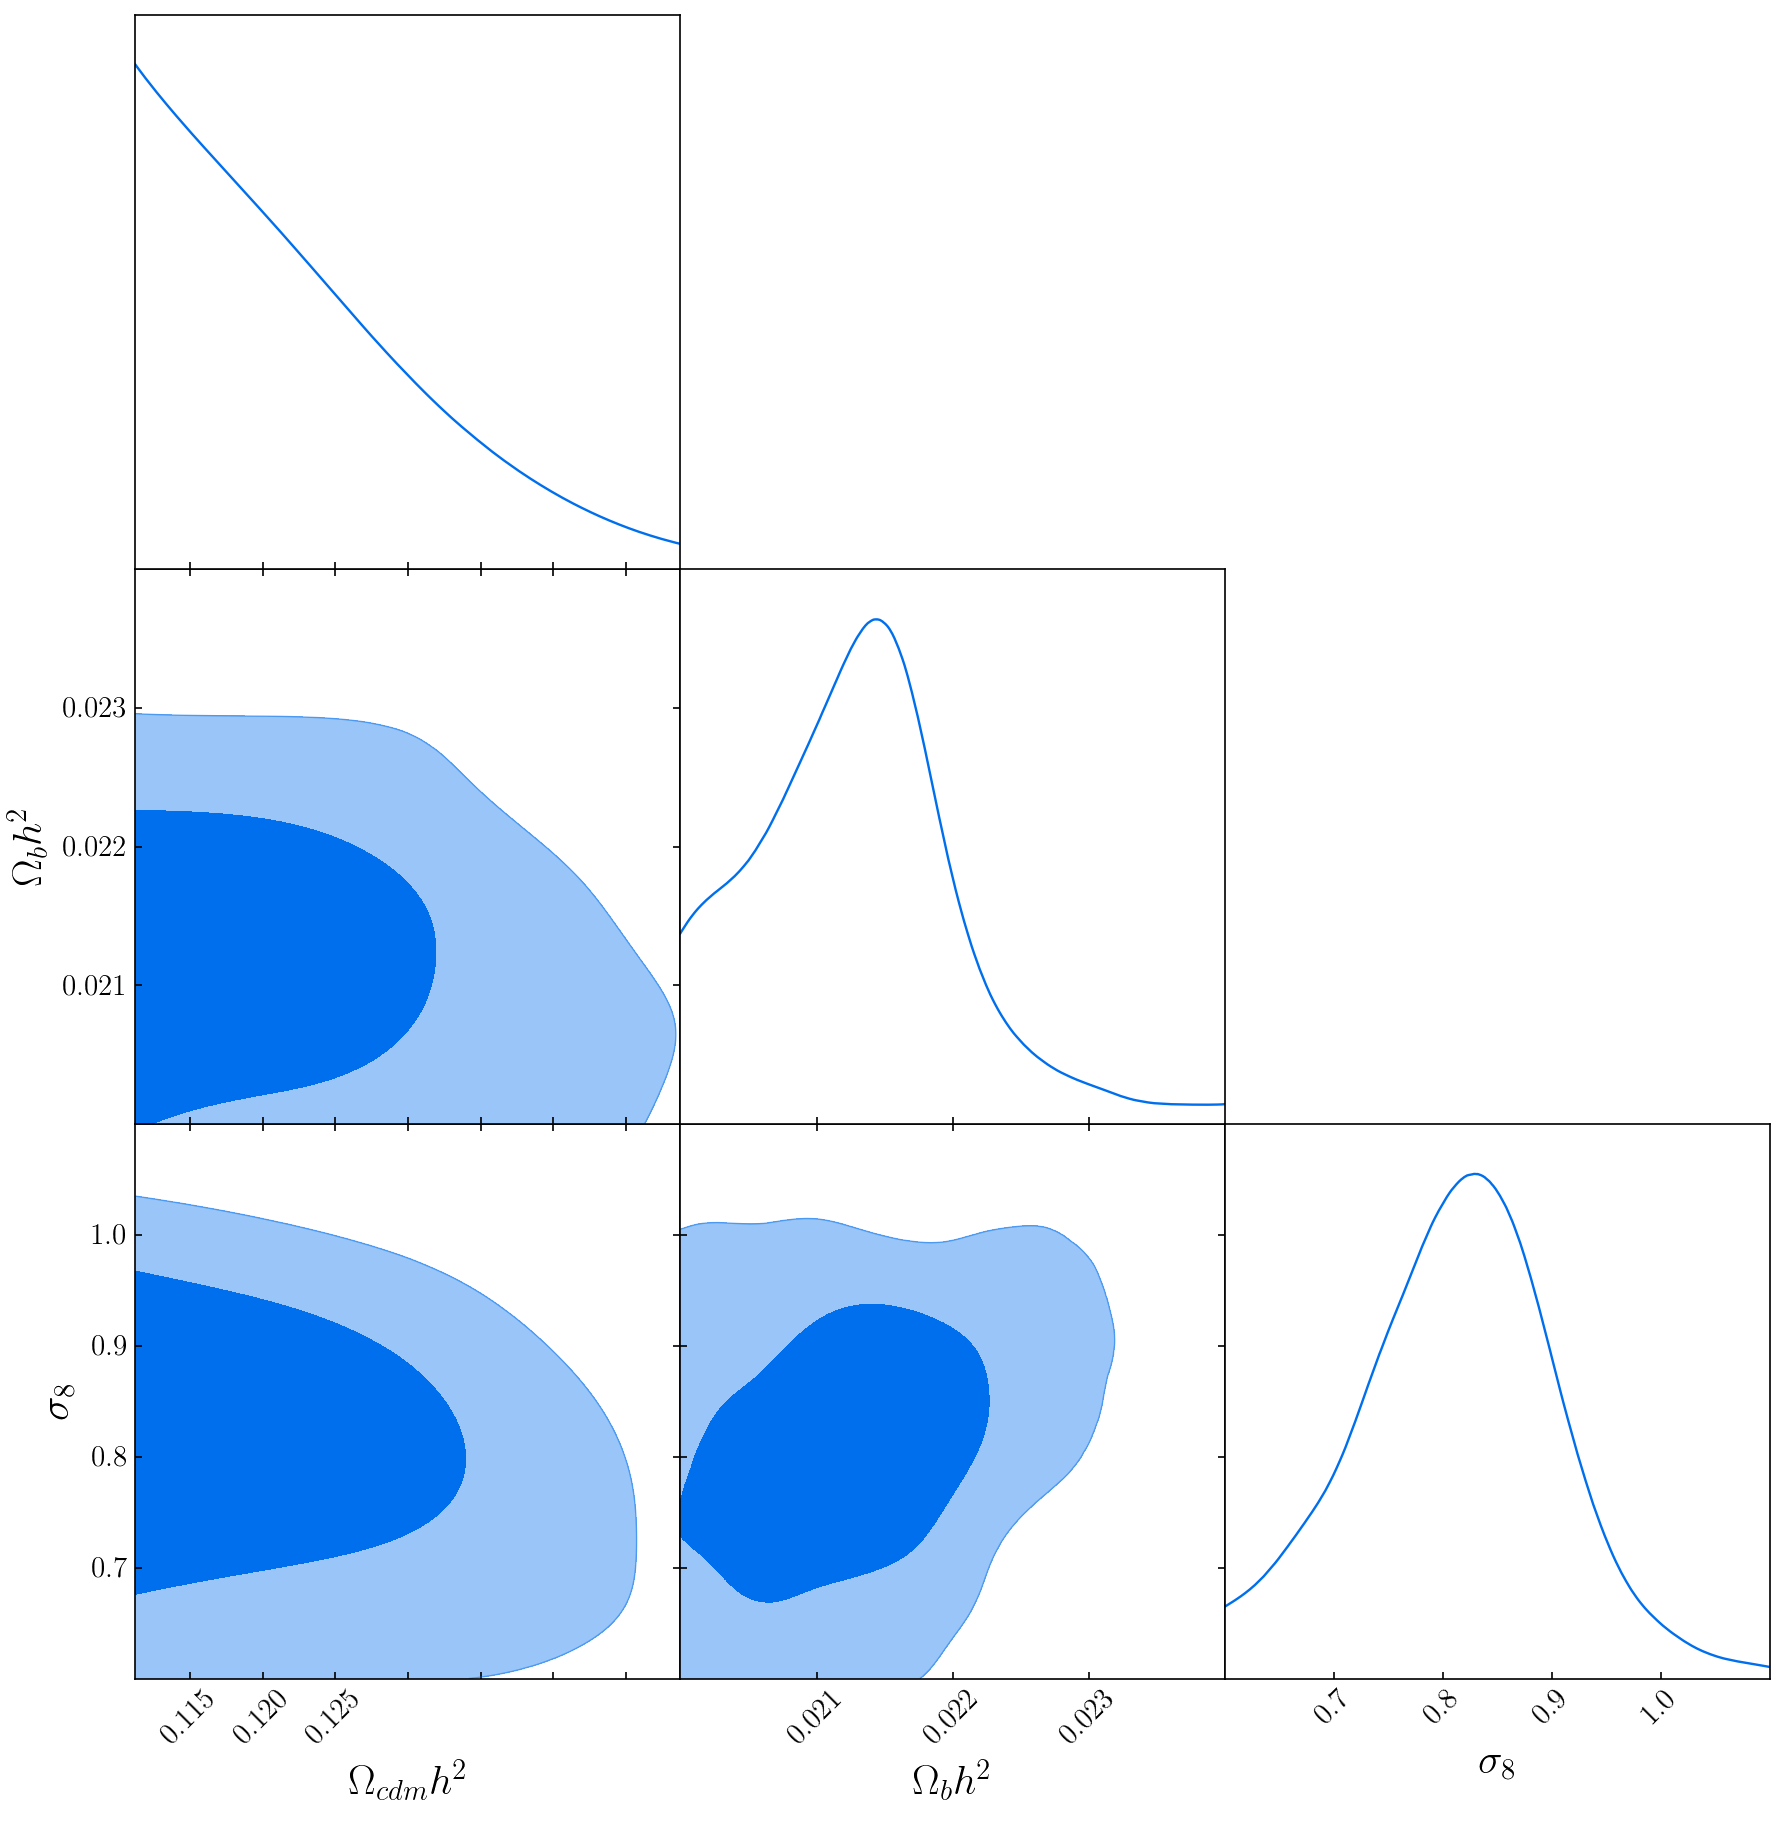

Population 1/50
Sampling proposal density...
Done.


training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 ])]
validation_loss: [array([23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 23.74737167, 23.74737167, 23.74737167, 23.74737167,
       23.74737167, 31.83583832, 31.83583832, 31.83583832, 31.83583

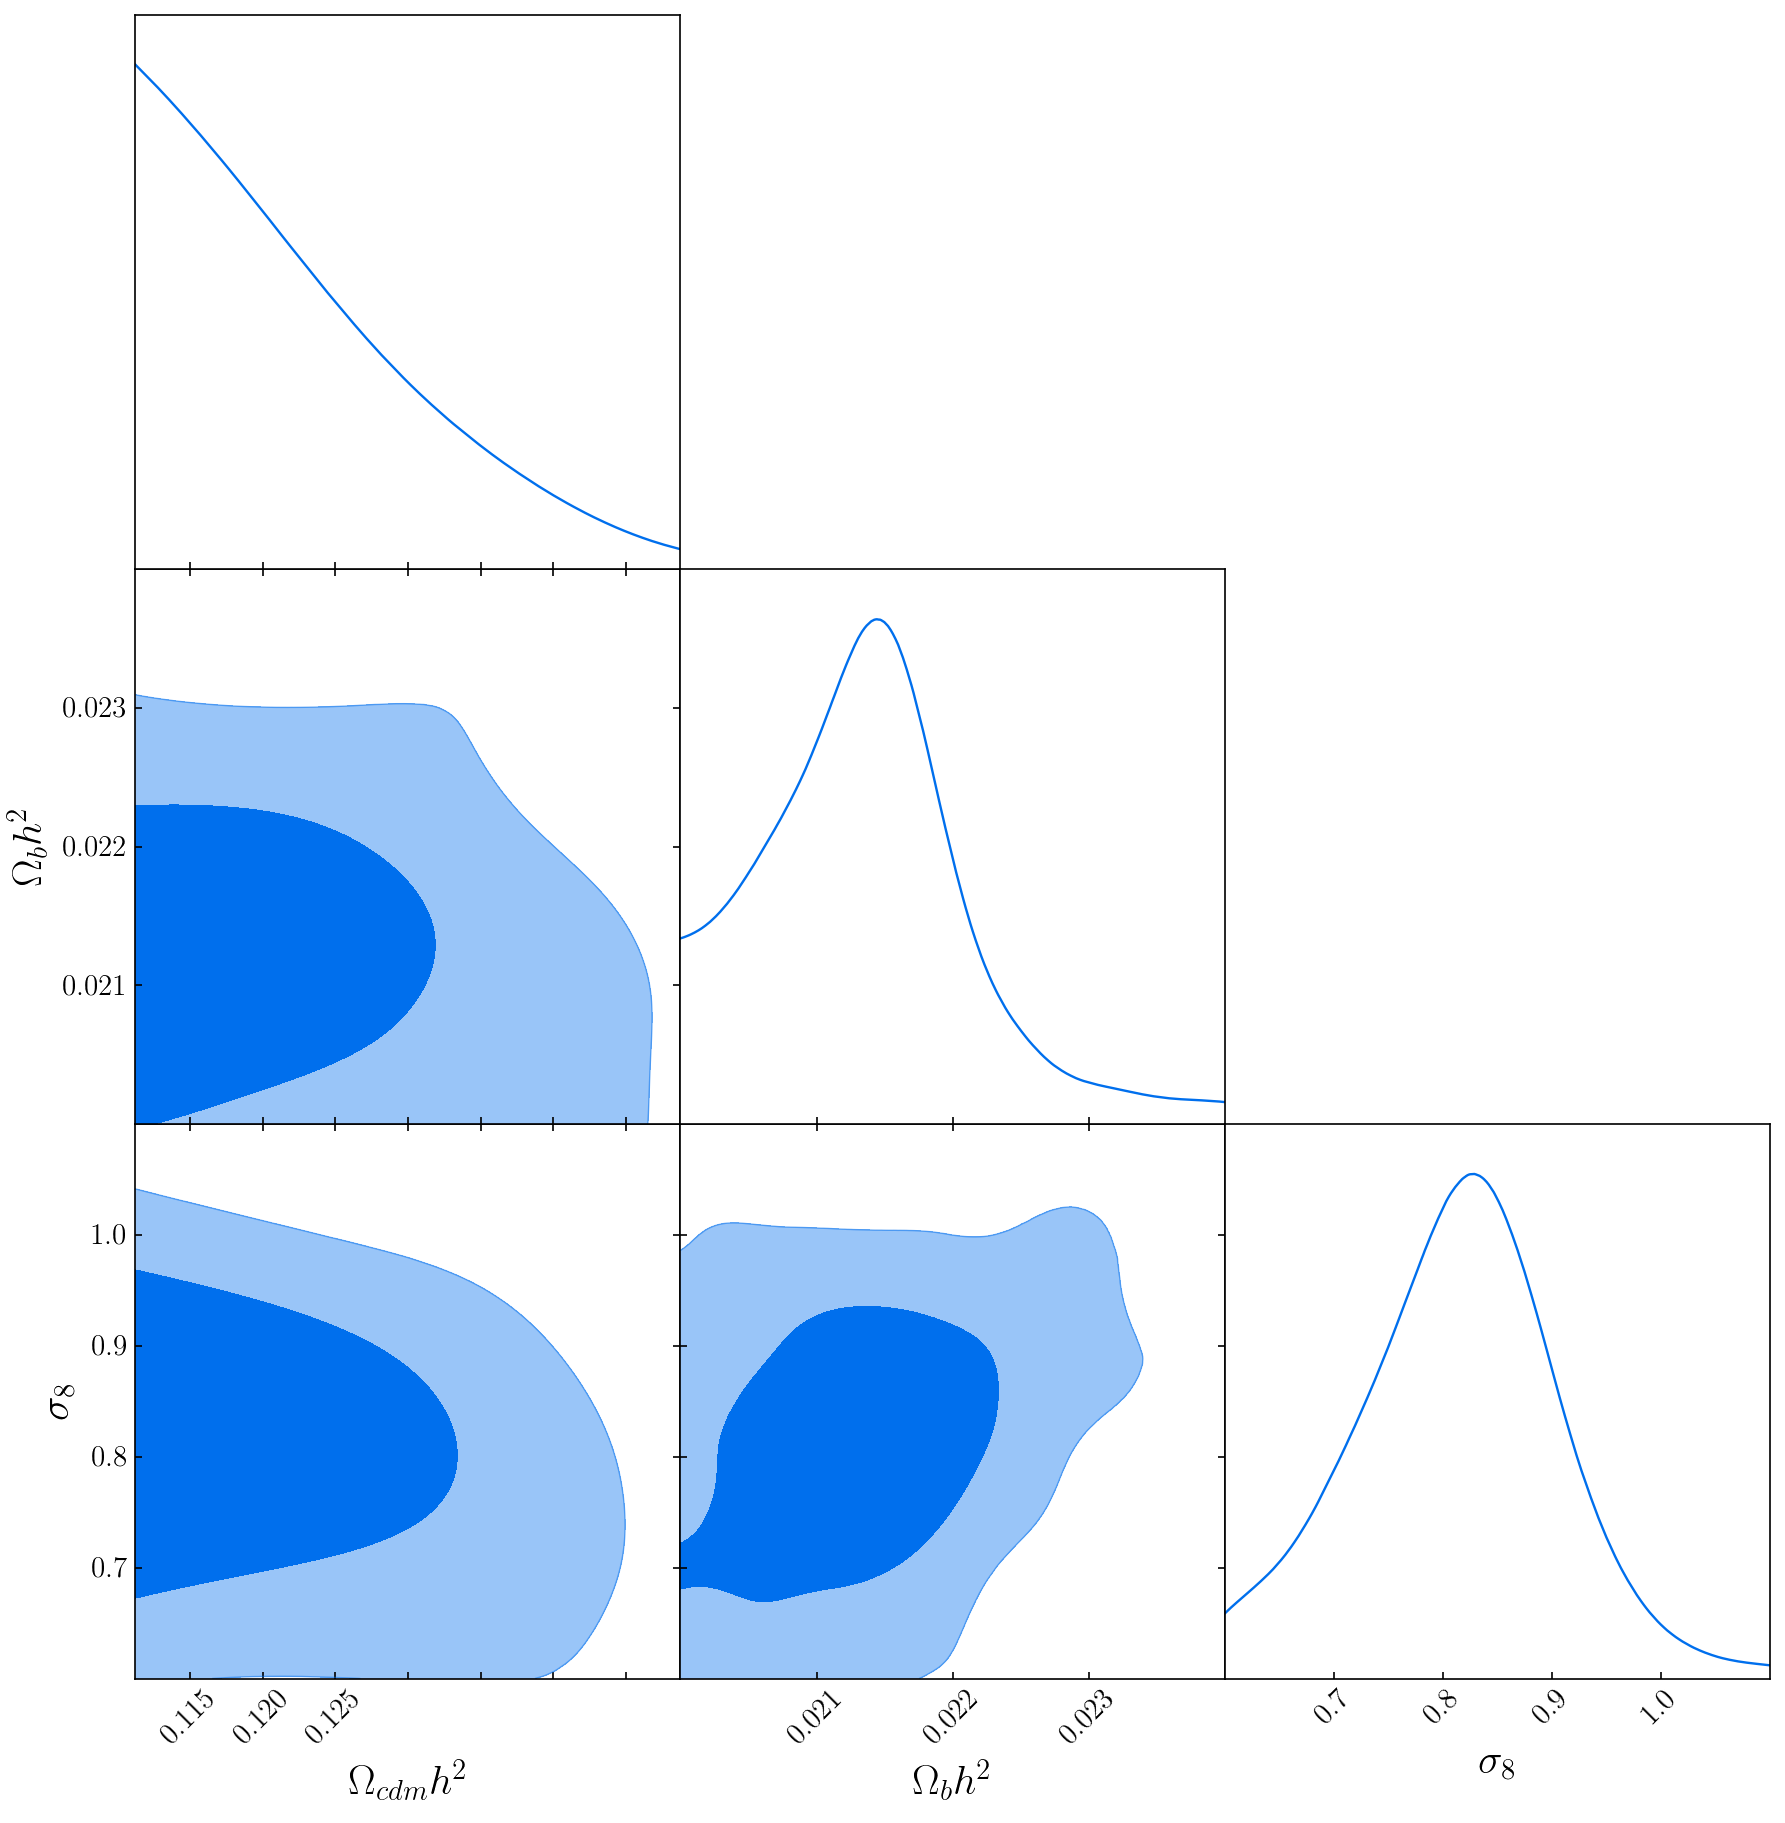

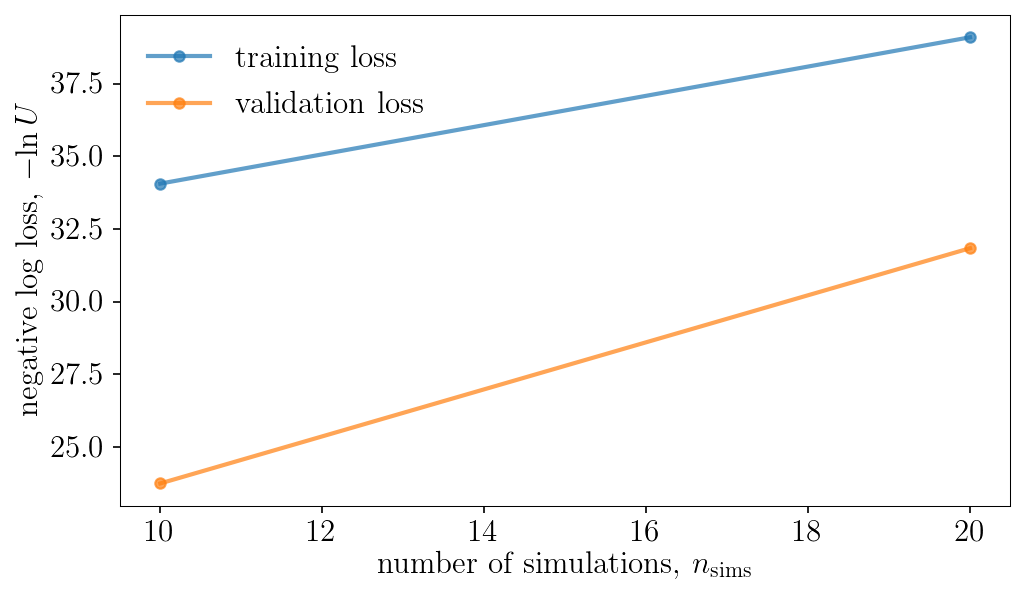

Population 2/50
Sampling proposal density...
Done.


training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 ])]
validation_loss: [array([23.74737167, 23.74737167, 23.74737167, 23.74737

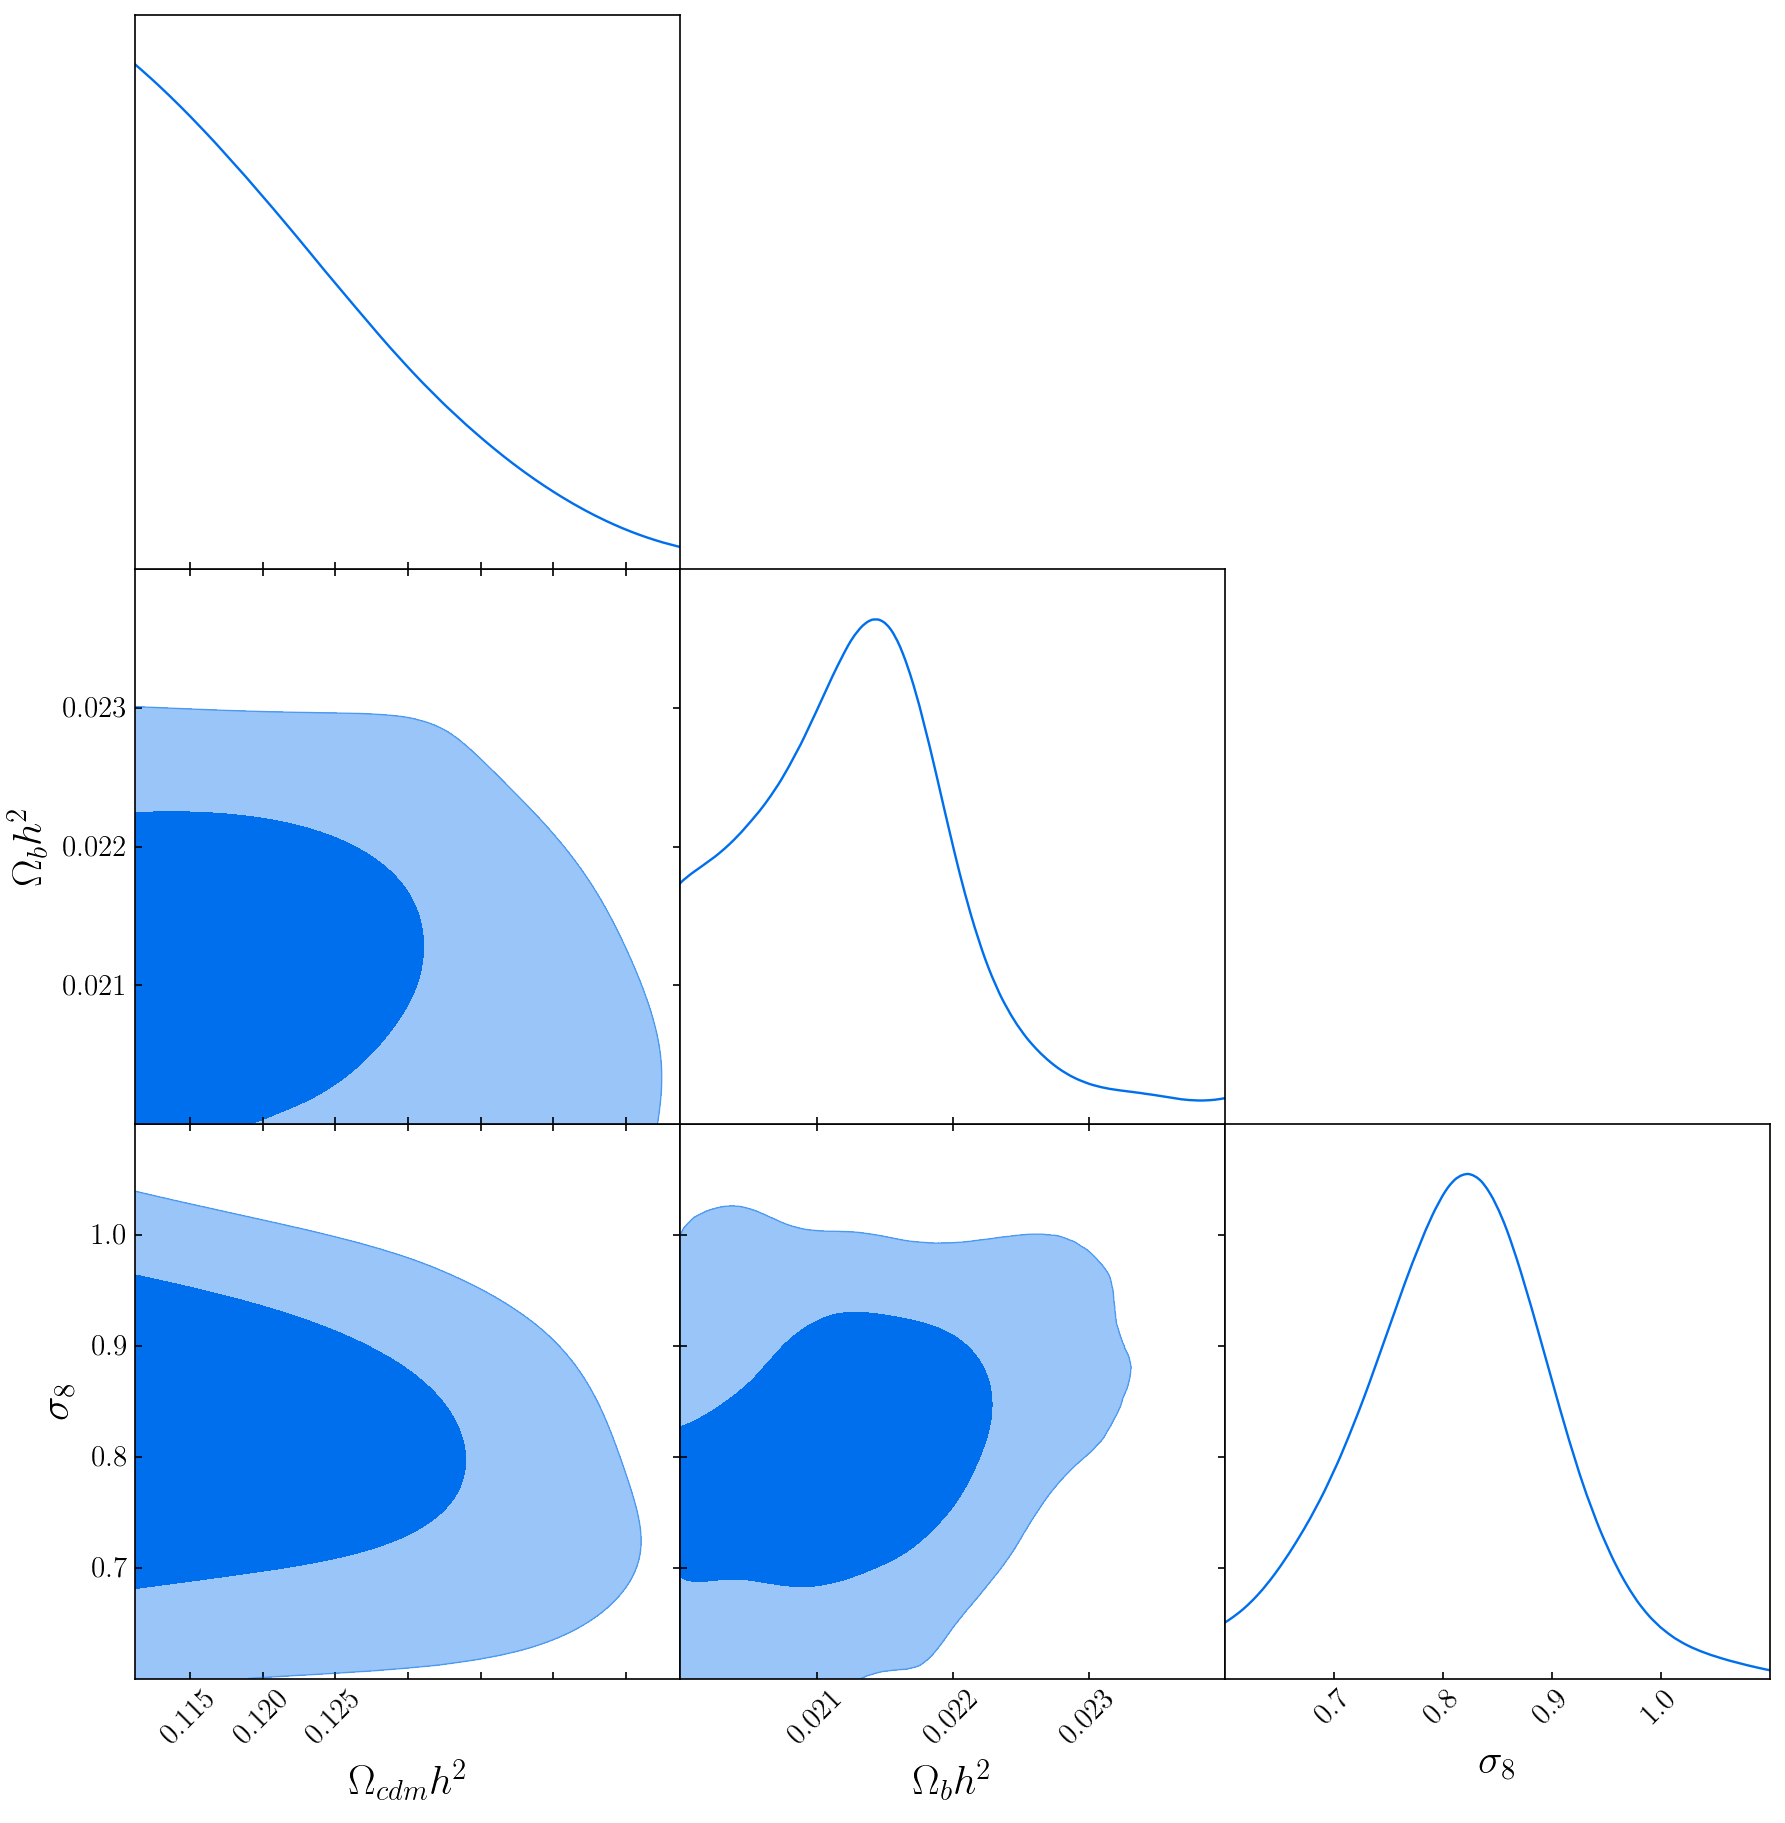

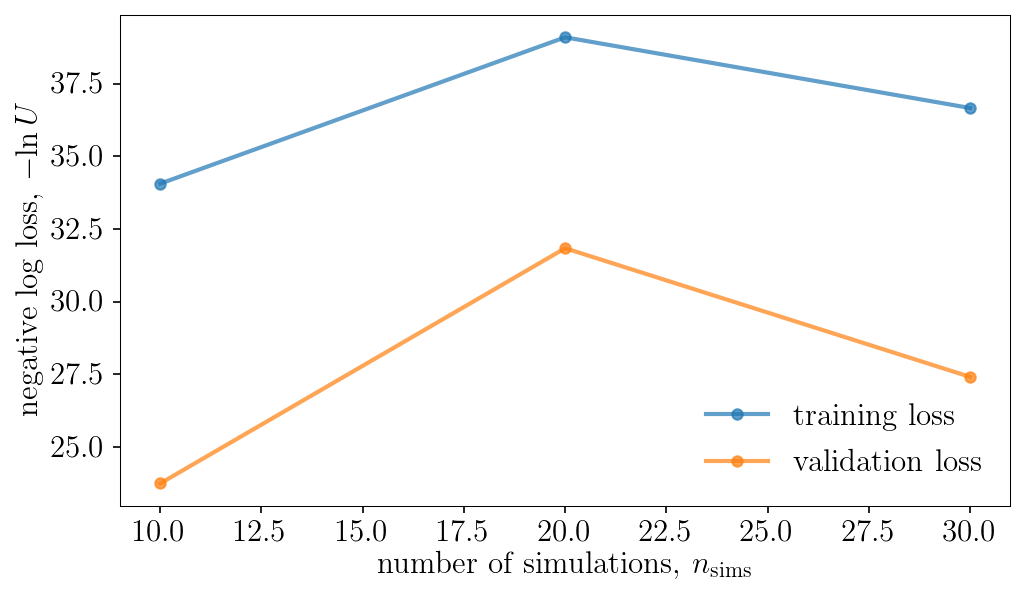

Population 3/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

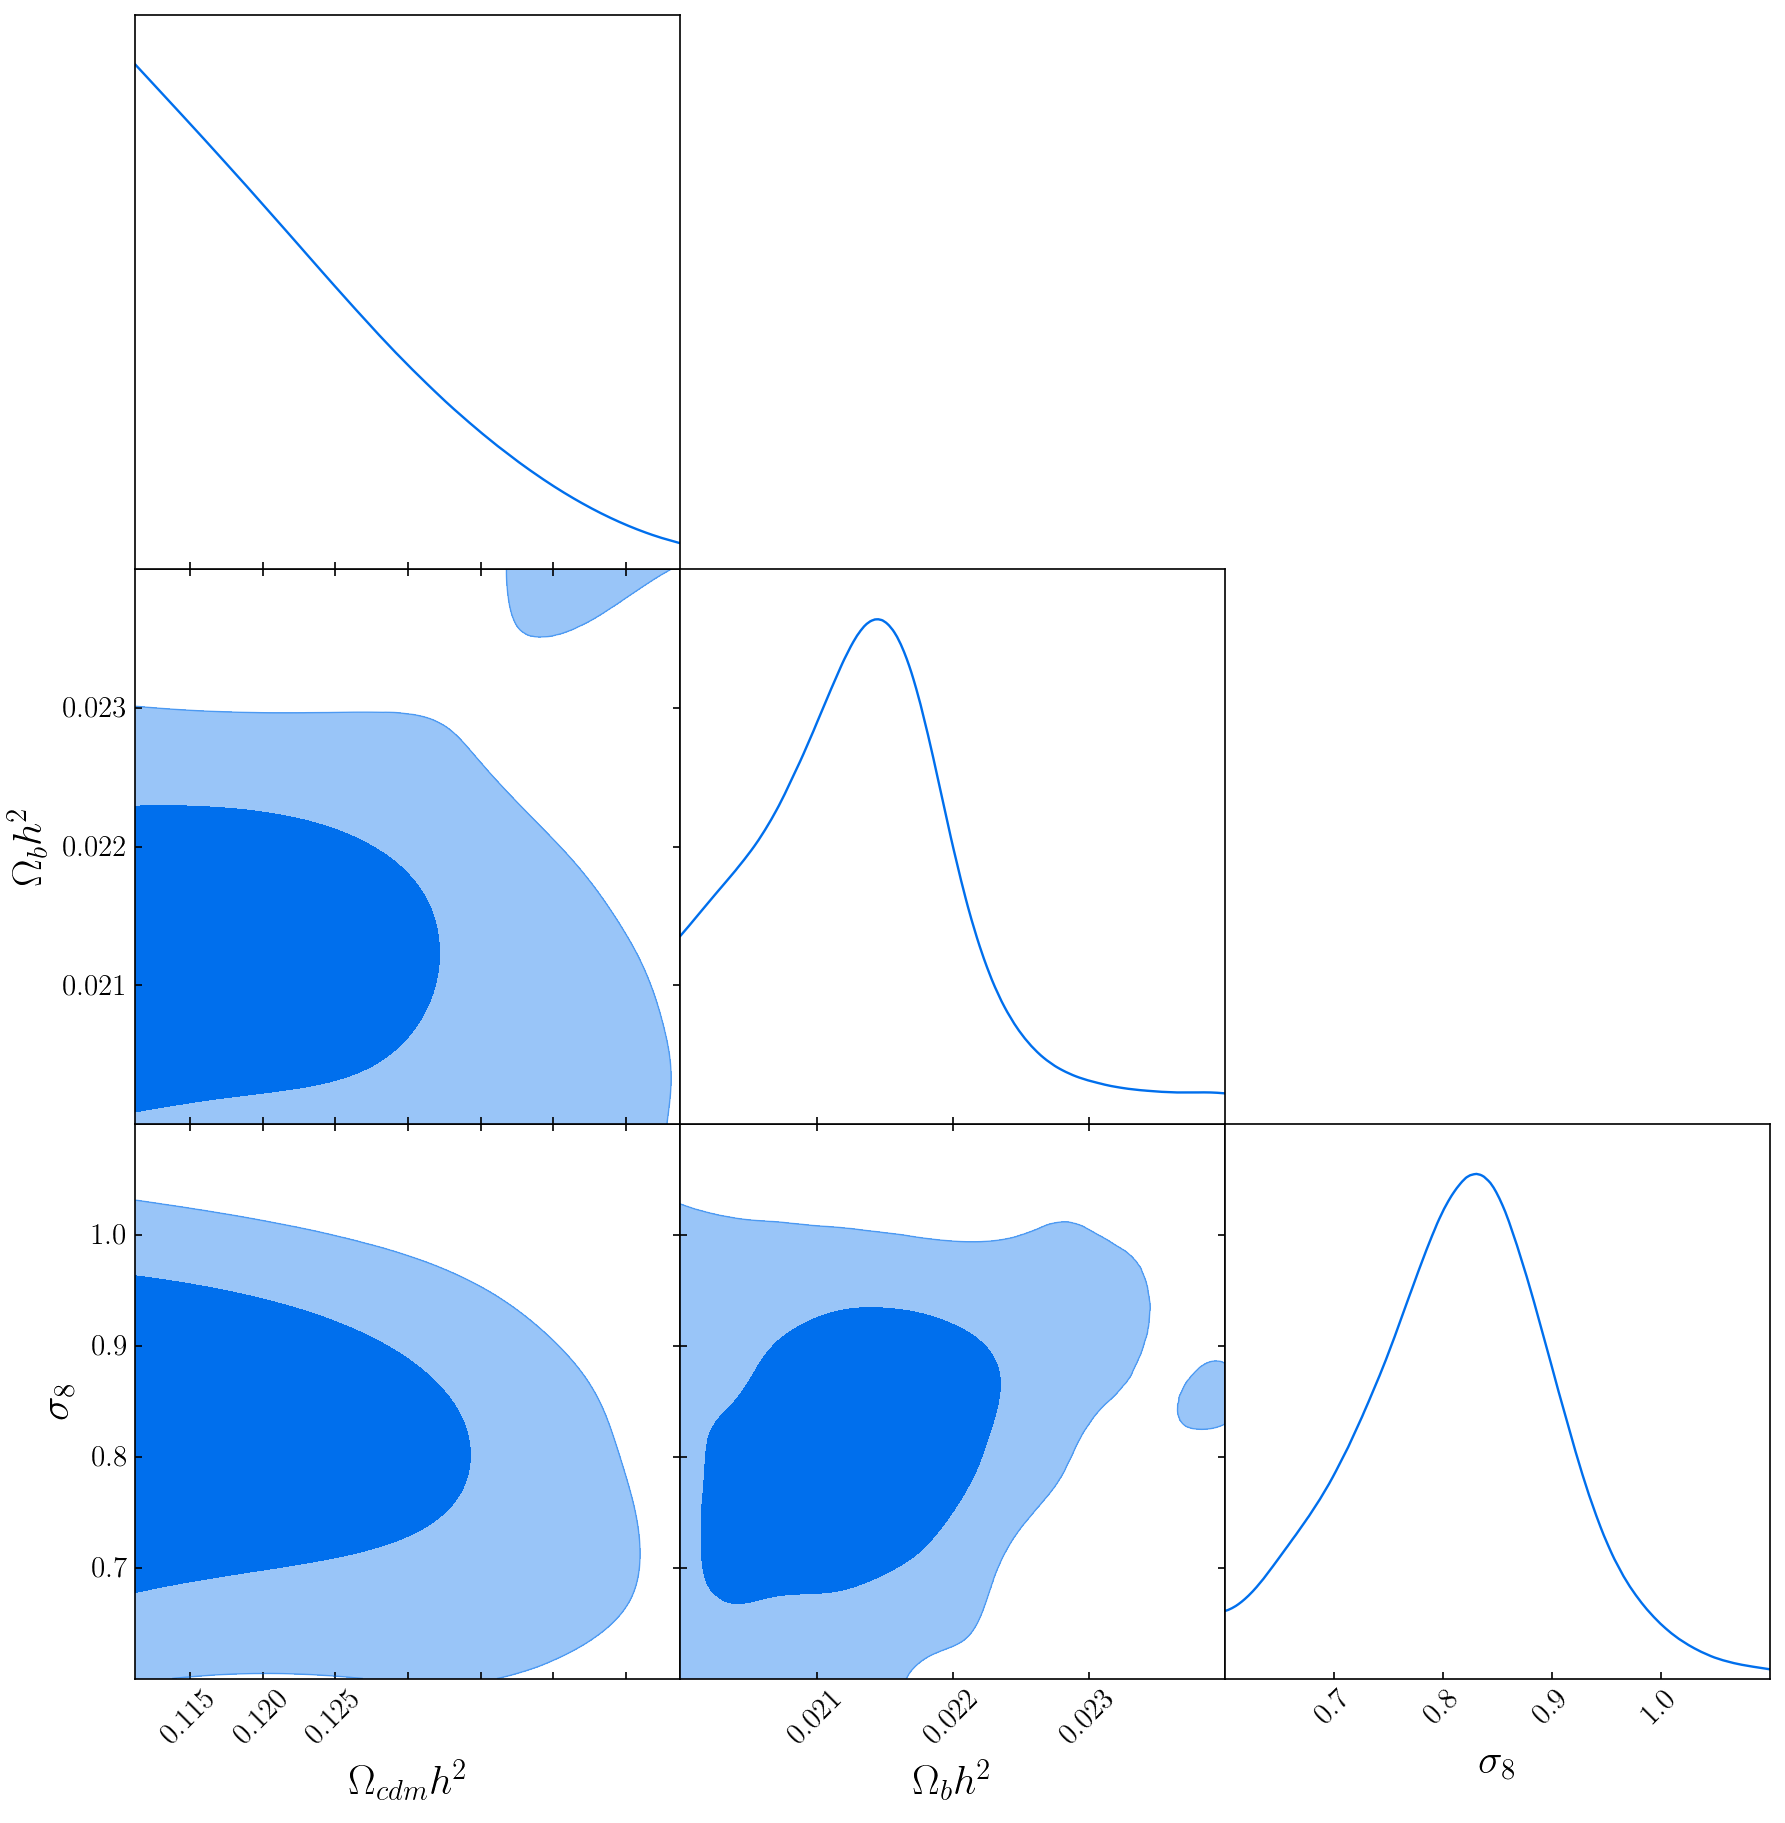

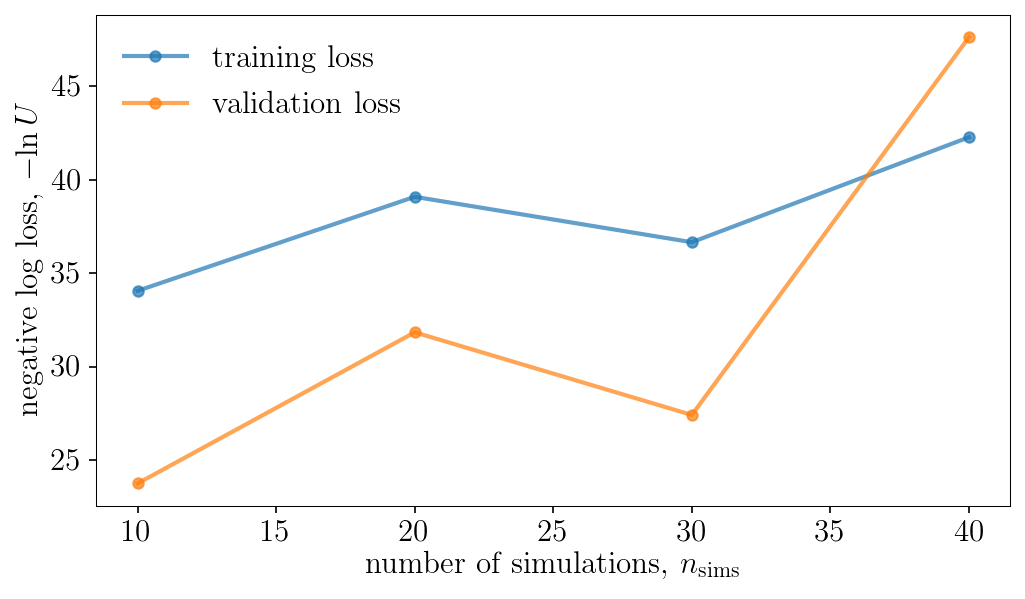

Population 4/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

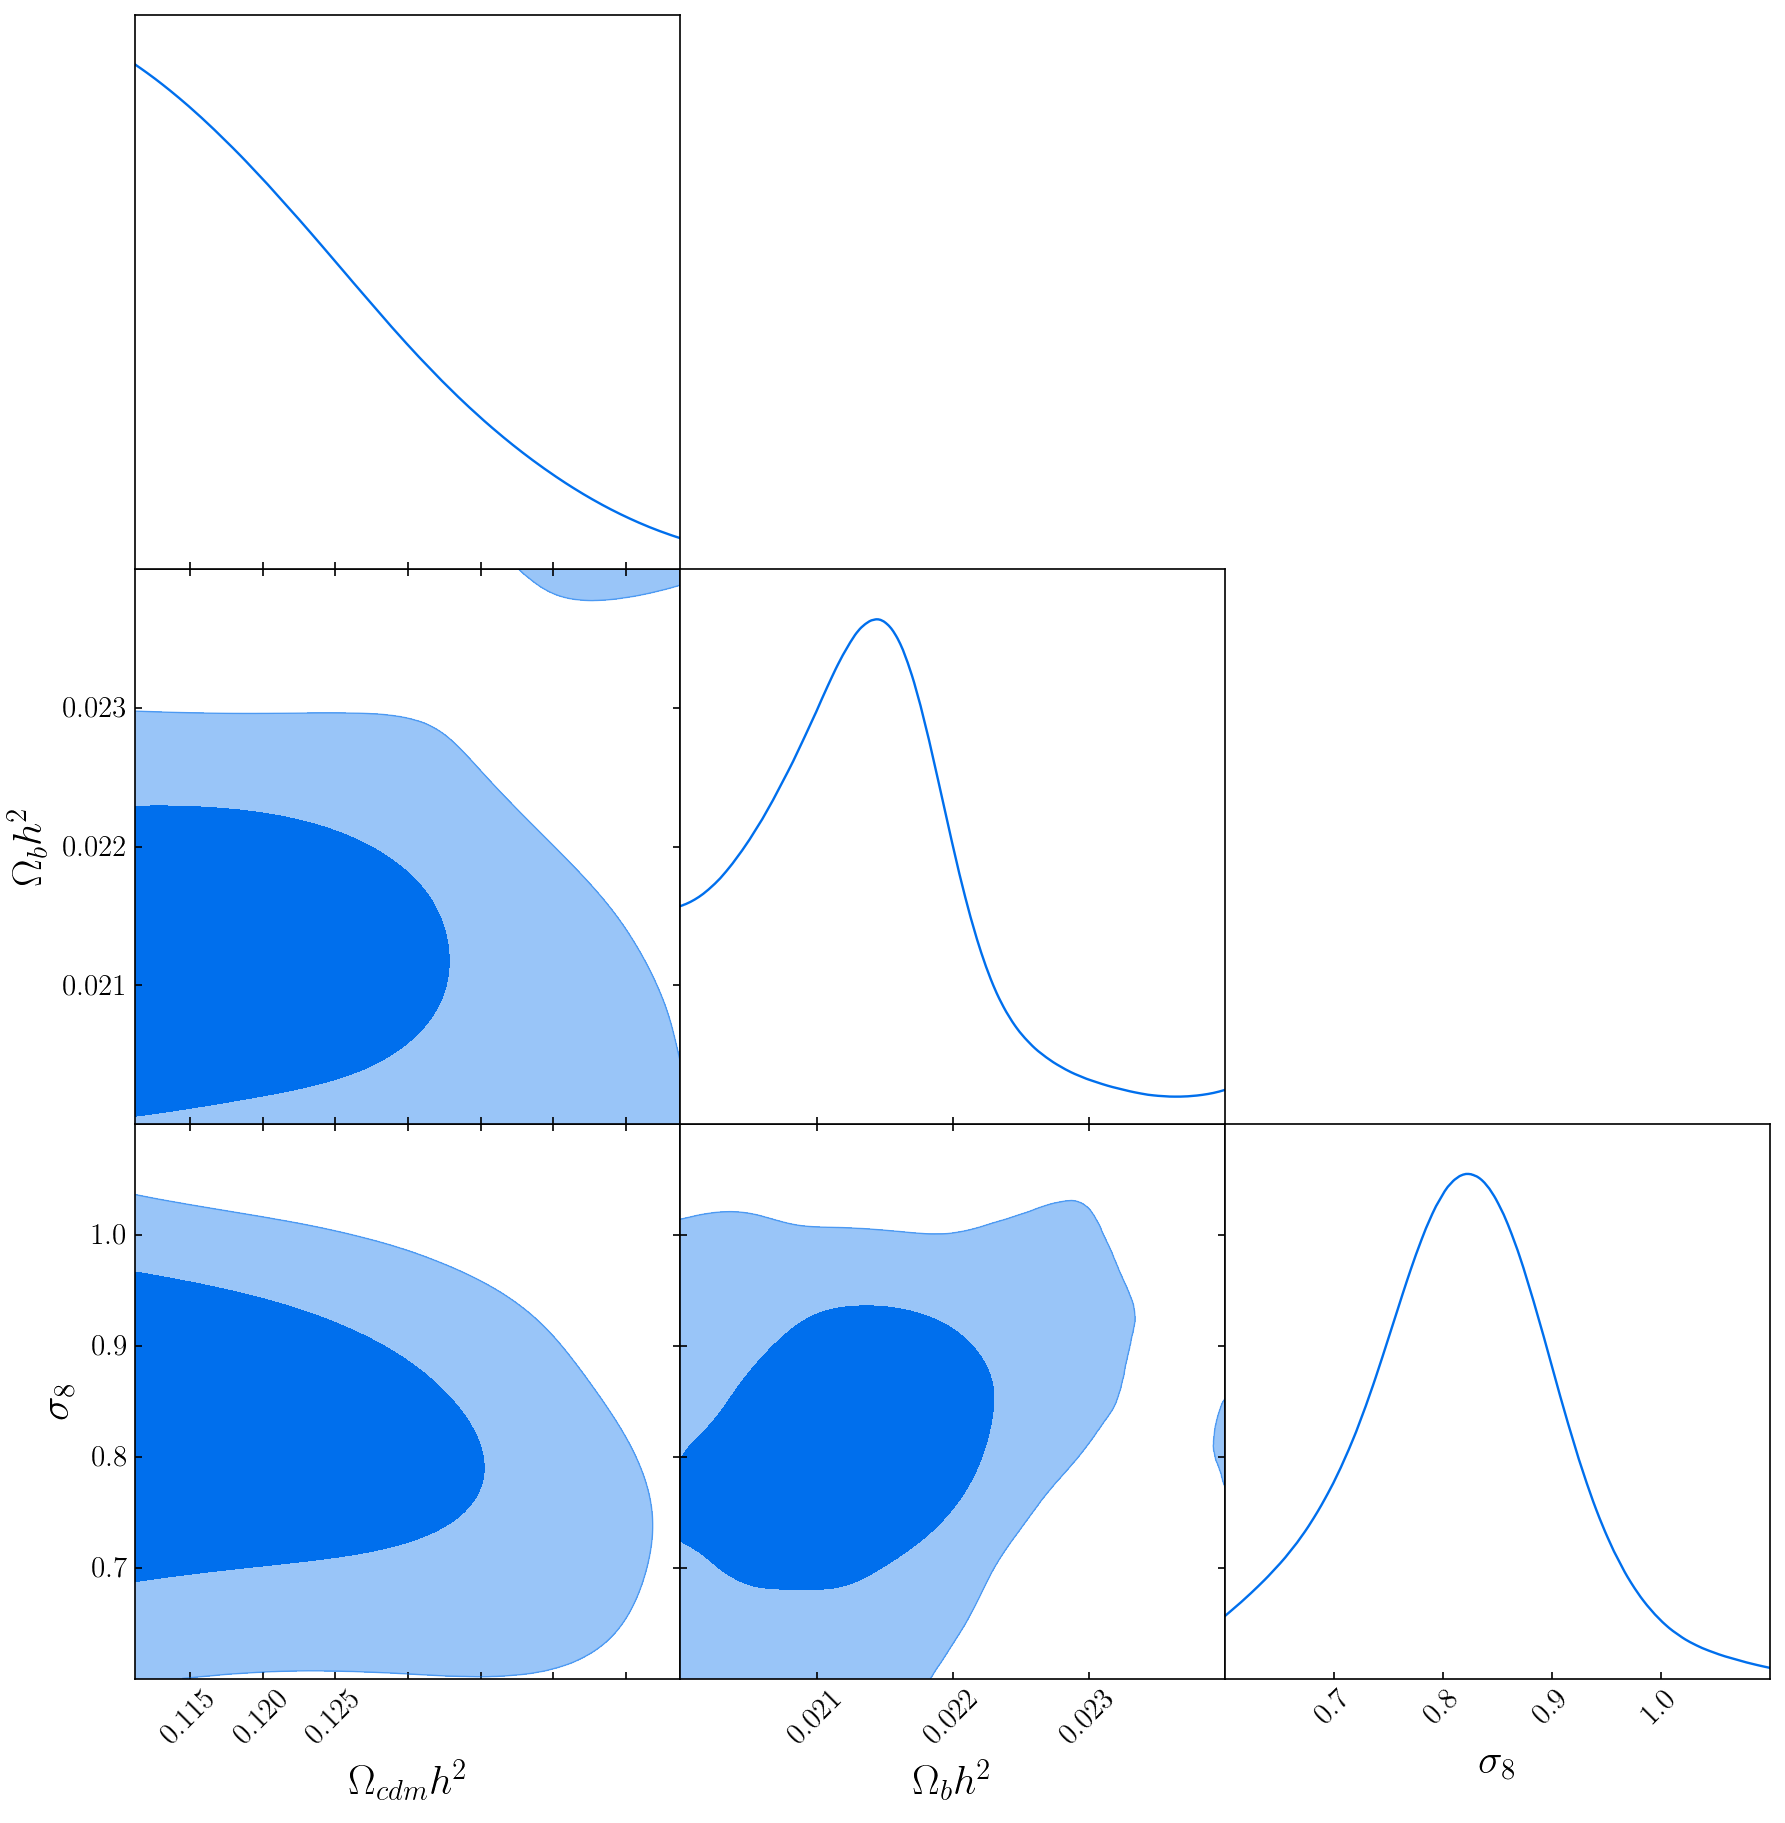

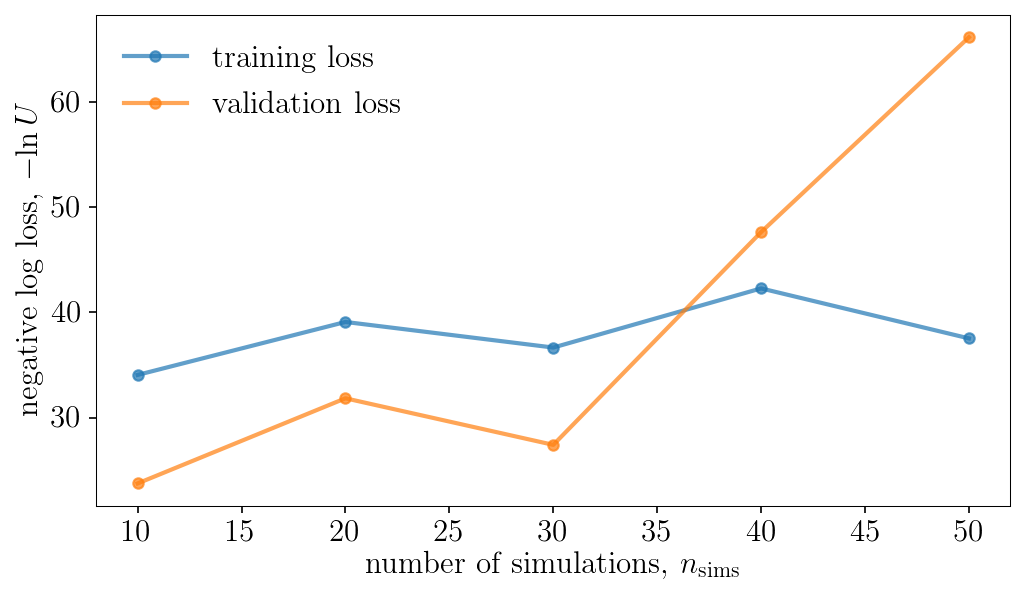

Population 5/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

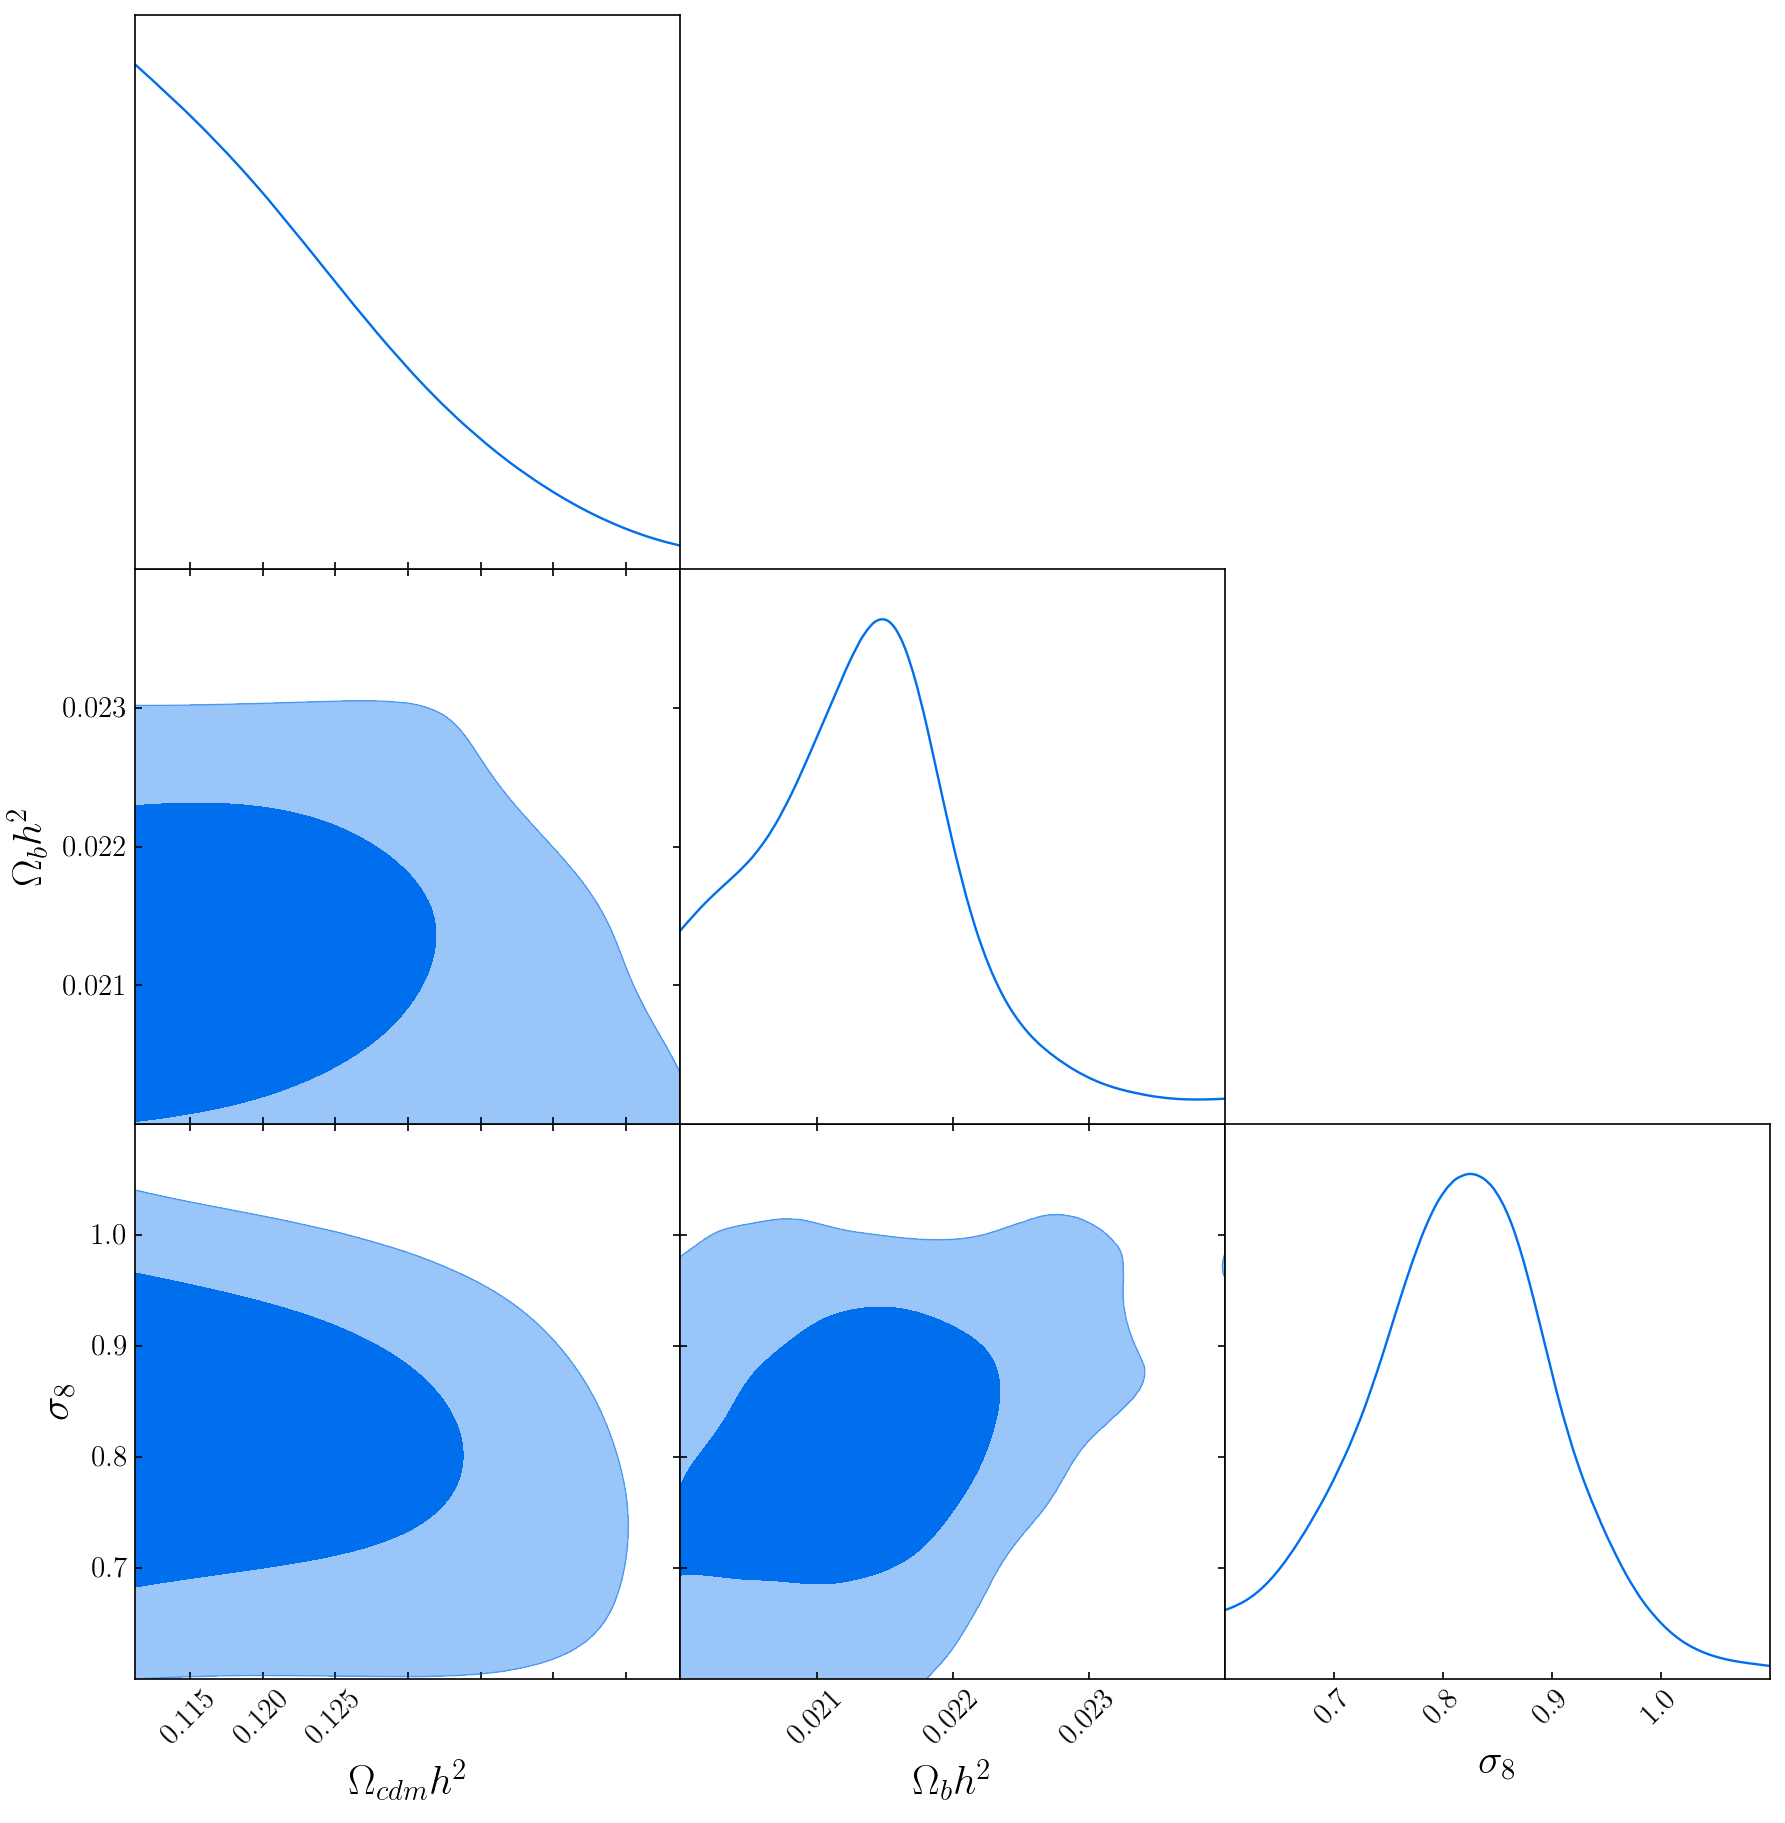

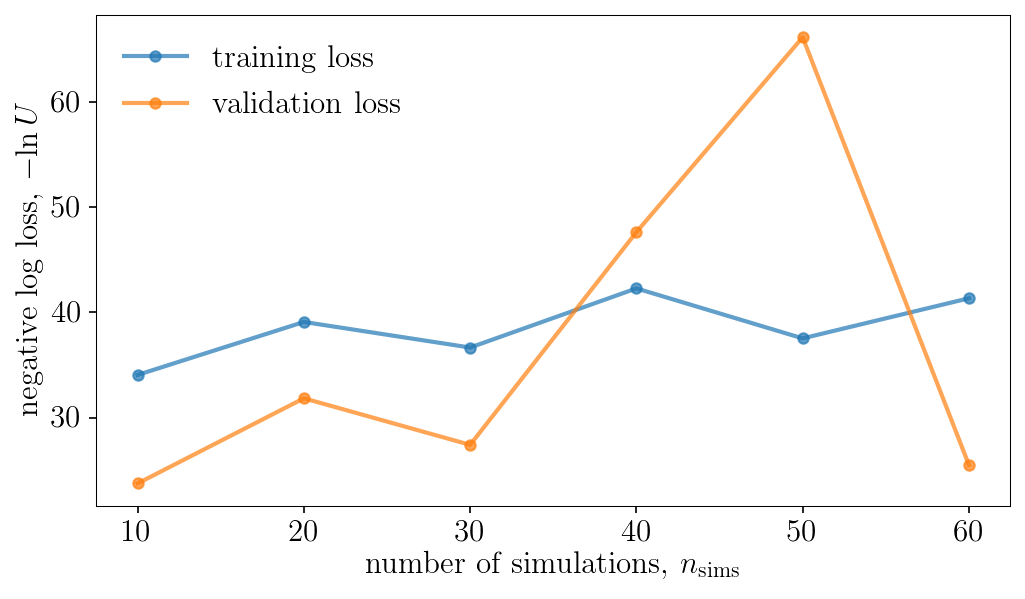

Population 6/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

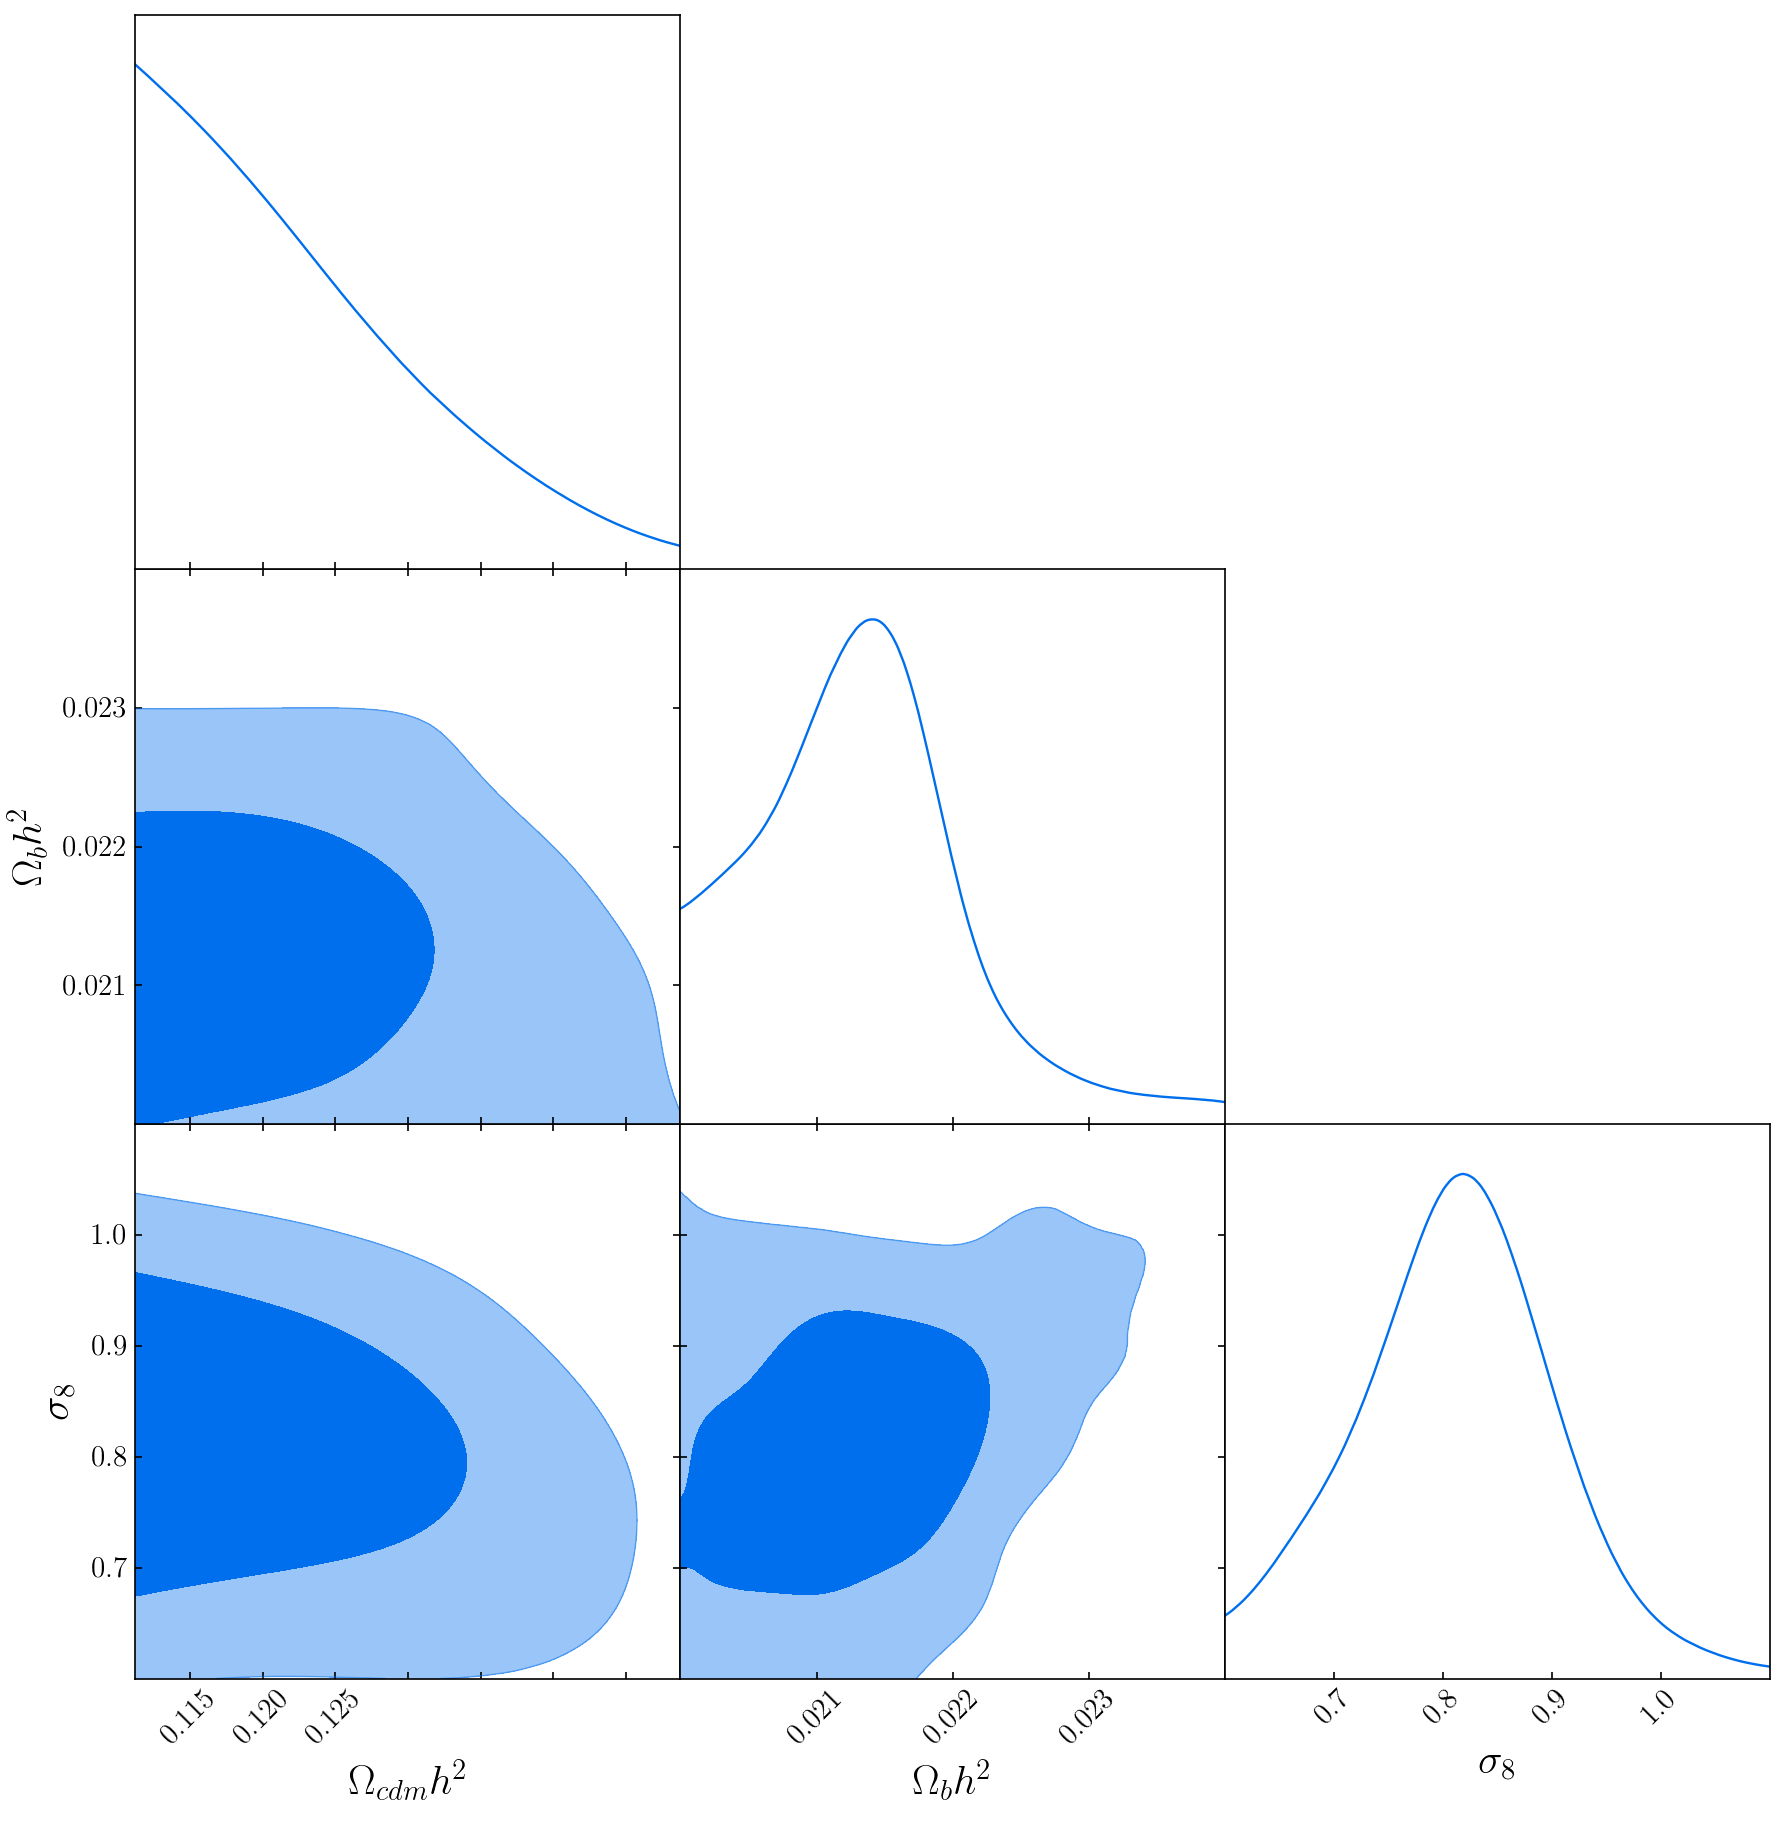

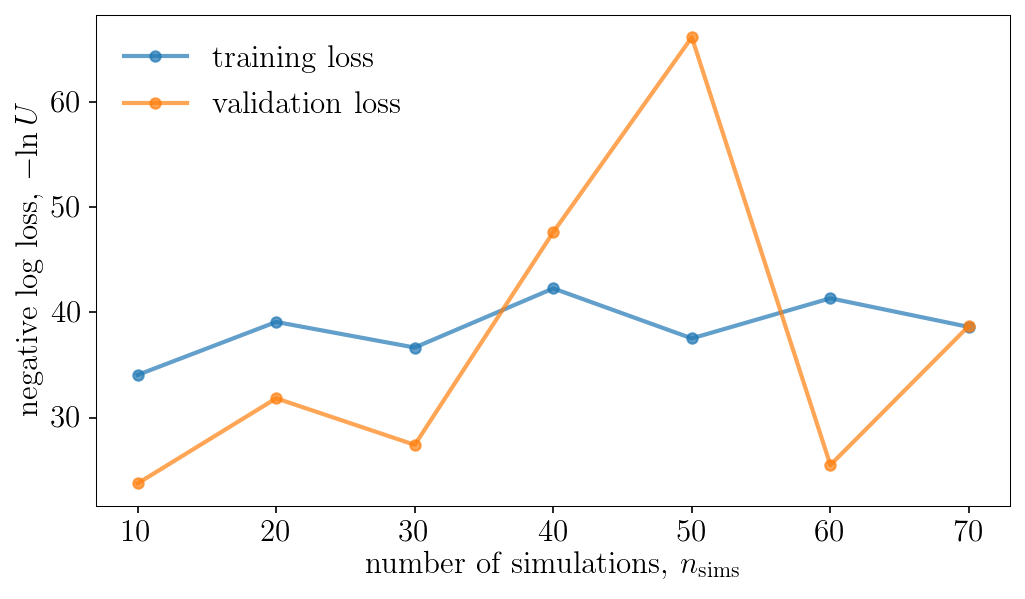

Population 7/50
Sampling proposal density...
Done.


training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 42

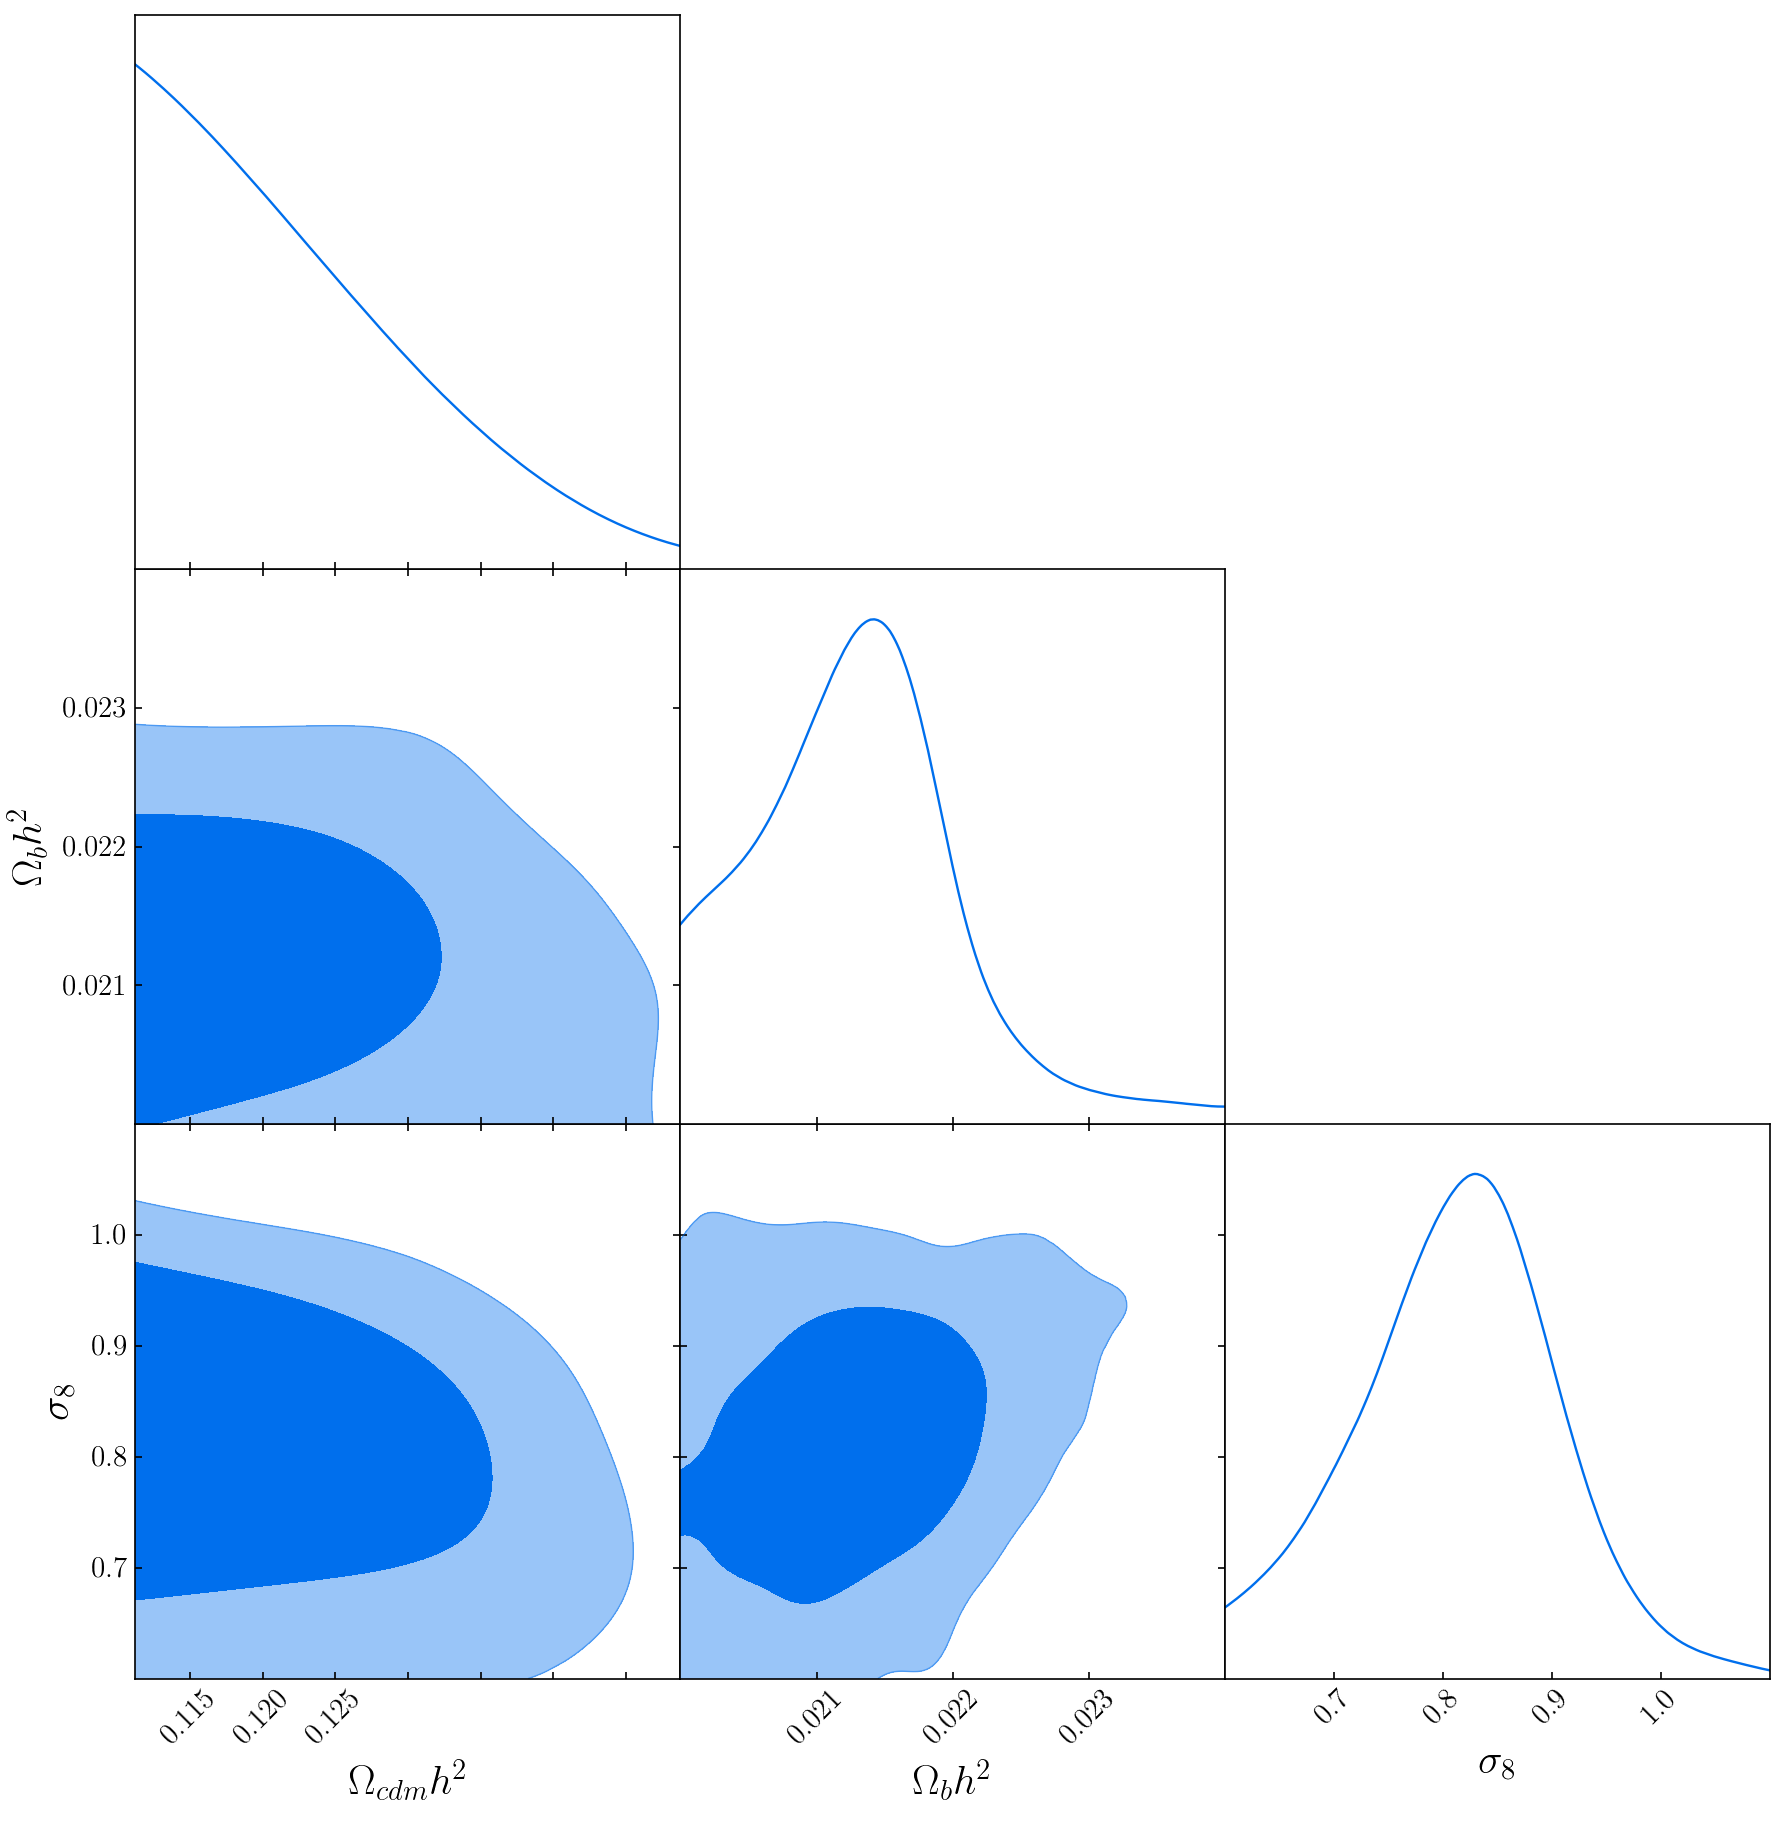

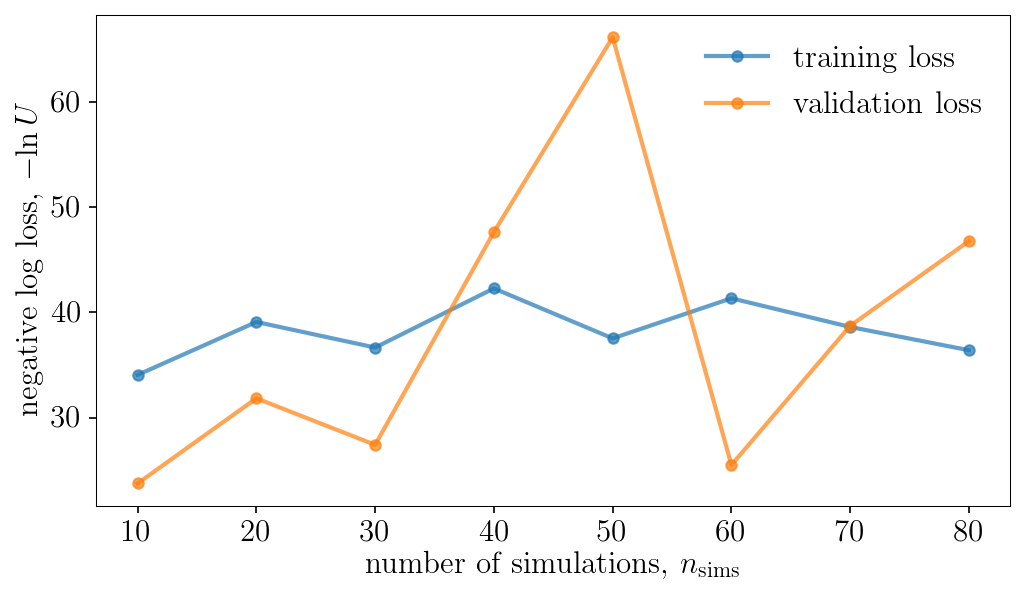

Population 8/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

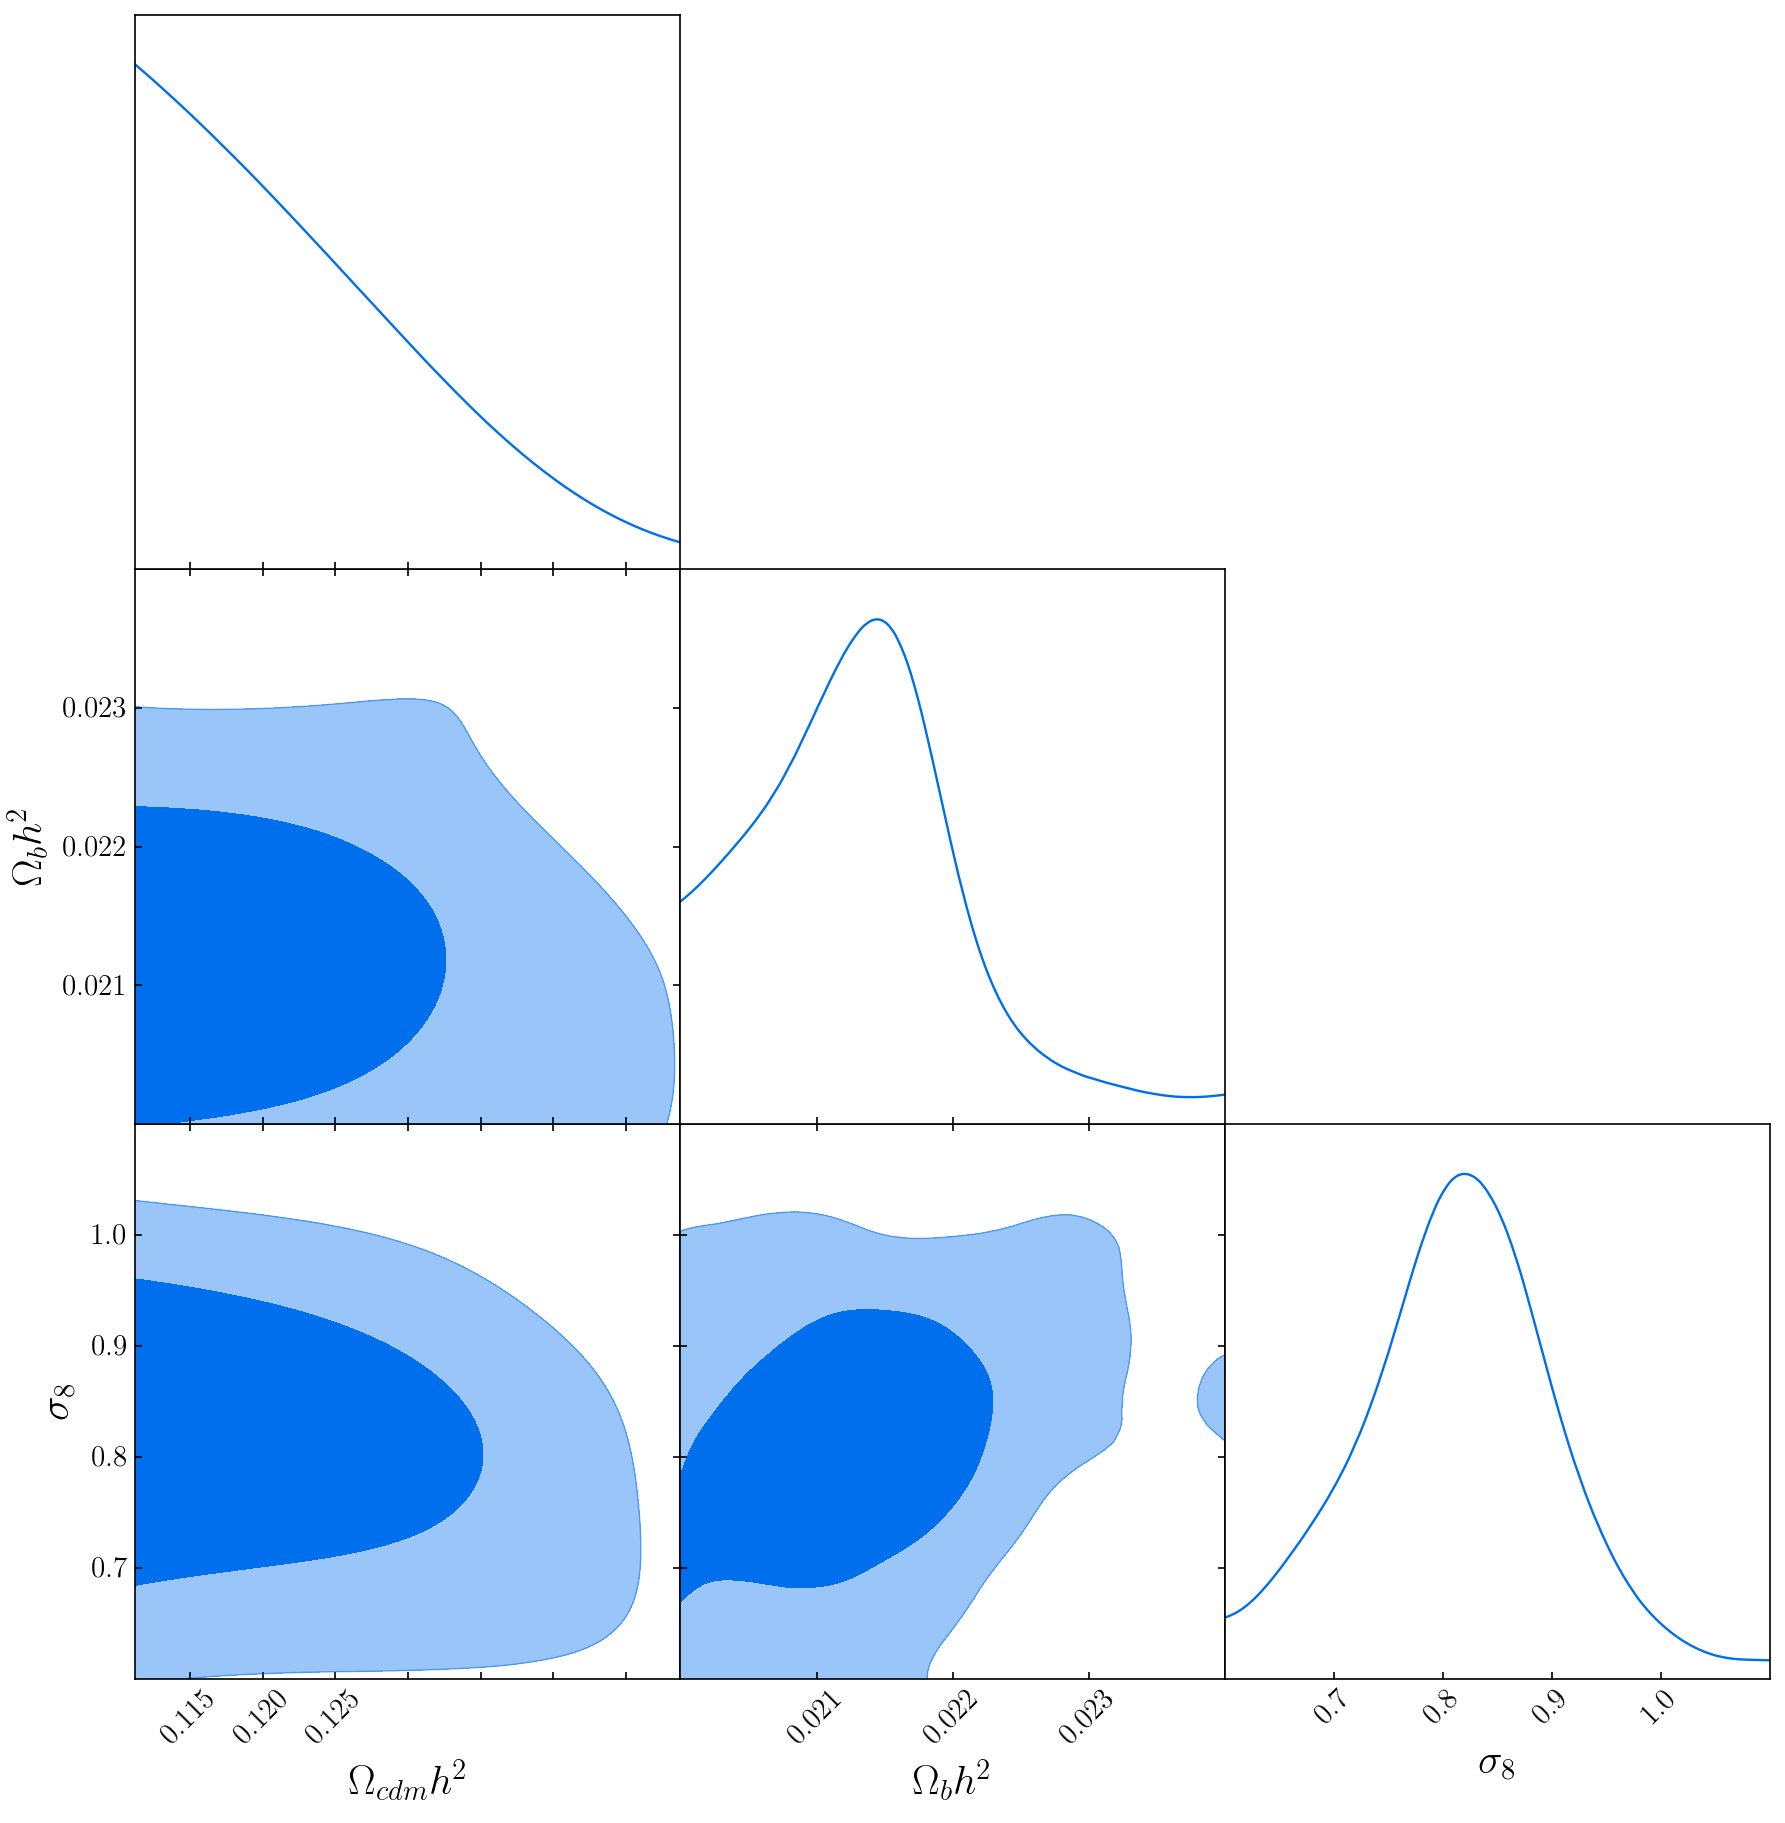

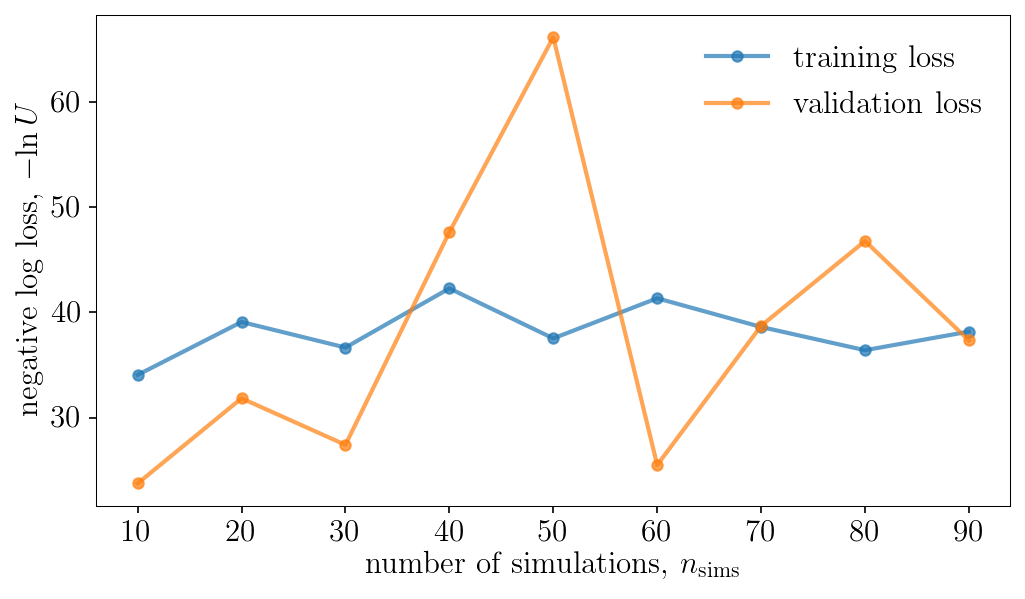

Population 9/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

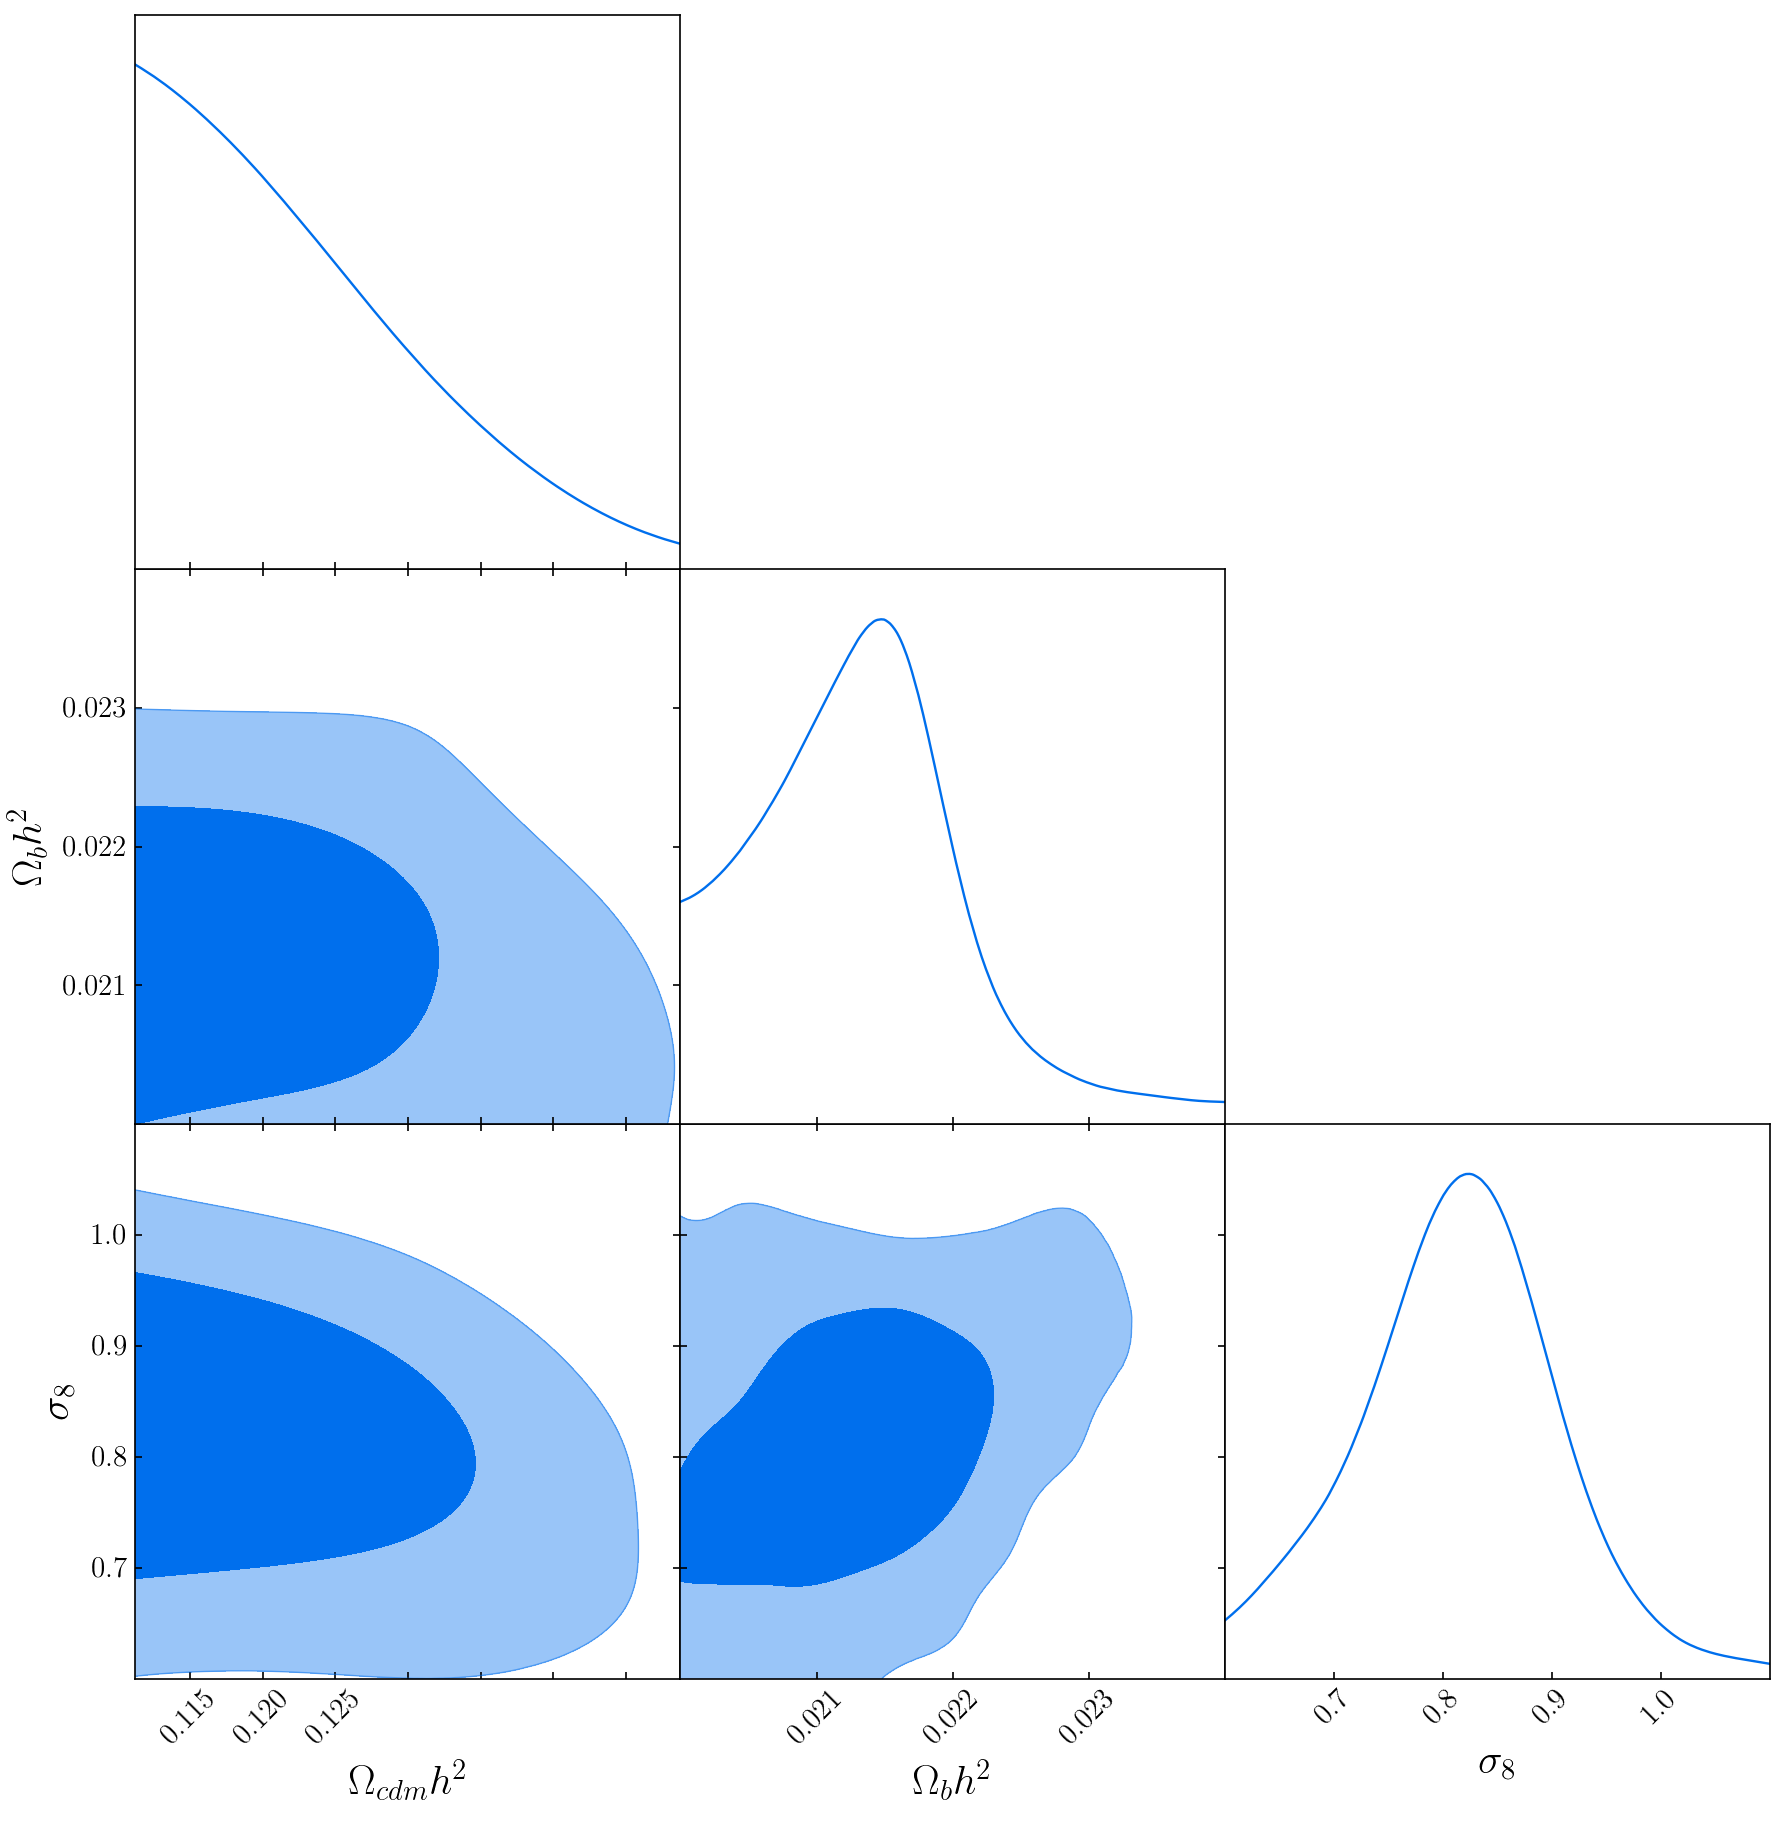

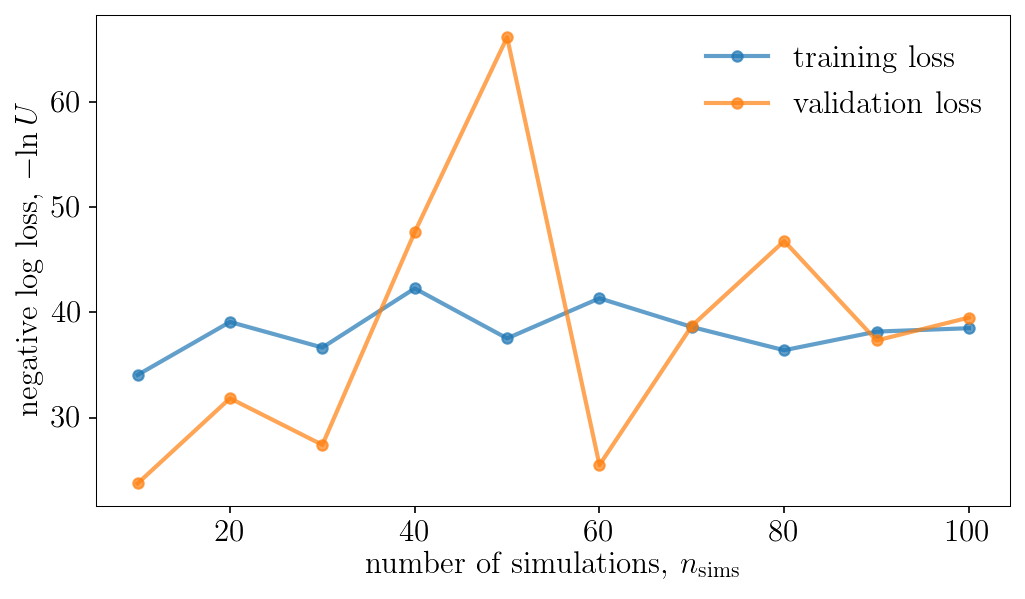

Population 10/50
Sampling proposal density...
Done.



training_loss: [array([34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 34.05736923, 34.05736923, 34.05736923, 34.05736923,
       34.05736923, 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 , 39.0892601 ,
       39.0892601 , 39.0892601 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 , 36.6579628 ,
       36.6579628 , 36.6579628 , 36.6579628 , 42.27725601, 42.27725601,
       42.27725601, 42.27725601, 42.27725601, 4

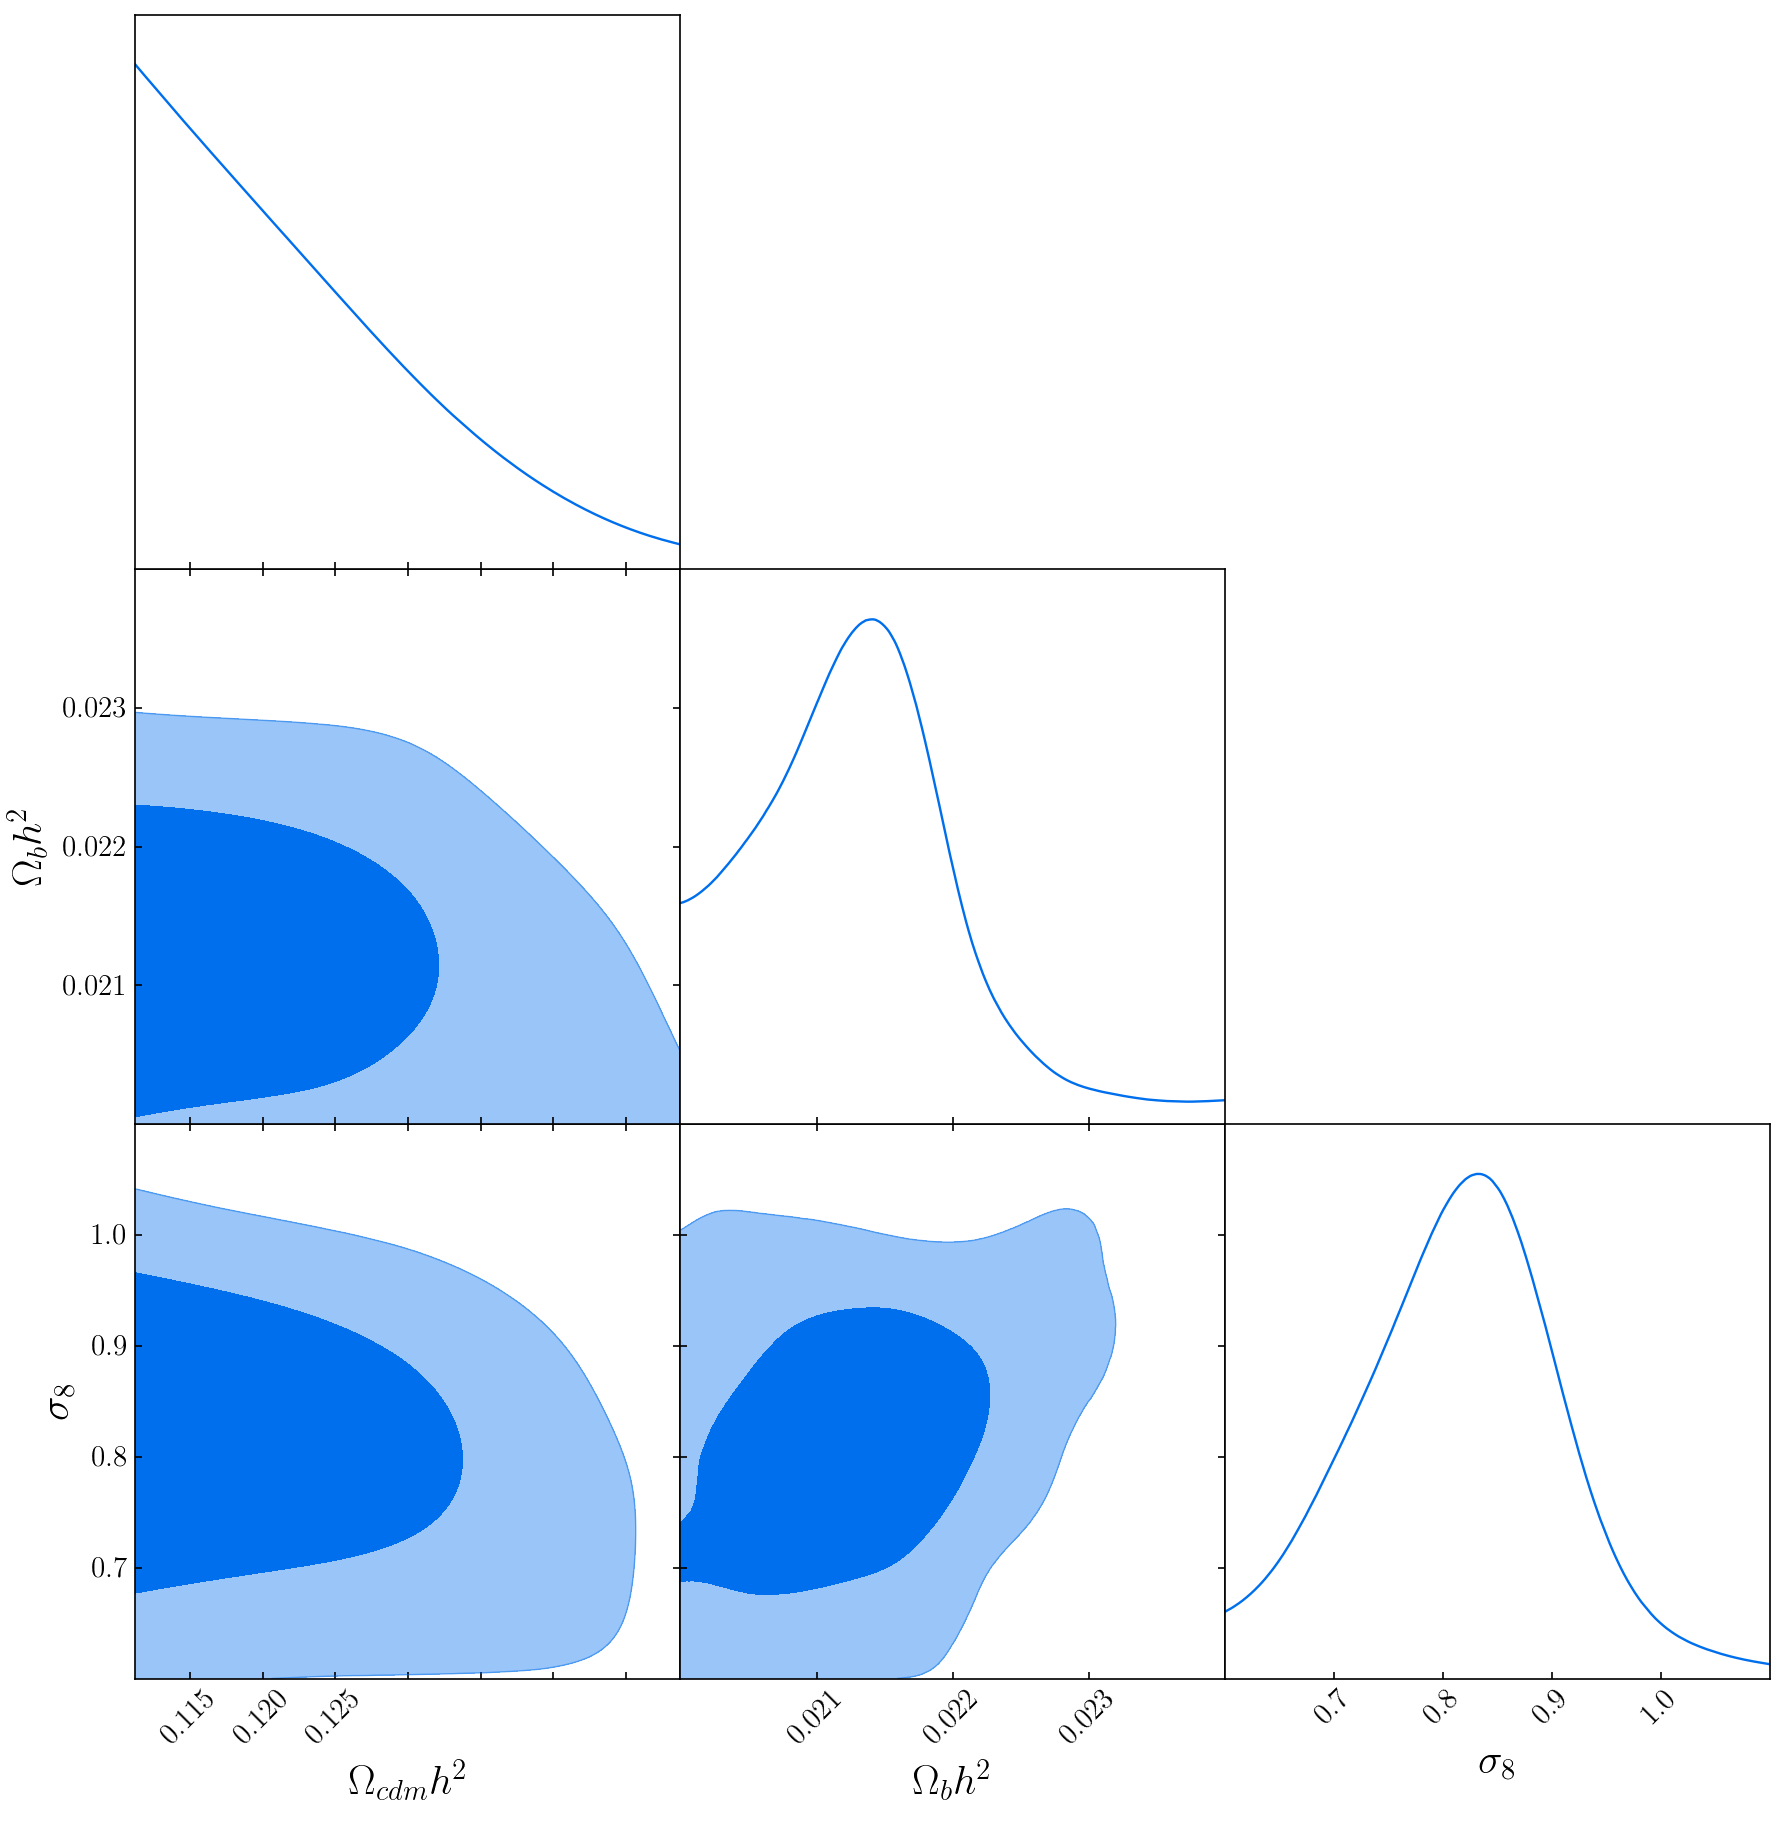

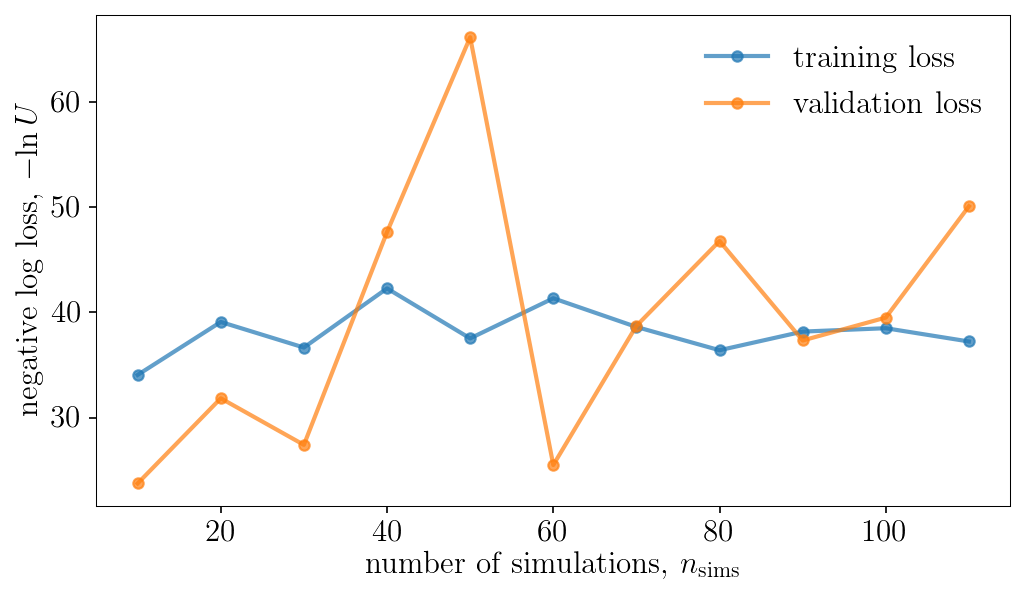

Population 11/50
Sampling proposal density...
Done.


training_loss: [array([ 34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.

/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)
/home/aizhana/.local/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
Removed no burn in


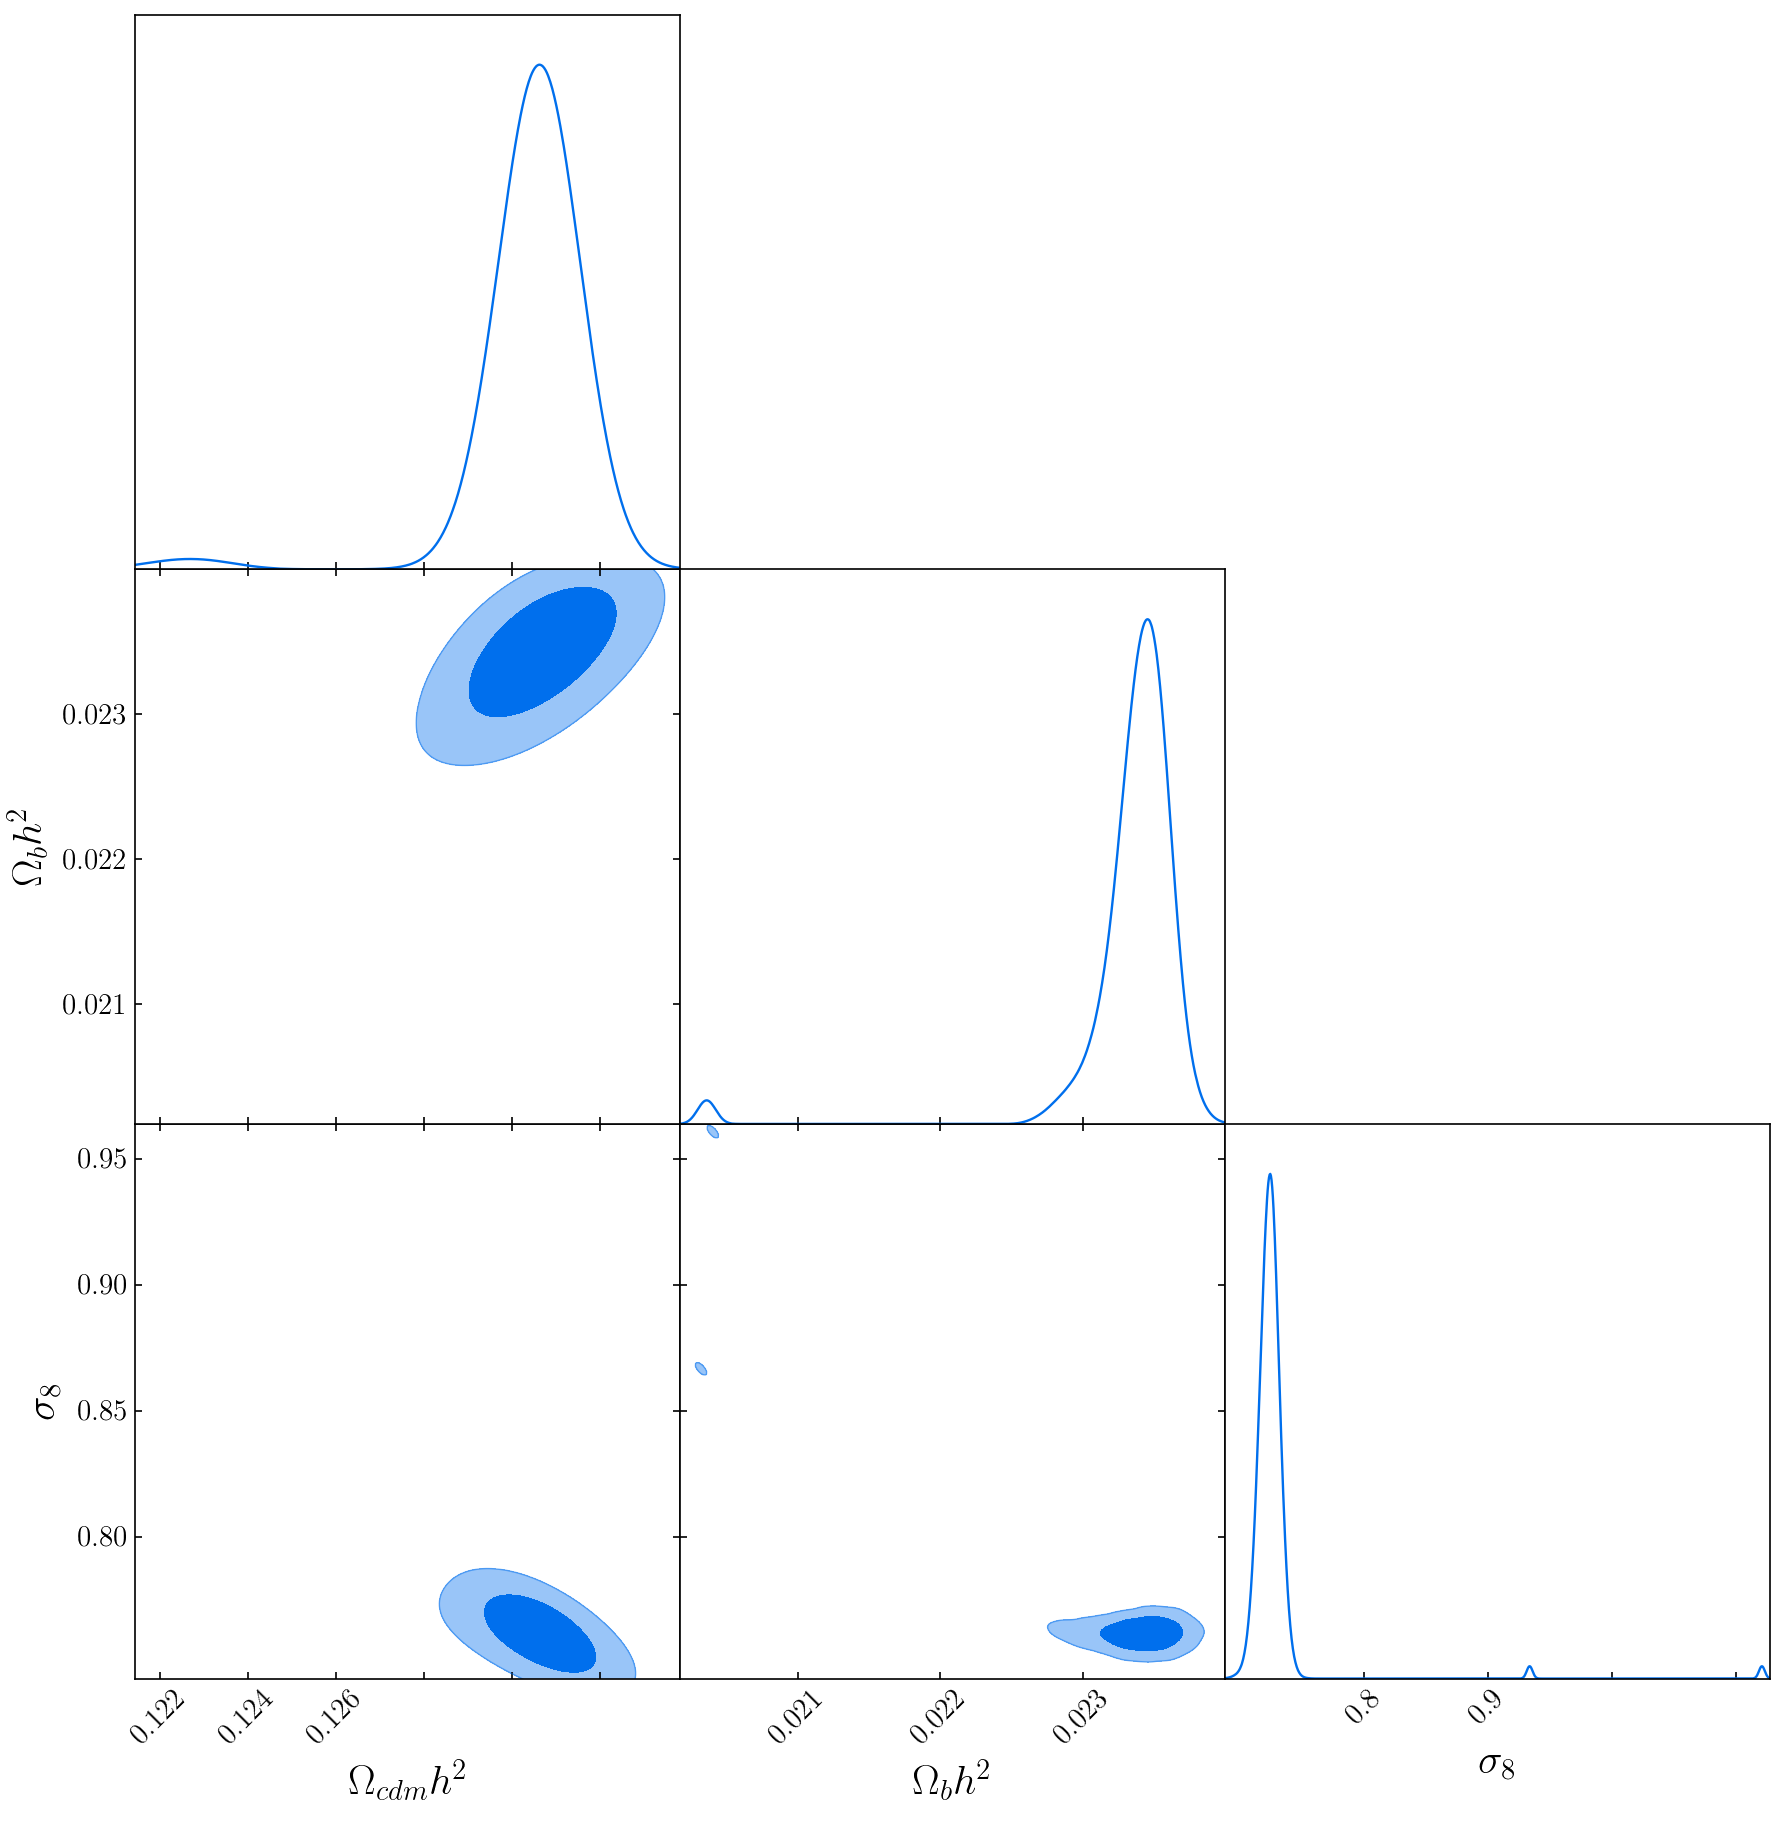

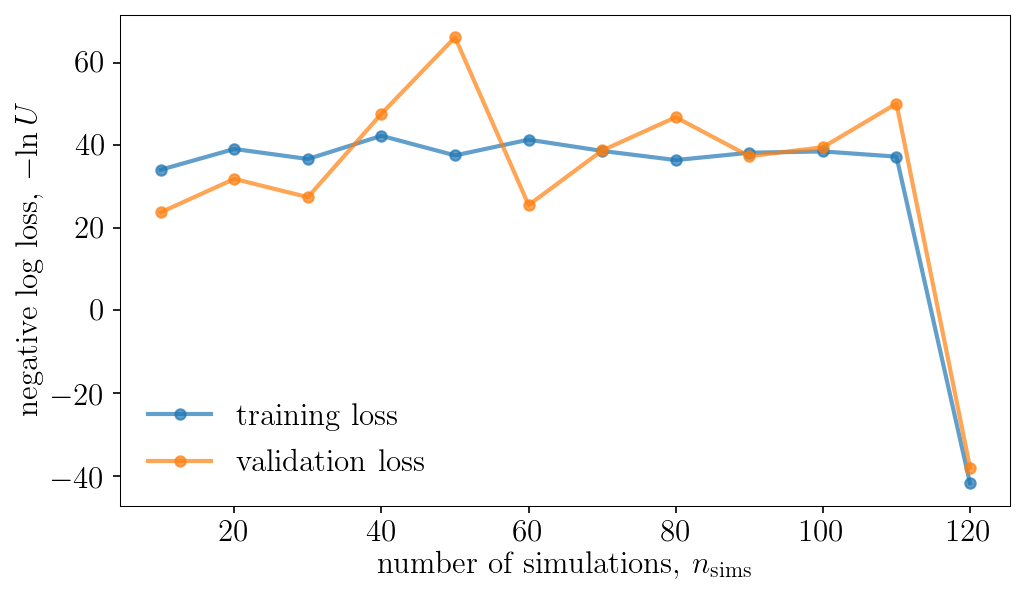

Population 12/50
Sampling proposal density...


/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)
/home/aizhana/.local/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.


Simulator returns exception for parameter values: [ 3.41778840e+07  1.61047342e+07 -4.32818672e+08] (rank 0)
Simulator returns exception for parameter values: [ 3.60846072e+07  1.70035949e+07 -4.56926441e+08] (rank 0)
Simulator returns exception for parameter values: [ 4.12668056e+07  1.94462921e+07 -5.22548975e+08] (rank 0)
Simulator returns exception for parameter values: [ 4.48544930e+07  2.11369298e+07 -5.67978766e+08] (rank 0)
Simulator returns exception for parameter values: [ 4.51835631e+07  2.12911561e+07 -5.72143258e+08] (rank 0)
Simulator returns exception for parameter values: [ 4.92647518e+07  2.32134430e+07 -6.23819504e+08] (rank 0)
Simulator returns exception for parameter values: [ 5.09578228e+07  2.40130219e+07 -6.45263371e+08] (rank 0)
Simulator returns exception for parameter values: [ 5.14956180e+07  2.42646223e+07 -6.52068055e+08] (rank 0)
Simulator returns exception for parameter values: [ 5.56640943e+07  2.62287992e+07 -7.04851774e+08] (rank 0)
Simulator returns e

IndexError: index 50 is out of bounds for axis 0 with size 50

In [40]:
DelfiEnsemble.sequential_training(simulator, compressor, n_initial, n_batch, n_populations, patience=20, 
                                  save_intermediate_posteriors=True)

## Sample the learned posterior

In [41]:
x0 = DelfiEnsemble.posterior_samples[np.random.choice(np.arange(len(DelfiEnsemble.posterior_samples)), p=DelfiEnsemble.posterior_weights.astype(np.float32)/sum(DelfiEnsemble.posterior_weights), replace=False, size=DelfiEnsemble.nwalkers),:]
posterior_samples, posterior_weights, log_prob = DelfiEnsemble.emcee_sample(x0=x0)

## Alright let's plot it!
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

Removed no burn in


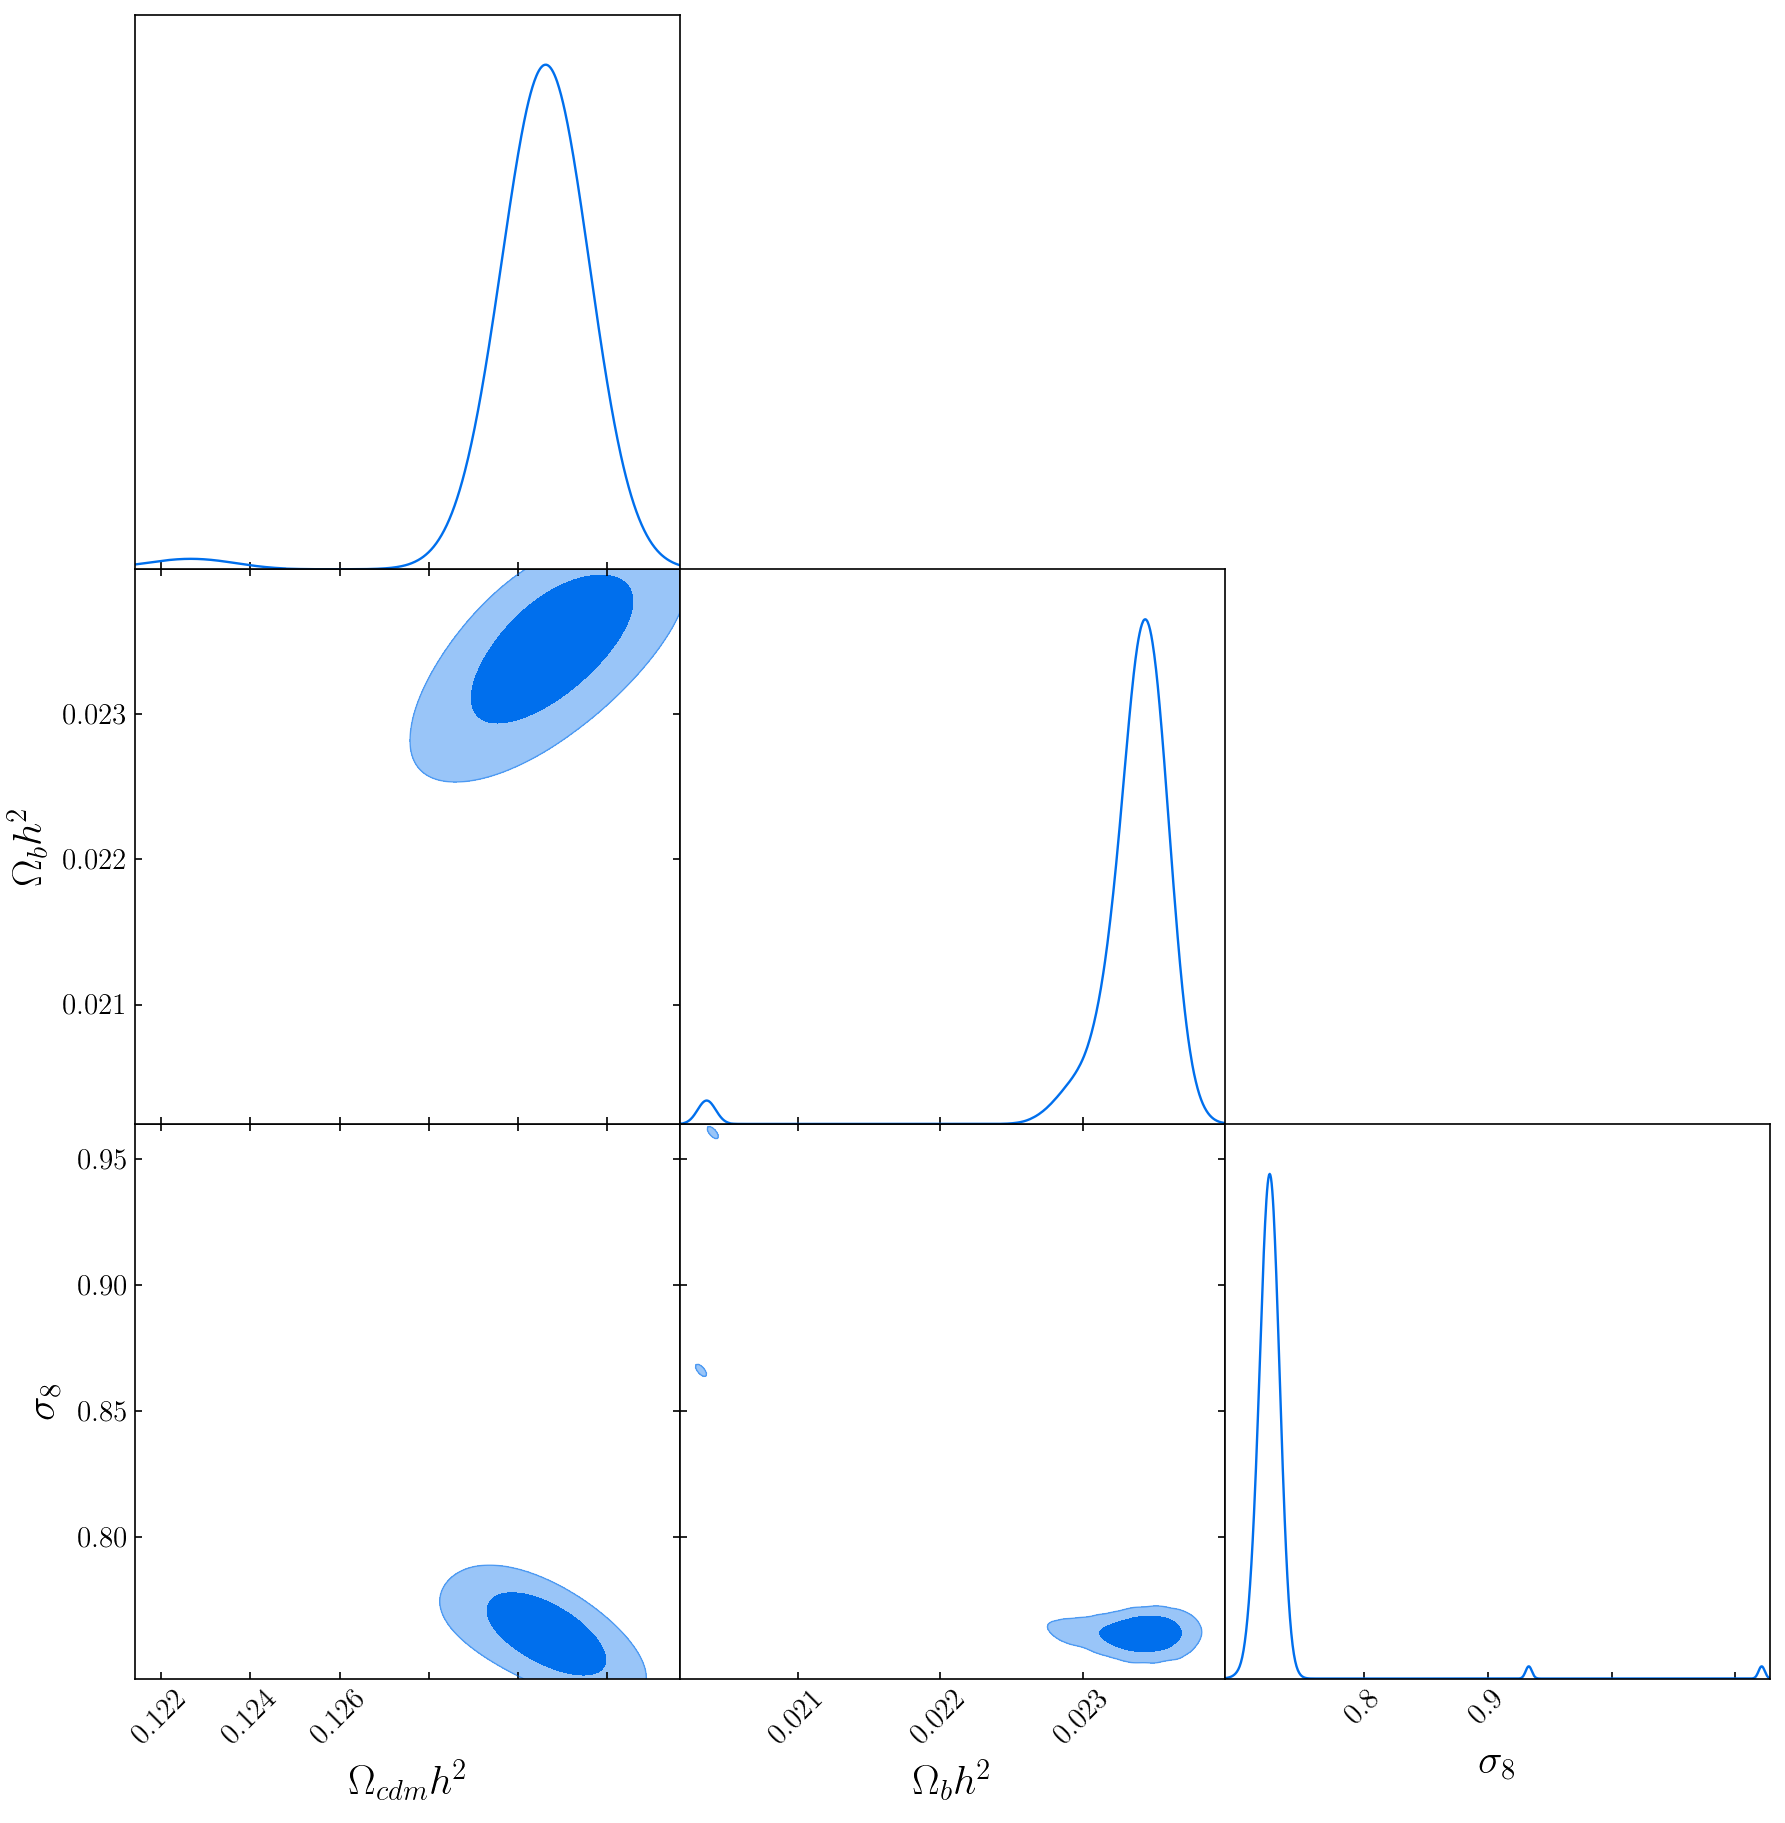

In [42]:
DelfiEnsemble.triangle_plot(samples=[posterior_samples], weights=[posterior_weights])


## Attempt 2


training_loss: [array([ 34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36

/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)
/home/aizhana/.local/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
Removed no burn in


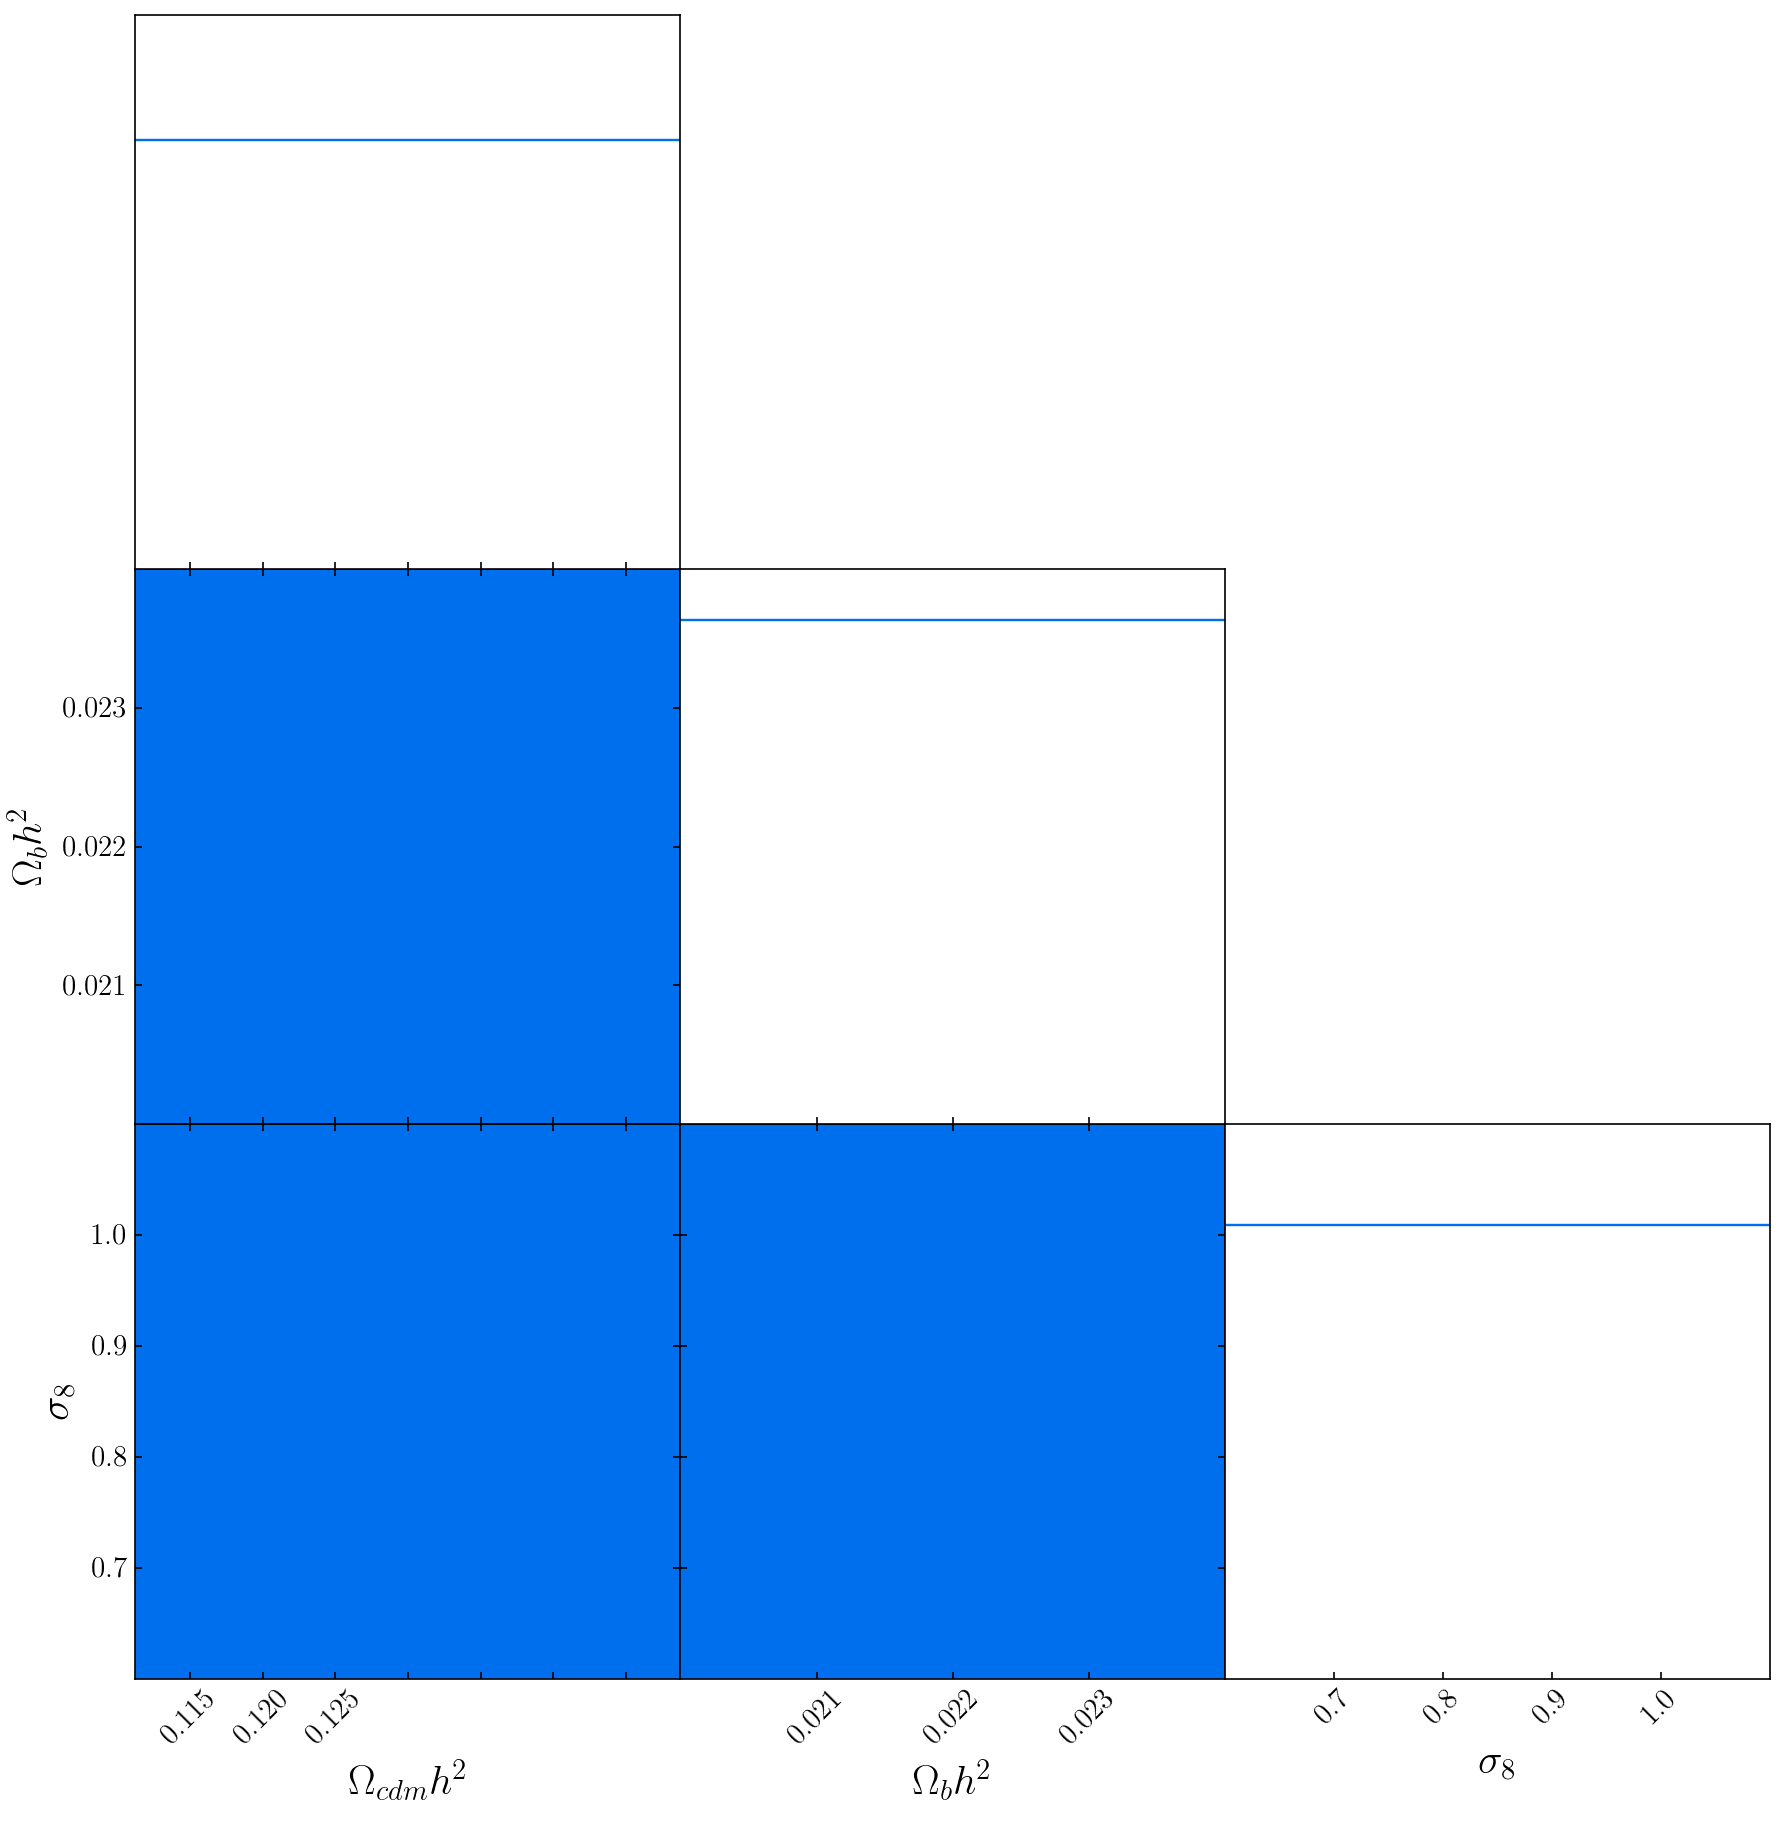

Population 1/50
Sampling proposal density...


/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)
/home/aizhana/.local/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.



training_loss: [array([ 34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36

Done.
Removed no burn in


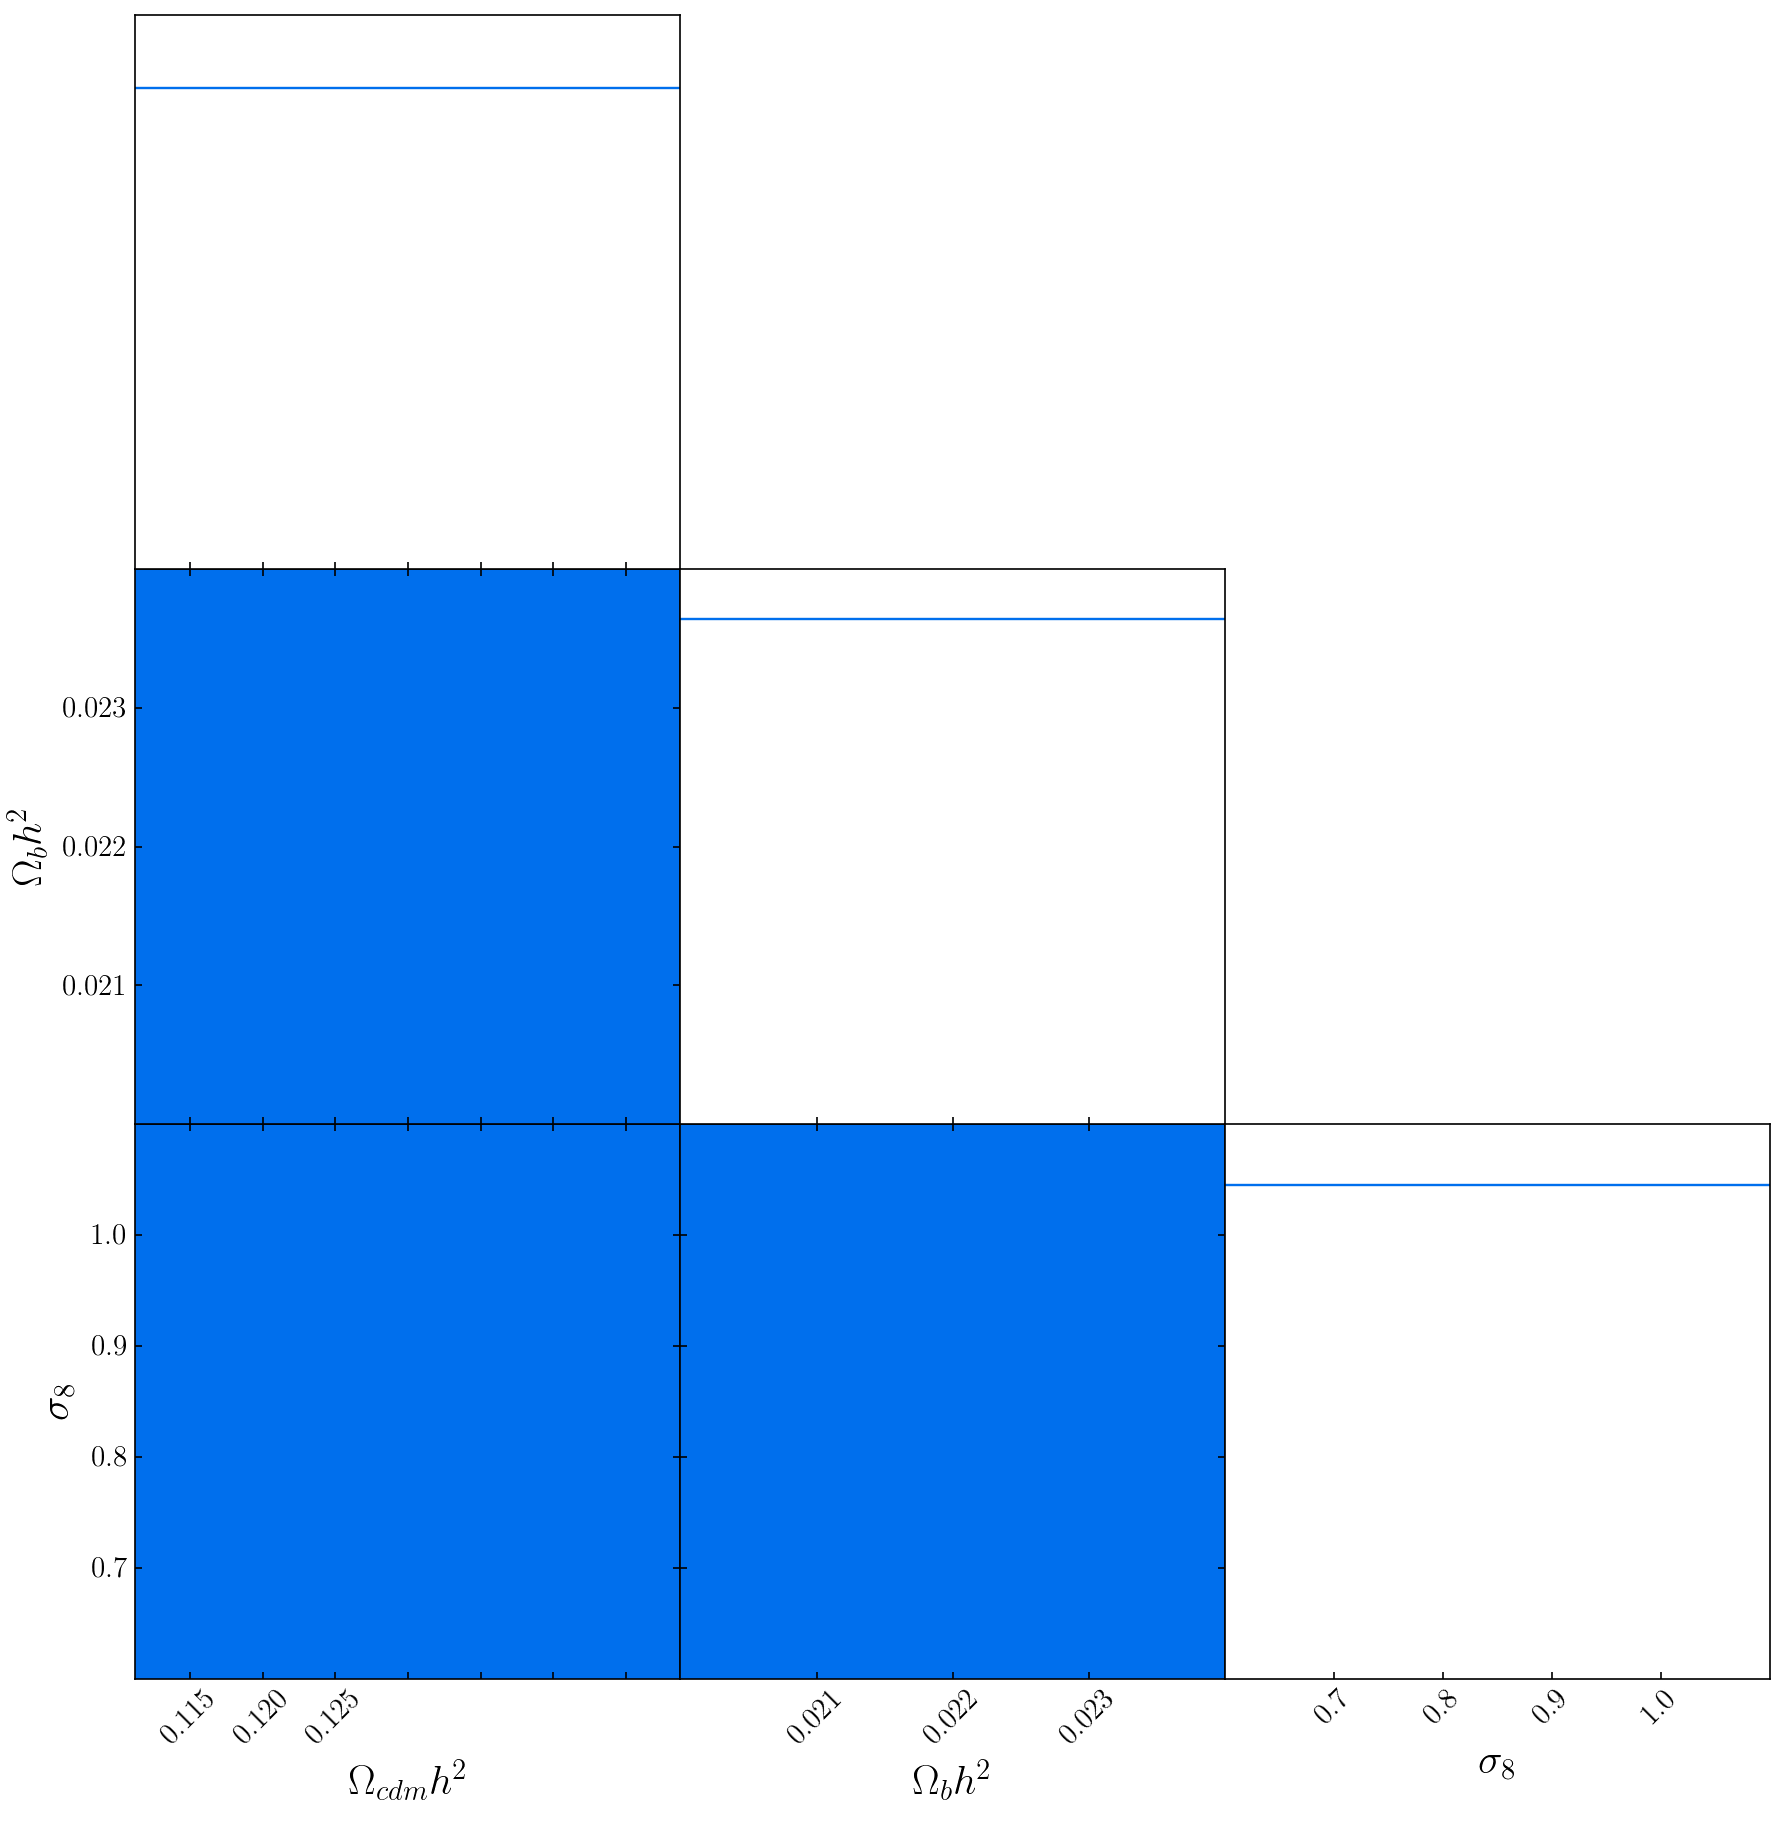

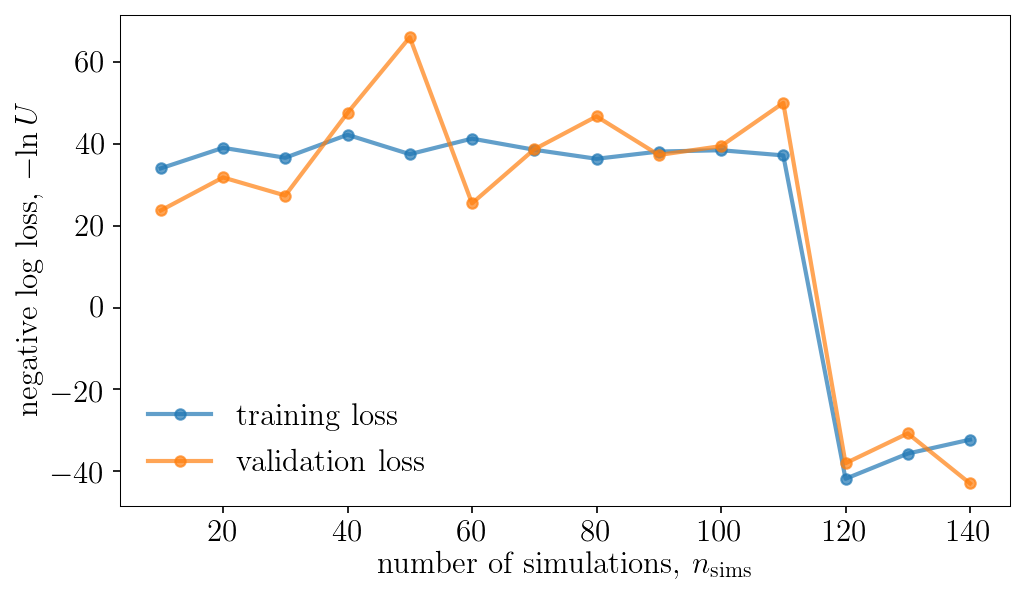

Population 2/50
Sampling proposal density...


/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)


Done.


training_loss: [array([ 34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  34.05736923,  34.05736923,  34.05736923,
        34.05736923,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  39.0892601 ,  39.0892601 ,
        39.0892601 ,  39.0892601 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.6579628 ,  36.6579628 ,
        36.6579628 ,  36.6579628 ,  36.

Done.
Removed no burn in


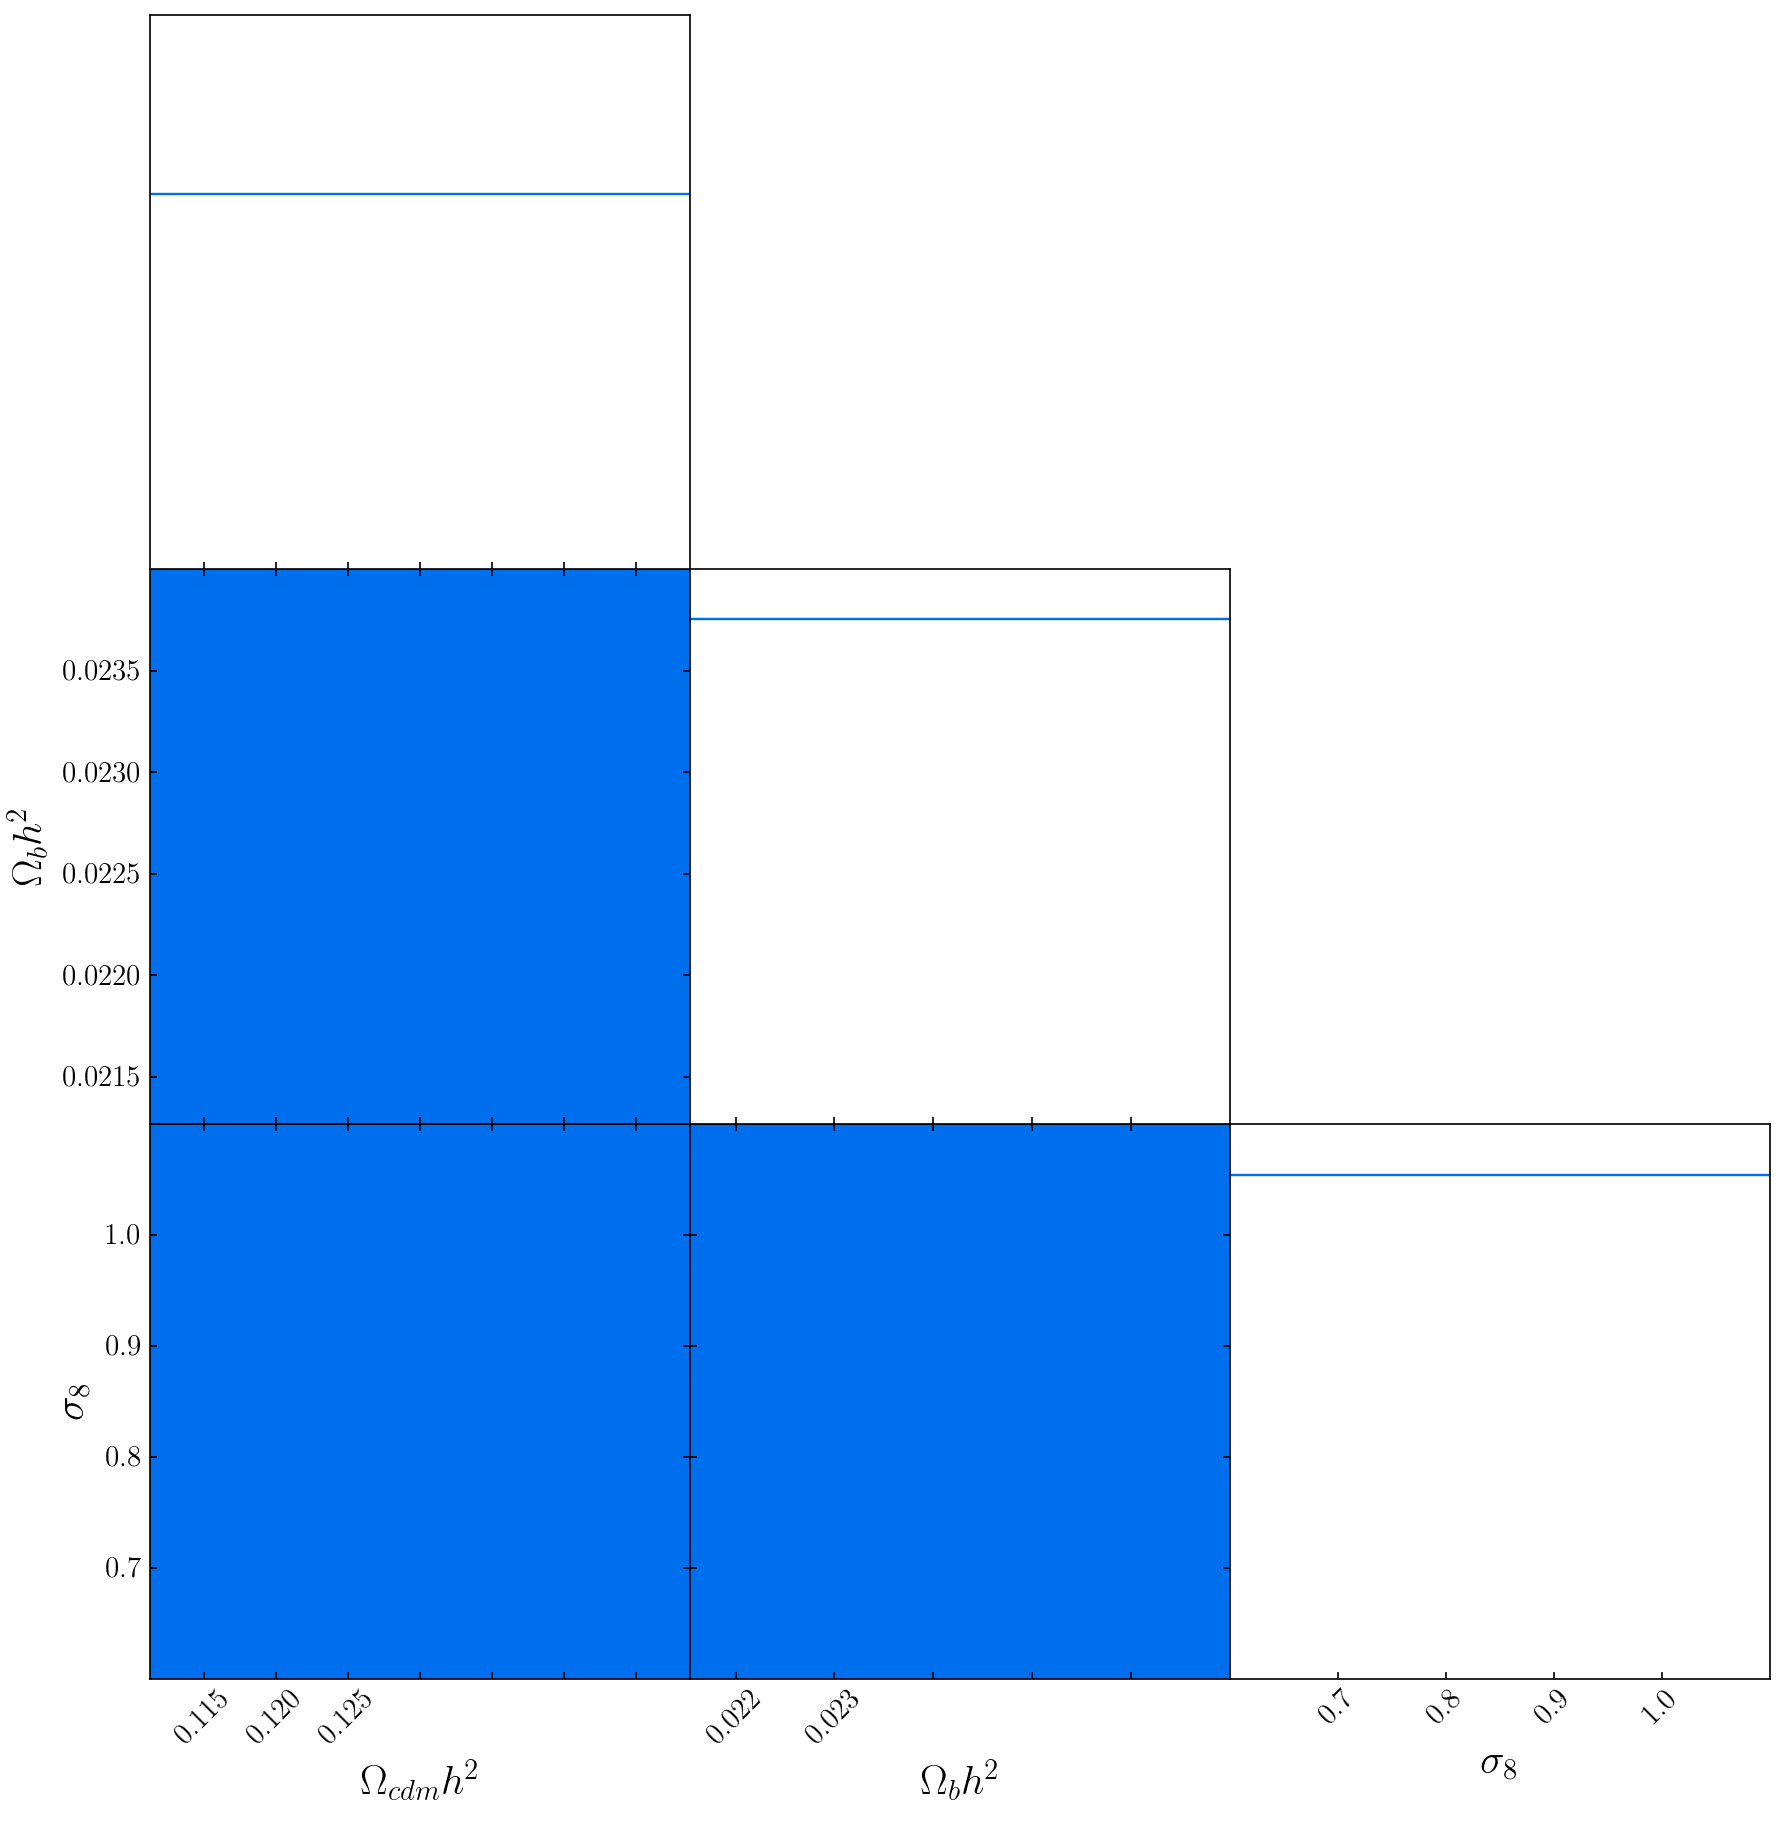

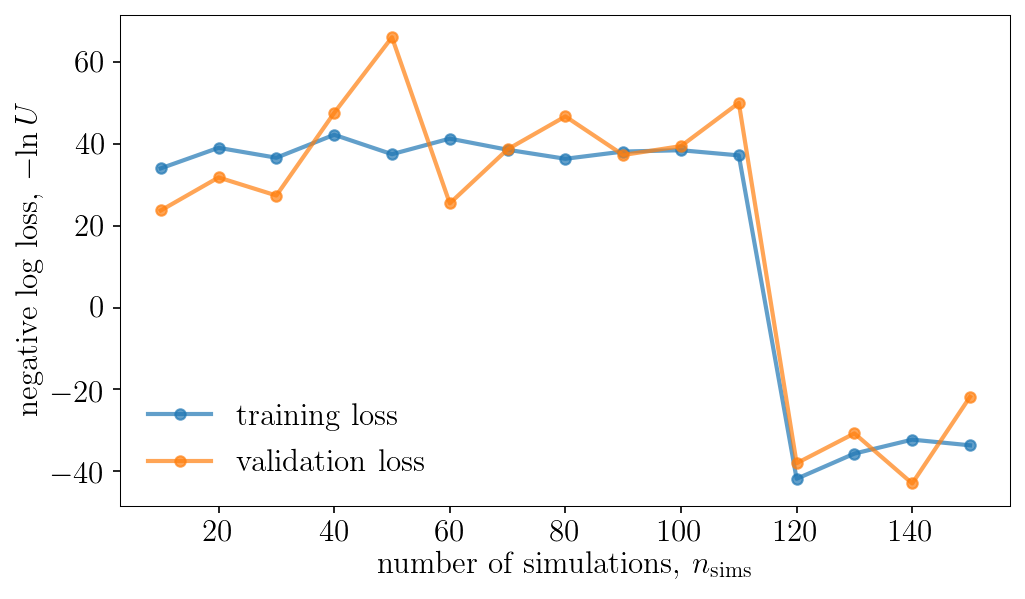

Population 3/50
Sampling proposal density...


/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pydelfi/delfi_edit.py:222: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)


Done.


In [ ]:
DelfiEnsemble.sequential_training(simulator, compressor, n_initial, n_batch, n_populations, patience=20, 
                                  save_intermediate_posteriors=True)